# Coursework 1

This notebook is intended to be used as a starting point for your experiments. The instructions can be found in the instructions file located under spec/coursework1.pdf. The methods provided here are just helper functions. If you want more complex graphs such as side by side comparisons of different experiments you should learn more about matplotlib and implement them. Before each experiment remember to re-initialize neural network weights and reset the data providers so you get a properly initialized experiment. For each experiment try to keep most hyperparameters the same except the one under investigation so you can understand what the effects of each are.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
     
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [9]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7f385a9b7670>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7f38216842b0>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.3s to complete
    error(train)=8.21e-01, acc(train)=7.52e-01, error(valid)=8.39e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.2s to complete
    error(train)=6.50e-01, acc(train)=7.95e-01, error(valid)=6.84e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.2s to complete
    error(train)=5.87e-01, acc(train)=8.08e-01, error(valid)=6.37e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.5s to complete
    error(train)=5.12e-01, acc(train)=8.31e-01, error(valid)=5.73e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.4s to complete
    error(train)=4.93e-01, acc(train)=8.38e-01, error(valid)=5.71e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.4s to complete
    error(train)=4.60e-01, acc(train)=8.44e-01, error(valid)=5.49e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 4.0s to complete
    error(train)=4.34e-01, acc(train)=8.50e-01, error(valid)=5.34e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.8s to complete
    error(train)=4.20e-01, acc(train)=8.56e-01, error(valid)=5.33e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.7s to complete
    error(train)=4.06e-01, acc(train)=8.60e-01, error(valid)=5.30e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.9s to complete
    error(train)=3.84e-01, acc(train)=8.66e-01, error(valid)=5.21e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.5s to complete
    error(train)=3.78e-01, acc(train)=8.66e-01, error(valid)=5.25e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.4s to complete
    error(train)=3.65e-01, acc(train)=8.72e-01, error(valid)=5.23e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.4s to complete
    error(train)=3.51e-01, acc(train)=8.76e-01, error(valid)=5.22e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 2.5s to complete
    error(train)=3.44e-01, acc(train)=8.79e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 2.8s to complete
    error(train)=3.45e-01, acc(train)=8.77e-01, error(valid)=5.33e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 2.4s to complete
    error(train)=3.28e-01, acc(train)=8.82e-01, error(valid)=5.34e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 2.3s to complete
    error(train)=3.19e-01, acc(train)=8.85e-01, error(valid)=5.32e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 2.3s to complete
    error(train)=3.18e-01, acc(train)=8.81e-01, error(valid)=5.40e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 2.2s to complete
    error(train)=3.12e-01, acc(train)=8.86e-01, error(valid)=5.43e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 2.5s to complete
    error(train)=3.12e-01, acc(train)=8.84e-01, error(valid)=5.50e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 2.5s to complete
    error(train)=2.99e-01, acc(train)=8.90e-01, error(valid)=5.44e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 2.4s to complete
    error(train)=2.88e-01, acc(train)=8.93e-01, error(valid)=5.51e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 2.4s to complete
    error(train)=2.88e-01, acc(train)=8.94e-01, error(valid)=5.62e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 2.5s to complete
    error(train)=2.81e-01, acc(train)=8.95e-01, error(valid)=5.61e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 2.5s to complete
    error(train)=2.70e-01, acc(train)=8.98e-01, error(valid)=5.59e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 2.4s to complete
    error(train)=2.71e-01, acc(train)=8.98e-01, error(valid)=5.72e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 2.5s to complete
    error(train)=2.70e-01, acc(train)=8.98e-01, error(valid)=5.71e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 2.5s to complete
    error(train)=2.62e-01, acc(train)=9.01e-01, error(valid)=5.83e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 2.5s to complete
    error(train)=2.60e-01, acc(train)=9.00e-01, error(valid)=5.95e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 2.5s to complete
    error(train)=2.57e-01, acc(train)=9.02e-01, error(valid)=6.04e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 2.4s to complete
    error(train)=2.44e-01, acc(train)=9.08e-01, error(valid)=5.92e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 2.8s to complete
    error(train)=2.46e-01, acc(train)=9.06e-01, error(valid)=6.13e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 2.9s to complete
    error(train)=2.52e-01, acc(train)=9.02e-01, error(valid)=6.25e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 2.7s to complete
    error(train)=2.47e-01, acc(train)=9.02e-01, error(valid)=6.34e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 2.4s to complete
    error(train)=2.37e-01, acc(train)=9.08e-01, error(valid)=6.28e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 2.4s to complete
    error(train)=2.38e-01, acc(train)=9.07e-01, error(valid)=6.40e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 2.7s to complete
    error(train)=2.31e-01, acc(train)=9.10e-01, error(valid)=6.55e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 2.4s to complete
    error(train)=2.30e-01, acc(train)=9.10e-01, error(valid)=6.61e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 2.5s to complete
    error(train)=2.24e-01, acc(train)=9.11e-01, error(valid)=6.54e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 2.4s to complete
    error(train)=2.26e-01, acc(train)=9.10e-01, error(valid)=6.82e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 2.4s to complete
    error(train)=2.23e-01, acc(train)=9.14e-01, error(valid)=6.83e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 2.5s to complete
    error(train)=2.10e-01, acc(train)=9.18e-01, error(valid)=6.84e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 2.6s to complete
    error(train)=2.21e-01, acc(train)=9.13e-01, error(valid)=6.96e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 2.7s to complete
    error(train)=2.15e-01, acc(train)=9.13e-01, error(valid)=7.03e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 2.6s to complete
    error(train)=2.17e-01, acc(train)=9.14e-01, error(valid)=7.09e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 2.5s to complete
    error(train)=2.08e-01, acc(train)=9.17e-01, error(valid)=7.17e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 2.6s to complete
    error(train)=2.03e-01, acc(train)=9.19e-01, error(valid)=7.19e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 2.5s to complete
    error(train)=1.99e-01, acc(train)=9.21e-01, error(valid)=7.12e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 2.5s to complete
    error(train)=2.05e-01, acc(train)=9.18e-01, error(valid)=7.30e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 2.5s to complete
    error(train)=1.95e-01, acc(train)=9.23e-01, error(valid)=7.48e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 2.5s to complete
    error(train)=2.08e-01, acc(train)=9.18e-01, error(valid)=7.58e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 2.5s to complete
    error(train)=2.00e-01, acc(train)=9.21e-01, error(valid)=7.88e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 2.5s to complete
    error(train)=1.98e-01, acc(train)=9.21e-01, error(valid)=7.82e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 2.5s to complete
    error(train)=1.95e-01, acc(train)=9.23e-01, error(valid)=7.71e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 2.5s to complete
    error(train)=1.92e-01, acc(train)=9.24e-01, error(valid)=7.86e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 2.5s to complete
    error(train)=1.94e-01, acc(train)=9.20e-01, error(valid)=8.05e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 2.5s to complete
    error(train)=1.87e-01, acc(train)=9.24e-01, error(valid)=8.02e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 2.5s to complete
    error(train)=1.85e-01, acc(train)=9.26e-01, error(valid)=8.16e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 2.5s to complete
    error(train)=1.89e-01, acc(train)=9.23e-01, error(valid)=8.21e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 2.5s to complete
    error(train)=1.80e-01, acc(train)=9.27e-01, error(valid)=8.35e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 2.5s to complete
    error(train)=1.89e-01, acc(train)=9.23e-01, error(valid)=8.42e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 2.5s to complete
    error(train)=1.77e-01, acc(train)=9.28e-01, error(valid)=8.62e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 2.6s to complete
    error(train)=1.98e-01, acc(train)=9.20e-01, error(valid)=8.91e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 2.5s to complete
    error(train)=1.74e-01, acc(train)=9.29e-01, error(valid)=8.73e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 2.5s to complete
    error(train)=1.78e-01, acc(train)=9.27e-01, error(valid)=8.78e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 2.5s to complete
    error(train)=1.77e-01, acc(train)=9.27e-01, error(valid)=8.87e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 2.5s to complete
    error(train)=1.76e-01, acc(train)=9.30e-01, error(valid)=8.82e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 2.5s to complete
    error(train)=1.73e-01, acc(train)=9.29e-01, error(valid)=9.06e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 2.5s to complete
    error(train)=1.75e-01, acc(train)=9.28e-01, error(valid)=9.18e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 2.5s to complete
    error(train)=1.67e-01, acc(train)=9.31e-01, error(valid)=9.09e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 2.5s to complete
    error(train)=1.66e-01, acc(train)=9.33e-01, error(valid)=9.26e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 2.6s to complete
    error(train)=1.64e-01, acc(train)=9.34e-01, error(valid)=9.34e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 2.8s to complete
    error(train)=1.73e-01, acc(train)=9.30e-01, error(valid)=9.53e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 2.7s to complete
    error(train)=1.73e-01, acc(train)=9.29e-01, error(valid)=9.73e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 2.7s to complete
    error(train)=1.63e-01, acc(train)=9.33e-01, error(valid)=9.61e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 2.9s to complete
    error(train)=1.73e-01, acc(train)=9.30e-01, error(valid)=9.87e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 2.5s to complete
    error(train)=1.65e-01, acc(train)=9.32e-01, error(valid)=9.95e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 2.6s to complete
    error(train)=1.61e-01, acc(train)=9.34e-01, error(valid)=9.97e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 2.7s to complete
    error(train)=1.58e-01, acc(train)=9.35e-01, error(valid)=1.00e+00, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.3s to complete
    error(train)=1.64e-01, acc(train)=9.33e-01, error(valid)=1.02e+00, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 2.5s to complete
    error(train)=1.64e-01, acc(train)=9.33e-01, error(valid)=1.03e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 2.5s to complete
    error(train)=1.63e-01, acc(train)=9.33e-01, error(valid)=1.03e+00, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 2.5s to complete
    error(train)=1.56e-01, acc(train)=9.36e-01, error(valid)=1.03e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 2.5s to complete
    error(train)=1.68e-01, acc(train)=9.31e-01, error(valid)=1.04e+00, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 2.5s to complete
    error(train)=1.50e-01, acc(train)=9.39e-01, error(valid)=1.06e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 2.5s to complete
    error(train)=1.60e-01, acc(train)=9.34e-01, error(valid)=1.07e+00, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 2.6s to complete
    error(train)=1.56e-01, acc(train)=9.36e-01, error(valid)=1.08e+00, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 2.5s to complete
    error(train)=1.52e-01, acc(train)=9.37e-01, error(valid)=1.10e+00, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 2.5s to complete
    error(train)=1.49e-01, acc(train)=9.39e-01, error(valid)=1.08e+00, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 2.5s to complete
    error(train)=1.50e-01, acc(train)=9.37e-01, error(valid)=1.12e+00, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 2.5s to complete
    error(train)=1.44e-01, acc(train)=9.40e-01, error(valid)=1.11e+00, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 2.5s to complete
    error(train)=1.59e-01, acc(train)=9.35e-01, error(valid)=1.13e+00, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 2.5s to complete
    error(train)=1.49e-01, acc(train)=9.39e-01, error(valid)=1.11e+00, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 2.5s to complete
    error(train)=1.50e-01, acc(train)=9.38e-01, error(valid)=1.14e+00, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 2.5s to complete
    error(train)=1.50e-01, acc(train)=9.37e-01, error(valid)=1.15e+00, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 2.5s to complete
    error(train)=1.51e-01, acc(train)=9.38e-01, error(valid)=1.21e+00, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 2.5s to complete
    error(train)=1.48e-01, acc(train)=9.39e-01, error(valid)=1.19e+00, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 2.5s to complete
    error(train)=1.47e-01, acc(train)=9.40e-01, error(valid)=1.21e+00, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 2.5s to complete
    error(train)=1.45e-01, acc(train)=9.41e-01, error(valid)=1.20e+00, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 2.5s to complete
    error(train)=1.50e-01, acc(train)=9.38e-01, error(valid)=1.21e+00, acc(valid)=8.11e-01


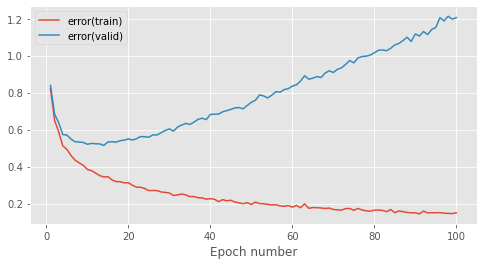

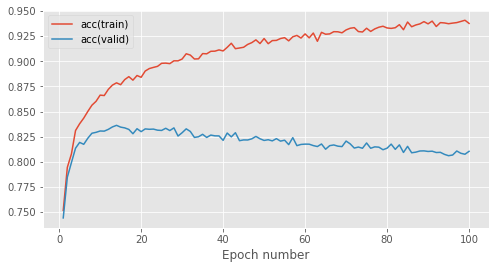

In [3]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule =  AdamLearningRule()

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

# Section 2.1 Network Width

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 0.9s to complete
    error(train)=1.20e+00, acc(train)=6.66e-01, error(valid)=1.22e+00, acc(valid)=6.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 0.9s to complete
    error(train)=1.08e+00, acc(train)=6.98e-01, error(valid)=1.11e+00, acc(valid)=6.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 0.9s to complete
    error(train)=9.81e-01, acc(train)=7.23e-01, error(valid)=1.01e+00, acc(valid)=7.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 0.9s to complete
    error(train)=9.22e-01, acc(train)=7.38e-01, error(valid)=9.58e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 0.9s to complete
    error(train)=8.79e-01, acc(train)=7.47e-01, error(valid)=9.18e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 0.9s to complete
    error(train)=8.50e-01, acc(train)=7.56e-01, error(valid)=8.90e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 0.9s to complete
    error(train)=8.24e-01, acc(train)=7.59e-01, error(valid)=8.70e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 0.9s to complete
    error(train)=8.09e-01, acc(train)=7.63e-01, error(valid)=8.56e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 0.9s to complete
    error(train)=7.83e-01, acc(train)=7.68e-01, error(valid)=8.32e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 0.9s to complete
    error(train)=7.63e-01, acc(train)=7.76e-01, error(valid)=8.14e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 0.9s to complete
    error(train)=7.48e-01, acc(train)=7.77e-01, error(valid)=7.99e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 0.9s to complete
    error(train)=7.34e-01, acc(train)=7.81e-01, error(valid)=7.85e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 0.9s to complete
    error(train)=7.21e-01, acc(train)=7.84e-01, error(valid)=7.73e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 0.9s to complete
    error(train)=7.15e-01, acc(train)=7.81e-01, error(valid)=7.72e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 1.0s to complete
    error(train)=7.05e-01, acc(train)=7.86e-01, error(valid)=7.66e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 0.9s to complete
    error(train)=6.95e-01, acc(train)=7.90e-01, error(valid)=7.54e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 0.9s to complete
    error(train)=6.84e-01, acc(train)=7.93e-01, error(valid)=7.47e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 1.0s to complete
    error(train)=6.81e-01, acc(train)=7.94e-01, error(valid)=7.42e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 0.9s to complete
    error(train)=6.79e-01, acc(train)=7.92e-01, error(valid)=7.44e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 0.9s to complete
    error(train)=6.72e-01, acc(train)=7.94e-01, error(valid)=7.41e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 1.0s to complete
    error(train)=6.63e-01, acc(train)=7.97e-01, error(valid)=7.33e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 0.9s to complete
    error(train)=6.66e-01, acc(train)=7.96e-01, error(valid)=7.34e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 1.0s to complete
    error(train)=6.58e-01, acc(train)=7.99e-01, error(valid)=7.29e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 0.9s to complete
    error(train)=6.45e-01, acc(train)=8.03e-01, error(valid)=7.20e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 1.0s to complete
    error(train)=6.42e-01, acc(train)=8.04e-01, error(valid)=7.19e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 0.9s to complete
    error(train)=6.46e-01, acc(train)=8.01e-01, error(valid)=7.24e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 0.9s to complete
    error(train)=6.40e-01, acc(train)=8.02e-01, error(valid)=7.21e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 0.9s to complete
    error(train)=6.36e-01, acc(train)=8.06e-01, error(valid)=7.14e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 0.9s to complete
    error(train)=6.30e-01, acc(train)=8.06e-01, error(valid)=7.12e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 1.0s to complete
    error(train)=6.34e-01, acc(train)=8.05e-01, error(valid)=7.17e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 0.9s to complete
    error(train)=6.31e-01, acc(train)=8.05e-01, error(valid)=7.14e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 1.0s to complete
    error(train)=6.34e-01, acc(train)=8.04e-01, error(valid)=7.24e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 1.0s to complete
    error(train)=6.19e-01, acc(train)=8.10e-01, error(valid)=7.12e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 0.9s to complete
    error(train)=6.28e-01, acc(train)=8.05e-01, error(valid)=7.18e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 1.0s to complete
    error(train)=6.16e-01, acc(train)=8.10e-01, error(valid)=7.08e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 0.9s to complete
    error(train)=6.17e-01, acc(train)=8.09e-01, error(valid)=7.11e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 0.9s to complete
    error(train)=6.14e-01, acc(train)=8.10e-01, error(valid)=7.10e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 0.9s to complete
    error(train)=6.21e-01, acc(train)=8.06e-01, error(valid)=7.15e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 1.2s to complete
    error(train)=6.18e-01, acc(train)=8.08e-01, error(valid)=7.15e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 1.3s to complete
    error(train)=6.07e-01, acc(train)=8.13e-01, error(valid)=7.08e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 1.1s to complete
    error(train)=6.07e-01, acc(train)=8.12e-01, error(valid)=7.04e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 1.0s to complete
    error(train)=6.03e-01, acc(train)=8.11e-01, error(valid)=7.05e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 0.9s to complete
    error(train)=6.21e-01, acc(train)=8.06e-01, error(valid)=7.24e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 1.0s to complete
    error(train)=6.00e-01, acc(train)=8.12e-01, error(valid)=7.04e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 0.9s to complete
    error(train)=6.07e-01, acc(train)=8.09e-01, error(valid)=7.13e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 0.9s to complete
    error(train)=6.04e-01, acc(train)=8.12e-01, error(valid)=7.06e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 0.8s to complete
    error(train)=6.03e-01, acc(train)=8.12e-01, error(valid)=7.08e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 1.0s to complete
    error(train)=5.92e-01, acc(train)=8.15e-01, error(valid)=6.98e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 1.0s to complete
    error(train)=5.92e-01, acc(train)=8.15e-01, error(valid)=7.05e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 0.9s to complete
    error(train)=6.03e-01, acc(train)=8.11e-01, error(valid)=7.15e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 1.0s to complete
    error(train)=5.88e-01, acc(train)=8.16e-01, error(valid)=6.99e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 1.0s to complete
    error(train)=6.05e-01, acc(train)=8.10e-01, error(valid)=7.18e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 0.9s to complete
    error(train)=5.86e-01, acc(train)=8.16e-01, error(valid)=7.00e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 0.9s to complete
    error(train)=5.99e-01, acc(train)=8.13e-01, error(valid)=7.13e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 0.9s to complete
    error(train)=5.87e-01, acc(train)=8.16e-01, error(valid)=7.00e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 0.9s to complete
    error(train)=5.85e-01, acc(train)=8.18e-01, error(valid)=7.01e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 0.9s to complete
    error(train)=5.90e-01, acc(train)=8.16e-01, error(valid)=7.08e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 1.0s to complete
    error(train)=5.89e-01, acc(train)=8.15e-01, error(valid)=7.07e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 0.9s to complete
    error(train)=5.83e-01, acc(train)=8.17e-01, error(valid)=7.00e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 1.0s to complete
    error(train)=5.82e-01, acc(train)=8.18e-01, error(valid)=7.00e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 1.0s to complete
    error(train)=5.93e-01, acc(train)=8.13e-01, error(valid)=7.15e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 0.8s to complete
    error(train)=5.80e-01, acc(train)=8.18e-01, error(valid)=7.04e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 0.9s to complete
    error(train)=5.83e-01, acc(train)=8.17e-01, error(valid)=7.04e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 0.9s to complete
    error(train)=5.79e-01, acc(train)=8.18e-01, error(valid)=7.03e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 0.8s to complete
    error(train)=5.74e-01, acc(train)=8.20e-01, error(valid)=6.99e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 0.9s to complete
    error(train)=5.84e-01, acc(train)=8.16e-01, error(valid)=7.09e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 1.0s to complete
    error(train)=5.78e-01, acc(train)=8.19e-01, error(valid)=7.07e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 0.9s to complete
    error(train)=5.80e-01, acc(train)=8.18e-01, error(valid)=7.07e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 0.9s to complete
    error(train)=5.77e-01, acc(train)=8.16e-01, error(valid)=7.07e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 1.0s to complete
    error(train)=5.78e-01, acc(train)=8.17e-01, error(valid)=7.08e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 1.1s to complete
    error(train)=5.75e-01, acc(train)=8.20e-01, error(valid)=7.03e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 1.0s to complete
    error(train)=5.77e-01, acc(train)=8.18e-01, error(valid)=7.03e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 1.0s to complete
    error(train)=5.74e-01, acc(train)=8.20e-01, error(valid)=7.01e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 1.0s to complete
    error(train)=5.78e-01, acc(train)=8.19e-01, error(valid)=7.09e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 0.9s to complete
    error(train)=5.76e-01, acc(train)=8.20e-01, error(valid)=7.08e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 0.8s to complete
    error(train)=5.78e-01, acc(train)=8.16e-01, error(valid)=7.11e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 0.9s to complete
    error(train)=5.73e-01, acc(train)=8.19e-01, error(valid)=7.08e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 0.9s to complete
    error(train)=5.72e-01, acc(train)=8.19e-01, error(valid)=7.08e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 0.9s to complete
    error(train)=5.73e-01, acc(train)=8.20e-01, error(valid)=7.07e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 0.8s to complete
    error(train)=5.74e-01, acc(train)=8.18e-01, error(valid)=7.09e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 0.9s to complete
    error(train)=5.71e-01, acc(train)=8.21e-01, error(valid)=7.09e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 0.9s to complete
    error(train)=5.67e-01, acc(train)=8.21e-01, error(valid)=7.07e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 0.8s to complete
    error(train)=5.72e-01, acc(train)=8.19e-01, error(valid)=7.11e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 0.8s to complete
    error(train)=5.69e-01, acc(train)=8.21e-01, error(valid)=7.10e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 0.9s to complete
    error(train)=5.72e-01, acc(train)=8.20e-01, error(valid)=7.12e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 0.9s to complete
    error(train)=5.67e-01, acc(train)=8.21e-01, error(valid)=7.05e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 0.9s to complete
    error(train)=5.69e-01, acc(train)=8.21e-01, error(valid)=7.08e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 1.0s to complete
    error(train)=5.60e-01, acc(train)=8.24e-01, error(valid)=7.02e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 1.0s to complete
    error(train)=5.61e-01, acc(train)=8.24e-01, error(valid)=7.03e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 1.0s to complete
    error(train)=5.64e-01, acc(train)=8.22e-01, error(valid)=7.03e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 0.9s to complete
    error(train)=5.69e-01, acc(train)=8.20e-01, error(valid)=7.16e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 1.0s to complete
    error(train)=5.64e-01, acc(train)=8.22e-01, error(valid)=7.08e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 0.9s to complete
    error(train)=5.71e-01, acc(train)=8.20e-01, error(valid)=7.16e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 1.1s to complete
    error(train)=5.64e-01, acc(train)=8.22e-01, error(valid)=7.10e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 0.9s to complete
    error(train)=5.60e-01, acc(train)=8.23e-01, error(valid)=7.05e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 1.1s to complete
    error(train)=5.60e-01, acc(train)=8.23e-01, error(valid)=7.08e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 0.9s to complete
    error(train)=5.67e-01, acc(train)=8.20e-01, error(valid)=7.12e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 0.9s to complete
    error(train)=5.54e-01, acc(train)=8.25e-01, error(valid)=7.03e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 1.0s to complete
    error(train)=5.55e-01, acc(train)=8.24e-01, error(valid)=7.03e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 0.9s to complete
    error(train)=5.51e-01, acc(train)=8.27e-01, error(valid)=7.02e-01, acc(valid)=7.88e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 1.3s to complete
    error(train)=1.07e+00, acc(train)=6.98e-01, error(valid)=1.09e+00, acc(valid)=6.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 1.3s to complete
    error(train)=8.94e-01, acc(train)=7.43e-01, error(valid)=9.20e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 1.2s to complete
    error(train)=8.00e-01, acc(train)=7.66e-01, error(valid)=8.27e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 1.4s to complete
    error(train)=7.37e-01, acc(train)=7.82e-01, error(valid)=7.74e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 1.2s to complete
    error(train)=7.02e-01, acc(train)=7.89e-01, error(valid)=7.48e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 1.4s to complete
    error(train)=6.59e-01, acc(train)=8.00e-01, error(valid)=7.12e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 1.3s to complete
    error(train)=6.35e-01, acc(train)=8.07e-01, error(valid)=6.91e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 1.3s to complete
    error(train)=6.06e-01, acc(train)=8.13e-01, error(valid)=6.66e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 1.3s to complete
    error(train)=5.97e-01, acc(train)=8.14e-01, error(valid)=6.58e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 1.3s to complete
    error(train)=5.72e-01, acc(train)=8.22e-01, error(valid)=6.41e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 1.3s to complete
    error(train)=5.55e-01, acc(train)=8.26e-01, error(valid)=6.32e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 1.3s to complete
    error(train)=5.52e-01, acc(train)=8.25e-01, error(valid)=6.34e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 1.3s to complete
    error(train)=5.31e-01, acc(train)=8.30e-01, error(valid)=6.17e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 1.3s to complete
    error(train)=5.25e-01, acc(train)=8.33e-01, error(valid)=6.12e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 1.3s to complete
    error(train)=5.16e-01, acc(train)=8.36e-01, error(valid)=6.06e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 1.3s to complete
    error(train)=5.11e-01, acc(train)=8.37e-01, error(valid)=6.11e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 1.4s to complete
    error(train)=5.04e-01, acc(train)=8.37e-01, error(valid)=6.05e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 1.4s to complete
    error(train)=4.90e-01, acc(train)=8.42e-01, error(valid)=5.94e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 1.7s to complete
    error(train)=4.93e-01, acc(train)=8.41e-01, error(valid)=6.03e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 1.9s to complete
    error(train)=4.78e-01, acc(train)=8.46e-01, error(valid)=5.88e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 1.5s to complete
    error(train)=4.77e-01, acc(train)=8.44e-01, error(valid)=5.96e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 1.4s to complete
    error(train)=4.68e-01, acc(train)=8.49e-01, error(valid)=5.90e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 1.4s to complete
    error(train)=4.69e-01, acc(train)=8.44e-01, error(valid)=5.96e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 1.4s to complete
    error(train)=4.58e-01, acc(train)=8.51e-01, error(valid)=5.84e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 1.4s to complete
    error(train)=4.71e-01, acc(train)=8.44e-01, error(valid)=5.98e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 1.4s to complete
    error(train)=4.54e-01, acc(train)=8.51e-01, error(valid)=5.90e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 1.4s to complete
    error(train)=4.47e-01, acc(train)=8.53e-01, error(valid)=5.85e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 1.4s to complete
    error(train)=4.42e-01, acc(train)=8.55e-01, error(valid)=5.85e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 1.4s to complete
    error(train)=4.36e-01, acc(train)=8.57e-01, error(valid)=5.79e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 1.4s to complete
    error(train)=4.41e-01, acc(train)=8.54e-01, error(valid)=5.84e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 1.4s to complete
    error(train)=4.39e-01, acc(train)=8.55e-01, error(valid)=5.92e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 1.6s to complete
    error(train)=4.29e-01, acc(train)=8.58e-01, error(valid)=5.80e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 1.6s to complete
    error(train)=4.27e-01, acc(train)=8.59e-01, error(valid)=5.81e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 1.8s to complete
    error(train)=4.27e-01, acc(train)=8.58e-01, error(valid)=5.87e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 1.5s to complete
    error(train)=4.27e-01, acc(train)=8.58e-01, error(valid)=5.89e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 1.4s to complete
    error(train)=4.29e-01, acc(train)=8.57e-01, error(valid)=5.97e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 1.3s to complete
    error(train)=4.26e-01, acc(train)=8.58e-01, error(valid)=5.96e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 1.4s to complete
    error(train)=4.21e-01, acc(train)=8.60e-01, error(valid)=5.93e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 1.5s to complete
    error(train)=4.18e-01, acc(train)=8.60e-01, error(valid)=5.94e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 1.5s to complete
    error(train)=4.09e-01, acc(train)=8.64e-01, error(valid)=5.88e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 1.5s to complete
    error(train)=4.08e-01, acc(train)=8.63e-01, error(valid)=5.93e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 1.5s to complete
    error(train)=4.16e-01, acc(train)=8.59e-01, error(valid)=6.00e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 1.7s to complete
    error(train)=4.08e-01, acc(train)=8.63e-01, error(valid)=5.96e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 1.4s to complete
    error(train)=4.11e-01, acc(train)=8.61e-01, error(valid)=6.02e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 1.7s to complete
    error(train)=4.12e-01, acc(train)=8.61e-01, error(valid)=6.02e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 1.4s to complete
    error(train)=3.98e-01, acc(train)=8.66e-01, error(valid)=5.92e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 1.5s to complete
    error(train)=4.05e-01, acc(train)=8.62e-01, error(valid)=6.02e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 1.4s to complete
    error(train)=3.98e-01, acc(train)=8.66e-01, error(valid)=6.00e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 1.3s to complete
    error(train)=4.00e-01, acc(train)=8.65e-01, error(valid)=6.02e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 1.4s to complete
    error(train)=3.99e-01, acc(train)=8.65e-01, error(valid)=6.05e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 1.3s to complete
    error(train)=3.99e-01, acc(train)=8.65e-01, error(valid)=6.03e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 1.4s to complete
    error(train)=3.89e-01, acc(train)=8.68e-01, error(valid)=6.05e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 1.3s to complete
    error(train)=3.88e-01, acc(train)=8.69e-01, error(valid)=6.06e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 1.3s to complete
    error(train)=3.92e-01, acc(train)=8.68e-01, error(valid)=6.07e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 1.3s to complete
    error(train)=3.89e-01, acc(train)=8.69e-01, error(valid)=6.08e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 1.3s to complete
    error(train)=3.85e-01, acc(train)=8.68e-01, error(valid)=6.07e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 1.5s to complete
    error(train)=3.88e-01, acc(train)=8.69e-01, error(valid)=6.14e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 1.5s to complete
    error(train)=3.93e-01, acc(train)=8.64e-01, error(valid)=6.17e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 1.3s to complete
    error(train)=3.86e-01, acc(train)=8.68e-01, error(valid)=6.14e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 1.4s to complete
    error(train)=3.77e-01, acc(train)=8.72e-01, error(valid)=6.09e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 1.4s to complete
    error(train)=3.81e-01, acc(train)=8.70e-01, error(valid)=6.17e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 1.4s to complete
    error(train)=3.80e-01, acc(train)=8.70e-01, error(valid)=6.17e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 1.3s to complete
    error(train)=3.84e-01, acc(train)=8.69e-01, error(valid)=6.21e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 1.3s to complete
    error(train)=3.83e-01, acc(train)=8.67e-01, error(valid)=6.28e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 1.3s to complete
    error(train)=3.76e-01, acc(train)=8.71e-01, error(valid)=6.22e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 1.5s to complete
    error(train)=3.84e-01, acc(train)=8.68e-01, error(valid)=6.33e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 1.4s to complete
    error(train)=3.74e-01, acc(train)=8.72e-01, error(valid)=6.23e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 1.3s to complete
    error(train)=3.84e-01, acc(train)=8.65e-01, error(valid)=6.32e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 1.3s to complete
    error(train)=3.69e-01, acc(train)=8.72e-01, error(valid)=6.23e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 1.3s to complete
    error(train)=3.68e-01, acc(train)=8.74e-01, error(valid)=6.30e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 1.3s to complete
    error(train)=3.76e-01, acc(train)=8.70e-01, error(valid)=6.33e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 1.3s to complete
    error(train)=3.60e-01, acc(train)=8.77e-01, error(valid)=6.20e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 1.3s to complete
    error(train)=3.68e-01, acc(train)=8.72e-01, error(valid)=6.31e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 1.3s to complete
    error(train)=3.66e-01, acc(train)=8.75e-01, error(valid)=6.32e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 1.3s to complete
    error(train)=3.62e-01, acc(train)=8.76e-01, error(valid)=6.33e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 1.3s to complete
    error(train)=3.58e-01, acc(train)=8.78e-01, error(valid)=6.26e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 1.4s to complete
    error(train)=3.59e-01, acc(train)=8.77e-01, error(valid)=6.31e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 1.3s to complete
    error(train)=3.56e-01, acc(train)=8.78e-01, error(valid)=6.24e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 1.3s to complete
    error(train)=3.60e-01, acc(train)=8.77e-01, error(valid)=6.38e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 1.3s to complete
    error(train)=3.57e-01, acc(train)=8.77e-01, error(valid)=6.36e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 1.3s to complete
    error(train)=3.58e-01, acc(train)=8.76e-01, error(valid)=6.39e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 2.2s to complete
    error(train)=3.60e-01, acc(train)=8.76e-01, error(valid)=6.44e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 1.3s to complete
    error(train)=3.63e-01, acc(train)=8.75e-01, error(valid)=6.54e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 1.3s to complete
    error(train)=3.53e-01, acc(train)=8.78e-01, error(valid)=6.42e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 1.3s to complete
    error(train)=3.57e-01, acc(train)=8.77e-01, error(valid)=6.46e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 1.3s to complete
    error(train)=3.55e-01, acc(train)=8.77e-01, error(valid)=6.48e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 1.3s to complete
    error(train)=3.62e-01, acc(train)=8.74e-01, error(valid)=6.53e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 1.3s to complete
    error(train)=3.57e-01, acc(train)=8.76e-01, error(valid)=6.56e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 1.3s to complete
    error(train)=3.56e-01, acc(train)=8.74e-01, error(valid)=6.52e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 1.3s to complete
    error(train)=3.51e-01, acc(train)=8.79e-01, error(valid)=6.49e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 1.3s to complete
    error(train)=3.52e-01, acc(train)=8.78e-01, error(valid)=6.57e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 1.3s to complete
    error(train)=3.57e-01, acc(train)=8.75e-01, error(valid)=6.68e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 1.3s to complete
    error(train)=3.53e-01, acc(train)=8.79e-01, error(valid)=6.60e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 1.3s to complete
    error(train)=3.46e-01, acc(train)=8.80e-01, error(valid)=6.58e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 1.3s to complete
    error(train)=3.49e-01, acc(train)=8.79e-01, error(valid)=6.59e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 1.3s to complete
    error(train)=3.55e-01, acc(train)=8.77e-01, error(valid)=6.67e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 1.3s to complete
    error(train)=3.50e-01, acc(train)=8.79e-01, error(valid)=6.69e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 1.3s to complete
    error(train)=3.46e-01, acc(train)=8.80e-01, error(valid)=6.62e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 1.3s to complete
    error(train)=3.41e-01, acc(train)=8.82e-01, error(valid)=6.63e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 1.3s to complete
    error(train)=3.54e-01, acc(train)=8.75e-01, error(valid)=6.78e-01, acc(valid)=8.02e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.2s to complete
    error(train)=9.24e-01, acc(train)=7.32e-01, error(valid)=9.41e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.4s to complete
    error(train)=7.11e-01, acc(train)=7.84e-01, error(valid)=7.47e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.8s to complete
    error(train)=6.20e-01, acc(train)=8.05e-01, error(valid)=6.70e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.3s to complete
    error(train)=5.46e-01, acc(train)=8.27e-01, error(valid)=6.05e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.2s to complete
    error(train)=5.07e-01, acc(train)=8.38e-01, error(valid)=5.78e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.2s to complete
    error(train)=4.91e-01, acc(train)=8.40e-01, error(valid)=5.74e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.2s to complete
    error(train)=4.66e-01, acc(train)=8.46e-01, error(valid)=5.62e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.3s to complete
    error(train)=4.45e-01, acc(train)=8.51e-01, error(valid)=5.52e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.2s to complete
    error(train)=4.24e-01, acc(train)=8.59e-01, error(valid)=5.36e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.3s to complete
    error(train)=4.07e-01, acc(train)=8.64e-01, error(valid)=5.33e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.2s to complete
    error(train)=3.96e-01, acc(train)=8.66e-01, error(valid)=5.30e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.3s to complete
    error(train)=3.88e-01, acc(train)=8.69e-01, error(valid)=5.34e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.6s to complete
    error(train)=3.72e-01, acc(train)=8.74e-01, error(valid)=5.26e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 2.6s to complete
    error(train)=3.58e-01, acc(train)=8.77e-01, error(valid)=5.22e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 2.2s to complete
    error(train)=3.52e-01, acc(train)=8.79e-01, error(valid)=5.23e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 2.2s to complete
    error(train)=3.51e-01, acc(train)=8.78e-01, error(valid)=5.28e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 2.2s to complete
    error(train)=3.40e-01, acc(train)=8.82e-01, error(valid)=5.29e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 2.2s to complete
    error(train)=3.37e-01, acc(train)=8.84e-01, error(valid)=5.30e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 2.2s to complete
    error(train)=3.22e-01, acc(train)=8.89e-01, error(valid)=5.28e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 2.2s to complete
    error(train)=3.22e-01, acc(train)=8.86e-01, error(valid)=5.37e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 2.2s to complete
    error(train)=3.13e-01, acc(train)=8.90e-01, error(valid)=5.33e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 2.2s to complete
    error(train)=3.07e-01, acc(train)=8.93e-01, error(valid)=5.38e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 2.2s to complete
    error(train)=3.03e-01, acc(train)=8.92e-01, error(valid)=5.43e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 2.4s to complete
    error(train)=3.06e-01, acc(train)=8.91e-01, error(valid)=5.55e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 2.5s to complete
    error(train)=2.93e-01, acc(train)=8.97e-01, error(valid)=5.43e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 2.5s to complete
    error(train)=2.90e-01, acc(train)=8.96e-01, error(valid)=5.52e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 2.3s to complete
    error(train)=2.89e-01, acc(train)=8.97e-01, error(valid)=5.58e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 2.3s to complete
    error(train)=2.86e-01, acc(train)=8.99e-01, error(valid)=5.63e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 2.9s to complete
    error(train)=2.76e-01, acc(train)=9.01e-01, error(valid)=5.61e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 2.4s to complete
    error(train)=2.79e-01, acc(train)=9.00e-01, error(valid)=5.67e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 2.3s to complete
    error(train)=2.76e-01, acc(train)=9.01e-01, error(valid)=5.73e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 2.3s to complete
    error(train)=2.68e-01, acc(train)=9.03e-01, error(valid)=5.74e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 2.5s to complete
    error(train)=2.63e-01, acc(train)=9.05e-01, error(valid)=5.79e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 2.3s to complete
    error(train)=2.62e-01, acc(train)=9.07e-01, error(valid)=5.78e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 2.3s to complete
    error(train)=2.63e-01, acc(train)=9.04e-01, error(valid)=5.93e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 2.3s to complete
    error(train)=2.54e-01, acc(train)=9.08e-01, error(valid)=5.89e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 2.3s to complete
    error(train)=2.59e-01, acc(train)=9.05e-01, error(valid)=6.03e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 2.3s to complete
    error(train)=2.55e-01, acc(train)=9.07e-01, error(valid)=6.06e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 2.3s to complete
    error(train)=2.48e-01, acc(train)=9.09e-01, error(valid)=6.05e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 2.3s to complete
    error(train)=2.51e-01, acc(train)=9.07e-01, error(valid)=6.20e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 2.3s to complete
    error(train)=2.44e-01, acc(train)=9.12e-01, error(valid)=6.16e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 2.3s to complete
    error(train)=2.43e-01, acc(train)=9.11e-01, error(valid)=6.25e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 2.3s to complete
    error(train)=2.36e-01, acc(train)=9.14e-01, error(valid)=6.21e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 2.3s to complete
    error(train)=2.37e-01, acc(train)=9.14e-01, error(valid)=6.35e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 2.3s to complete
    error(train)=2.32e-01, acc(train)=9.16e-01, error(valid)=6.34e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 2.6s to complete
    error(train)=2.28e-01, acc(train)=9.17e-01, error(valid)=6.35e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 2.4s to complete
    error(train)=2.34e-01, acc(train)=9.14e-01, error(valid)=6.50e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 2.6s to complete
    error(train)=2.36e-01, acc(train)=9.10e-01, error(valid)=6.59e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 2.6s to complete
    error(train)=2.27e-01, acc(train)=9.17e-01, error(valid)=6.52e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 2.3s to complete
    error(train)=2.26e-01, acc(train)=9.17e-01, error(valid)=6.58e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 2.3s to complete
    error(train)=2.12e-01, acc(train)=9.22e-01, error(valid)=6.54e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 2.4s to complete
    error(train)=2.19e-01, acc(train)=9.18e-01, error(valid)=6.67e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 2.3s to complete
    error(train)=2.24e-01, acc(train)=9.16e-01, error(valid)=6.82e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 2.4s to complete
    error(train)=2.18e-01, acc(train)=9.20e-01, error(valid)=6.86e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 2.3s to complete
    error(train)=2.12e-01, acc(train)=9.21e-01, error(valid)=6.86e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 2.3s to complete
    error(train)=2.12e-01, acc(train)=9.22e-01, error(valid)=6.92e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 2.3s to complete
    error(train)=2.14e-01, acc(train)=9.20e-01, error(valid)=7.08e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 2.3s to complete
    error(train)=2.11e-01, acc(train)=9.21e-01, error(valid)=7.04e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 2.3s to complete
    error(train)=2.04e-01, acc(train)=9.24e-01, error(valid)=6.98e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 2.4s to complete
    error(train)=2.08e-01, acc(train)=9.22e-01, error(valid)=7.09e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 2.3s to complete
    error(train)=2.02e-01, acc(train)=9.26e-01, error(valid)=7.19e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 2.3s to complete
    error(train)=2.06e-01, acc(train)=9.22e-01, error(valid)=7.28e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.0s to complete
    error(train)=1.94e-01, acc(train)=9.28e-01, error(valid)=7.26e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 2.2s to complete
    error(train)=1.94e-01, acc(train)=9.27e-01, error(valid)=7.38e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 2.2s to complete
    error(train)=1.92e-01, acc(train)=9.28e-01, error(valid)=7.27e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 2.2s to complete
    error(train)=1.98e-01, acc(train)=9.26e-01, error(valid)=7.46e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 2.2s to complete
    error(train)=1.90e-01, acc(train)=9.29e-01, error(valid)=7.41e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 2.2s to complete
    error(train)=1.92e-01, acc(train)=9.29e-01, error(valid)=7.57e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 2.4s to complete
    error(train)=1.92e-01, acc(train)=9.28e-01, error(valid)=7.65e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 2.6s to complete
    error(train)=1.93e-01, acc(train)=9.27e-01, error(valid)=7.72e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 2.2s to complete
    error(train)=1.91e-01, acc(train)=9.28e-01, error(valid)=7.77e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 2.2s to complete
    error(train)=1.90e-01, acc(train)=9.27e-01, error(valid)=7.84e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 2.2s to complete
    error(train)=1.85e-01, acc(train)=9.28e-01, error(valid)=7.90e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 2.2s to complete
    error(train)=1.85e-01, acc(train)=9.30e-01, error(valid)=7.90e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 2.2s to complete
    error(train)=1.88e-01, acc(train)=9.29e-01, error(valid)=8.05e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 2.2s to complete
    error(train)=1.80e-01, acc(train)=9.33e-01, error(valid)=8.06e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 2.2s to complete
    error(train)=1.76e-01, acc(train)=9.35e-01, error(valid)=8.06e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 2.2s to complete
    error(train)=1.77e-01, acc(train)=9.34e-01, error(valid)=8.14e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 2.2s to complete
    error(train)=1.75e-01, acc(train)=9.33e-01, error(valid)=8.19e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 2.2s to complete
    error(train)=1.87e-01, acc(train)=9.28e-01, error(valid)=8.37e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 2.2s to complete
    error(train)=1.73e-01, acc(train)=9.34e-01, error(valid)=8.31e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 2.2s to complete
    error(train)=1.76e-01, acc(train)=9.33e-01, error(valid)=8.40e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 2.2s to complete
    error(train)=1.68e-01, acc(train)=9.37e-01, error(valid)=8.47e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 2.2s to complete
    error(train)=1.69e-01, acc(train)=9.35e-01, error(valid)=8.51e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 2.2s to complete
    error(train)=1.68e-01, acc(train)=9.36e-01, error(valid)=8.55e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 2.2s to complete
    error(train)=1.71e-01, acc(train)=9.34e-01, error(valid)=8.62e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 2.2s to complete
    error(train)=1.62e-01, acc(train)=9.39e-01, error(valid)=8.63e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 2.2s to complete
    error(train)=1.73e-01, acc(train)=9.34e-01, error(valid)=8.87e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 2.2s to complete
    error(train)=1.69e-01, acc(train)=9.35e-01, error(valid)=8.86e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 2.2s to complete
    error(train)=1.74e-01, acc(train)=9.33e-01, error(valid)=8.80e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 2.2s to complete
    error(train)=1.65e-01, acc(train)=9.37e-01, error(valid)=8.87e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 2.2s to complete
    error(train)=1.71e-01, acc(train)=9.34e-01, error(valid)=9.09e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 2.2s to complete
    error(train)=1.57e-01, acc(train)=9.41e-01, error(valid)=8.91e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 2.2s to complete
    error(train)=1.67e-01, acc(train)=9.35e-01, error(valid)=9.22e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 2.2s to complete
    error(train)=1.59e-01, acc(train)=9.38e-01, error(valid)=9.14e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 2.2s to complete
    error(train)=1.55e-01, acc(train)=9.42e-01, error(valid)=9.16e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 2.2s to complete
    error(train)=1.55e-01, acc(train)=9.41e-01, error(valid)=9.17e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 2.2s to complete
    error(train)=1.58e-01, acc(train)=9.40e-01, error(valid)=9.34e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 2.2s to complete
    error(train)=1.61e-01, acc(train)=9.37e-01, error(valid)=9.41e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 2.2s to complete
    error(train)=1.56e-01, acc(train)=9.40e-01, error(valid)=9.41e-01, acc(valid)=8.07e-01


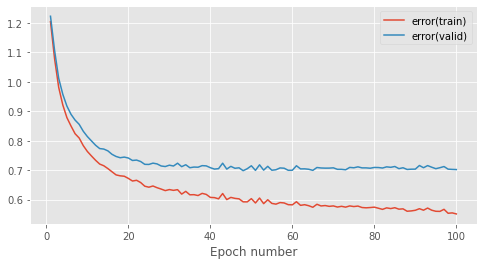

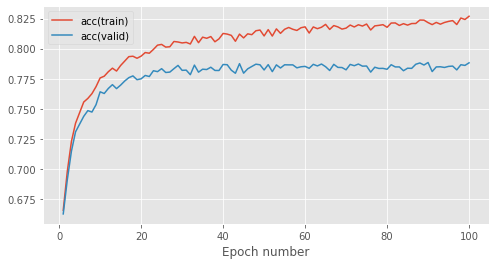

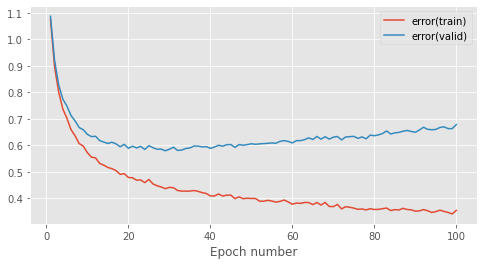

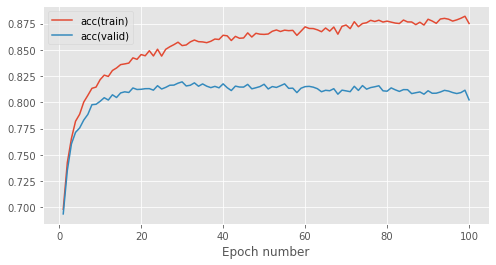

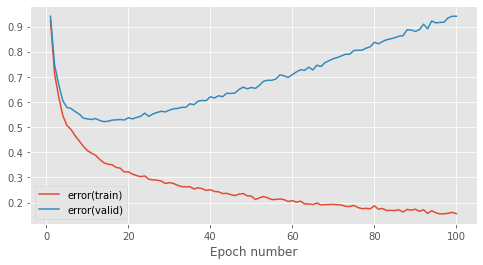

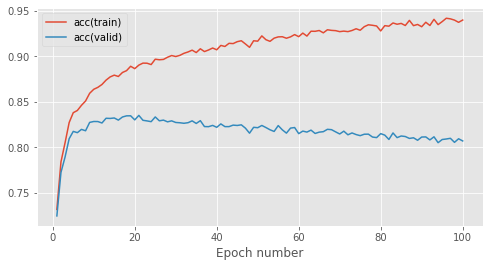

In [4]:
# This part contains coding work for 2.1 Network width
# Network with one hidden layer and various network width (number of neurons in hidden layer)

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim_list = 784, 47, [32,64,128]
stats_list_width = []
keys_list_width = []

for hidden_dim in hidden_dim_list:
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = AdamLearningRule()

    #Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    
    stats_list_width.append(stats)
    keys_list_width.append(keys)
    

In [5]:
# Tbale 1

# val. acc.
val_acc_32 = stats_list_width[0][1:, keys_list_width[0]['acc(valid)']][-1]
val_acc_64 = stats_list_width[1][1:, keys_list_width[1]['acc(valid)']][-1]
val_acc_128 = stats_list_width[2][1:, keys_list_width[2]['acc(valid)']][-1]


# generalization gap
generalization_gap_32 = stats_list_width[0][1:, keys_list_width[0]['error(valid)']][-1] - stats_list_width[0][1:, keys_list_width[0]['error(train)']][-1]
generalization_gap_64 = stats_list_width[1][1:, keys_list_width[1]['error(valid)']][-1] - stats_list_width[1][1:, keys_list_width[1]['error(train)']][-1]
generalization_gap_128 = stats_list_width[2][1:, keys_list_width[2]['error(valid)']][-1] - stats_list_width[2][1:, keys_list_width[2]['error(train)']][-1]

In [6]:
print("val_acc_32: ",val_acc_32)
print("val_acc_64: ",val_acc_64)
print("val_acc_128: ",val_acc_128)
print("generalization_gap_32: ",generalization_gap_32)
print("generalization_gap_64: ",generalization_gap_64)
print("generalization_gap_128: ",generalization_gap_128)

val_acc_32:  0.7882278481012658
val_acc_64:  0.8023417721518987
val_acc_128:  0.8069620253164554
generalization_gap_32:  0.15072434028196513
generalization_gap_64:  0.3239198828551723
generalization_gap_128:  0.7850050052953821


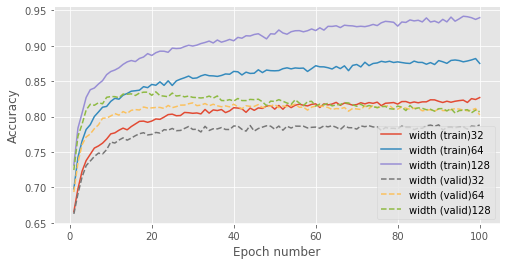

In [7]:
# figure 2 (a)
fig_a = plt.figure(figsize=(8, 4))
ax_a = fig_a.add_subplot(111)
for i in np.arange(len(keys_list_width)):
    ax_a.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats_list_width[i][1:, keys_list_width[i]['acc(train)']], label="width " + '(train)' + str(32*2**i))

for i in np.arange(len(keys_list_width)):
    ax_a.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats_list_width[i][1:, keys_list_width[i]['acc(valid)']], linestyle='--', label="width " + '(valid)' + str(32*2**i))
        
ax_a.legend(loc=0)
ax_a.set_xlabel('Epoch number')
ax_a.set_ylabel('Accuracy')

fig_a.savefig('Figure_2_a.png')
plt.show()

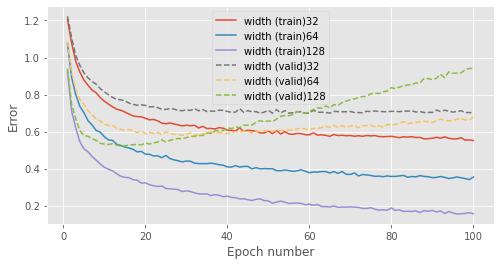

In [8]:
# figure 2 (b)
fig_b = plt.figure(figsize=(8, 4))
ax_b = fig_b.add_subplot(111)
for i in np.arange(len(keys_list_width)):
    ax_b.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats_list_width[i][1:, keys_list_width[i]['error(train)']], label="width " + '(train)' + str(32*2**i)) 
        
for i in np.arange(len(keys_list_width)):
    ax_b.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats_list_width[i][1:, keys_list_width[i]['error(valid)']], linestyle='--', label="width " + '(valid)' + str(32*2**i)) 

ax_b.legend(loc=0)
ax_b.set_xlabel('Epoch number')
ax_b.set_ylabel('Error')

fig_b.savefig('Figure_2_b.png')
plt.show()

# Section 2.2 Network depth

## One Hidden Layer

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.0s to complete
    error(train)=8.99e-01, acc(train)=7.41e-01, error(valid)=9.15e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.0s to complete
    error(train)=7.09e-01, acc(train)=7.88e-01, error(valid)=7.43e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.0s to complete
    error(train)=6.09e-01, acc(train)=8.12e-01, error(valid)=6.52e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.0s to complete
    error(train)=5.45e-01, acc(train)=8.27e-01, error(valid)=6.03e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.0s to complete
    error(train)=5.01e-01, acc(train)=8.41e-01, error(valid)=5.72e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.1s to complete
    error(train)=4.73e-01, acc(train)=8.46e-01, error(valid)=5.53e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.1s to complete
    error(train)=4.49e-01, acc(train)=8.54e-01, error(valid)=5.36e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.1s to complete
    error(train)=4.33e-01, acc(train)=8.58e-01, error(valid)=5.34e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.1s to complete
    error(train)=4.23e-01, acc(train)=8.59e-01, error(valid)=5.34e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.1s to complete
    error(train)=4.18e-01, acc(train)=8.59e-01, error(valid)=5.44e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.0s to complete
    error(train)=3.89e-01, acc(train)=8.69e-01, error(valid)=5.22e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.0s to complete
    error(train)=3.78e-01, acc(train)=8.73e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.1s to complete
    error(train)=3.66e-01, acc(train)=8.75e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 2.1s to complete
    error(train)=3.57e-01, acc(train)=8.78e-01, error(valid)=5.19e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 2.2s to complete
    error(train)=3.54e-01, acc(train)=8.79e-01, error(valid)=5.21e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 2.1s to complete
    error(train)=3.48e-01, acc(train)=8.79e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 2.1s to complete
    error(train)=3.38e-01, acc(train)=8.84e-01, error(valid)=5.25e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 2.1s to complete
    error(train)=3.36e-01, acc(train)=8.82e-01, error(valid)=5.31e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 2.2s to complete
    error(train)=3.39e-01, acc(train)=8.81e-01, error(valid)=5.41e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 2.1s to complete
    error(train)=3.26e-01, acc(train)=8.84e-01, error(valid)=5.37e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 2.1s to complete
    error(train)=3.21e-01, acc(train)=8.86e-01, error(valid)=5.42e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 2.1s to complete
    error(train)=3.08e-01, acc(train)=8.92e-01, error(valid)=5.39e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 2.1s to complete
    error(train)=3.07e-01, acc(train)=8.92e-01, error(valid)=5.49e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 2.1s to complete
    error(train)=2.99e-01, acc(train)=8.94e-01, error(valid)=5.42e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 2.2s to complete
    error(train)=2.99e-01, acc(train)=8.93e-01, error(valid)=5.51e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 2.1s to complete
    error(train)=2.94e-01, acc(train)=8.96e-01, error(valid)=5.58e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 2.1s to complete
    error(train)=2.89e-01, acc(train)=8.96e-01, error(valid)=5.62e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 2.2s to complete
    error(train)=2.80e-01, acc(train)=9.00e-01, error(valid)=5.58e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 2.2s to complete
    error(train)=2.81e-01, acc(train)=8.98e-01, error(valid)=5.66e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 2.2s to complete
    error(train)=2.78e-01, acc(train)=9.00e-01, error(valid)=5.70e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 2.2s to complete
    error(train)=2.79e-01, acc(train)=8.99e-01, error(valid)=5.80e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 2.3s to complete
    error(train)=2.78e-01, acc(train)=8.99e-01, error(valid)=5.84e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 2.2s to complete
    error(train)=2.62e-01, acc(train)=9.06e-01, error(valid)=5.76e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 2.2s to complete
    error(train)=2.62e-01, acc(train)=9.05e-01, error(valid)=5.85e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 2.2s to complete
    error(train)=2.58e-01, acc(train)=9.07e-01, error(valid)=5.91e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 2.4s to complete
    error(train)=2.65e-01, acc(train)=9.03e-01, error(valid)=5.97e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 2.7s to complete
    error(train)=2.54e-01, acc(train)=9.08e-01, error(valid)=6.04e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 2.2s to complete
    error(train)=2.51e-01, acc(train)=9.09e-01, error(valid)=6.08e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 2.2s to complete
    error(train)=2.54e-01, acc(train)=9.09e-01, error(valid)=6.15e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 2.7s to complete
    error(train)=2.56e-01, acc(train)=9.08e-01, error(valid)=6.22e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 2.3s to complete
    error(train)=2.55e-01, acc(train)=9.06e-01, error(valid)=6.33e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 2.4s to complete
    error(train)=2.47e-01, acc(train)=9.10e-01, error(valid)=6.24e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 2.3s to complete
    error(train)=2.38e-01, acc(train)=9.12e-01, error(valid)=6.34e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 2.3s to complete
    error(train)=2.40e-01, acc(train)=9.12e-01, error(valid)=6.37e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 2.3s to complete
    error(train)=2.31e-01, acc(train)=9.16e-01, error(valid)=6.33e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 2.3s to complete
    error(train)=2.30e-01, acc(train)=9.16e-01, error(valid)=6.41e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 2.3s to complete
    error(train)=2.28e-01, acc(train)=9.16e-01, error(valid)=6.41e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 2.3s to complete
    error(train)=2.26e-01, acc(train)=9.17e-01, error(valid)=6.59e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 2.3s to complete
    error(train)=2.26e-01, acc(train)=9.17e-01, error(valid)=6.56e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 2.3s to complete
    error(train)=2.27e-01, acc(train)=9.15e-01, error(valid)=6.71e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 2.3s to complete
    error(train)=2.18e-01, acc(train)=9.20e-01, error(valid)=6.67e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 2.3s to complete
    error(train)=2.20e-01, acc(train)=9.18e-01, error(valid)=6.79e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 2.3s to complete
    error(train)=2.16e-01, acc(train)=9.20e-01, error(valid)=6.86e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 2.9s to complete
    error(train)=2.16e-01, acc(train)=9.20e-01, error(valid)=6.89e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 2.4s to complete
    error(train)=2.10e-01, acc(train)=9.22e-01, error(valid)=6.82e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 2.3s to complete
    error(train)=2.07e-01, acc(train)=9.24e-01, error(valid)=6.88e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 2.3s to complete
    error(train)=2.12e-01, acc(train)=9.19e-01, error(valid)=7.05e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 2.3s to complete
    error(train)=2.10e-01, acc(train)=9.21e-01, error(valid)=7.08e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 2.3s to complete
    error(train)=2.05e-01, acc(train)=9.23e-01, error(valid)=7.10e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 2.3s to complete
    error(train)=2.05e-01, acc(train)=9.24e-01, error(valid)=7.19e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 2.3s to complete
    error(train)=1.97e-01, acc(train)=9.27e-01, error(valid)=7.18e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 2.3s to complete
    error(train)=2.08e-01, acc(train)=9.22e-01, error(valid)=7.37e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 2.3s to complete
    error(train)=2.00e-01, acc(train)=9.25e-01, error(valid)=7.31e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 2.3s to complete
    error(train)=2.04e-01, acc(train)=9.22e-01, error(valid)=7.46e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 2.3s to complete
    error(train)=2.00e-01, acc(train)=9.25e-01, error(valid)=7.47e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 2.3s to complete
    error(train)=1.97e-01, acc(train)=9.26e-01, error(valid)=7.52e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 2.3s to complete
    error(train)=1.91e-01, acc(train)=9.29e-01, error(valid)=7.58e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 2.3s to complete
    error(train)=1.94e-01, acc(train)=9.27e-01, error(valid)=7.67e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 2.3s to complete
    error(train)=1.93e-01, acc(train)=9.28e-01, error(valid)=7.75e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 2.3s to complete
    error(train)=1.83e-01, acc(train)=9.32e-01, error(valid)=7.64e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 2.3s to complete
    error(train)=1.88e-01, acc(train)=9.29e-01, error(valid)=7.83e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 2.3s to complete
    error(train)=1.80e-01, acc(train)=9.34e-01, error(valid)=7.75e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 2.3s to complete
    error(train)=1.86e-01, acc(train)=9.31e-01, error(valid)=7.88e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 2.3s to complete
    error(train)=1.84e-01, acc(train)=9.30e-01, error(valid)=7.95e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 2.3s to complete
    error(train)=1.81e-01, acc(train)=9.32e-01, error(valid)=7.94e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 2.3s to complete
    error(train)=1.84e-01, acc(train)=9.31e-01, error(valid)=8.26e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 2.3s to complete
    error(train)=1.86e-01, acc(train)=9.30e-01, error(valid)=8.17e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 2.3s to complete
    error(train)=1.85e-01, acc(train)=9.29e-01, error(valid)=8.24e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 2.3s to complete
    error(train)=1.75e-01, acc(train)=9.34e-01, error(valid)=8.19e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 2.3s to complete
    error(train)=1.77e-01, acc(train)=9.33e-01, error(valid)=8.33e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 2.3s to complete
    error(train)=1.85e-01, acc(train)=9.28e-01, error(valid)=8.48e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 2.3s to complete
    error(train)=1.83e-01, acc(train)=9.30e-01, error(valid)=8.60e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 2.3s to complete
    error(train)=1.81e-01, acc(train)=9.30e-01, error(valid)=8.49e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 2.3s to complete
    error(train)=1.75e-01, acc(train)=9.33e-01, error(valid)=8.60e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 2.3s to complete
    error(train)=1.74e-01, acc(train)=9.34e-01, error(valid)=8.73e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 2.3s to complete
    error(train)=1.72e-01, acc(train)=9.34e-01, error(valid)=8.68e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 2.3s to complete
    error(train)=1.63e-01, acc(train)=9.39e-01, error(valid)=8.71e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 2.3s to complete
    error(train)=1.65e-01, acc(train)=9.37e-01, error(valid)=8.74e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 2.3s to complete
    error(train)=1.62e-01, acc(train)=9.39e-01, error(valid)=8.74e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 2.3s to complete
    error(train)=1.58e-01, acc(train)=9.41e-01, error(valid)=8.84e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 2.3s to complete
    error(train)=1.62e-01, acc(train)=9.39e-01, error(valid)=9.04e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 2.3s to complete
    error(train)=1.68e-01, acc(train)=9.35e-01, error(valid)=9.11e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 2.3s to complete
    error(train)=1.66e-01, acc(train)=9.35e-01, error(valid)=9.12e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.5s to complete
    error(train)=1.64e-01, acc(train)=9.36e-01, error(valid)=9.26e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 2.4s to complete
    error(train)=1.60e-01, acc(train)=9.40e-01, error(valid)=9.17e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 2.3s to complete
    error(train)=1.59e-01, acc(train)=9.39e-01, error(valid)=9.33e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 2.3s to complete
    error(train)=1.64e-01, acc(train)=9.36e-01, error(valid)=9.37e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 2.3s to complete
    error(train)=1.60e-01, acc(train)=9.39e-01, error(valid)=9.48e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 2.3s to complete
    error(train)=1.58e-01, acc(train)=9.39e-01, error(valid)=9.40e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 2.3s to complete
    error(train)=1.59e-01, acc(train)=9.38e-01, error(valid)=9.58e-01, acc(valid)=8.03e-01


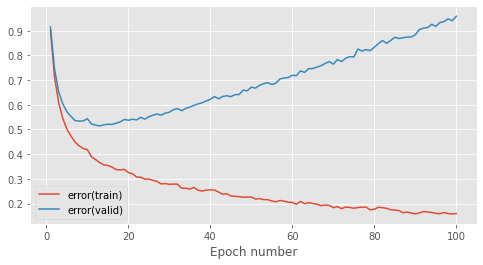

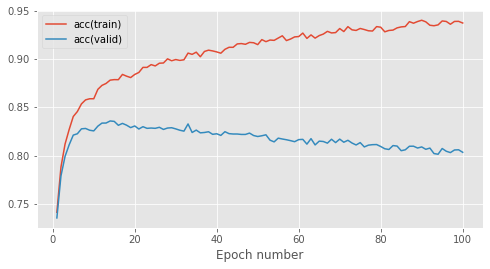

In [9]:
# This part contains coding work for 2.2 Network depth
# One hidden layer

stats_list_depth = [] # Creating lists to store output for models with different hidden layers
keys_list_depth = []  # used for plotting later on

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule()

#Remember to use notebook=False when you write a script to be run in a terminal
stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    
stats_list_depth.append(stats)
keys_list_depth.append(keys)

## Two Hidden Layers

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.6s to complete
    error(train)=7.66e-01, acc(train)=7.65e-01, error(valid)=7.96e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.6s to complete
    error(train)=6.00e-01, acc(train)=8.09e-01, error(valid)=6.47e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.6s to complete
    error(train)=5.11e-01, acc(train)=8.33e-01, error(valid)=5.72e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.6s to complete
    error(train)=4.60e-01, acc(train)=8.46e-01, error(valid)=5.41e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.6s to complete
    error(train)=4.26e-01, acc(train)=8.55e-01, error(valid)=5.25e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.6s to complete
    error(train)=4.06e-01, acc(train)=8.61e-01, error(valid)=5.08e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.7s to complete
    error(train)=3.78e-01, acc(train)=8.69e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.7s to complete
    error(train)=3.66e-01, acc(train)=8.70e-01, error(valid)=4.96e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.7s to complete
    error(train)=3.58e-01, acc(train)=8.71e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.7s to complete
    error(train)=3.37e-01, acc(train)=8.79e-01, error(valid)=5.02e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.6s to complete
    error(train)=3.23e-01, acc(train)=8.84e-01, error(valid)=4.95e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.7s to complete
    error(train)=3.01e-01, acc(train)=8.92e-01, error(valid)=4.95e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.7s to complete
    error(train)=3.01e-01, acc(train)=8.89e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 2.6s to complete
    error(train)=2.92e-01, acc(train)=8.92e-01, error(valid)=5.05e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 2.7s to complete
    error(train)=2.83e-01, acc(train)=8.94e-01, error(valid)=5.25e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 2.6s to complete
    error(train)=2.74e-01, acc(train)=8.98e-01, error(valid)=5.25e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 2.7s to complete
    error(train)=2.59e-01, acc(train)=9.02e-01, error(valid)=5.18e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 2.7s to complete
    error(train)=2.59e-01, acc(train)=9.04e-01, error(valid)=5.40e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 2.7s to complete
    error(train)=2.34e-01, acc(train)=9.10e-01, error(valid)=5.15e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 2.7s to complete
    error(train)=2.37e-01, acc(train)=9.09e-01, error(valid)=5.38e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 2.6s to complete
    error(train)=2.39e-01, acc(train)=9.07e-01, error(valid)=5.60e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 2.6s to complete
    error(train)=2.26e-01, acc(train)=9.12e-01, error(valid)=5.62e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 2.7s to complete
    error(train)=2.29e-01, acc(train)=9.11e-01, error(valid)=5.73e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 2.6s to complete
    error(train)=2.29e-01, acc(train)=9.11e-01, error(valid)=5.95e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 2.6s to complete
    error(train)=2.10e-01, acc(train)=9.18e-01, error(valid)=5.89e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 2.6s to complete
    error(train)=2.03e-01, acc(train)=9.20e-01, error(valid)=5.89e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 2.6s to complete
    error(train)=2.06e-01, acc(train)=9.19e-01, error(valid)=6.07e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 2.6s to complete
    error(train)=2.05e-01, acc(train)=9.18e-01, error(valid)=6.26e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 2.7s to complete
    error(train)=1.98e-01, acc(train)=9.22e-01, error(valid)=6.43e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.4s to complete
    error(train)=1.96e-01, acc(train)=9.22e-01, error(valid)=6.55e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 2.7s to complete
    error(train)=1.92e-01, acc(train)=9.23e-01, error(valid)=6.51e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 2.6s to complete
    error(train)=1.92e-01, acc(train)=9.22e-01, error(valid)=6.80e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 2.6s to complete
    error(train)=1.85e-01, acc(train)=9.24e-01, error(valid)=6.83e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 2.6s to complete
    error(train)=1.83e-01, acc(train)=9.26e-01, error(valid)=6.85e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 2.6s to complete
    error(train)=1.78e-01, acc(train)=9.29e-01, error(valid)=6.93e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 2.6s to complete
    error(train)=1.79e-01, acc(train)=9.28e-01, error(valid)=7.08e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 2.6s to complete
    error(train)=1.73e-01, acc(train)=9.31e-01, error(valid)=7.32e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 2.6s to complete
    error(train)=1.68e-01, acc(train)=9.32e-01, error(valid)=7.31e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 2.6s to complete
    error(train)=1.74e-01, acc(train)=9.30e-01, error(valid)=7.51e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 2.6s to complete
    error(train)=1.60e-01, acc(train)=9.35e-01, error(valid)=7.54e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 2.6s to complete
    error(train)=1.64e-01, acc(train)=9.34e-01, error(valid)=7.72e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 2.6s to complete
    error(train)=1.57e-01, acc(train)=9.36e-01, error(valid)=7.74e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 2.6s to complete
    error(train)=1.54e-01, acc(train)=9.37e-01, error(valid)=7.99e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 2.6s to complete
    error(train)=1.64e-01, acc(train)=9.34e-01, error(valid)=8.17e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 2.6s to complete
    error(train)=1.60e-01, acc(train)=9.34e-01, error(valid)=8.19e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 2.6s to complete
    error(train)=1.58e-01, acc(train)=9.34e-01, error(valid)=8.26e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 2.6s to complete
    error(train)=1.44e-01, acc(train)=9.41e-01, error(valid)=8.26e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 2.6s to complete
    error(train)=1.53e-01, acc(train)=9.37e-01, error(valid)=8.60e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 2.7s to complete
    error(train)=1.39e-01, acc(train)=9.43e-01, error(valid)=8.65e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 2.6s to complete
    error(train)=1.62e-01, acc(train)=9.34e-01, error(valid)=9.08e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 2.7s to complete
    error(train)=1.41e-01, acc(train)=9.40e-01, error(valid)=8.65e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 2.6s to complete
    error(train)=1.37e-01, acc(train)=9.43e-01, error(valid)=8.91e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 2.7s to complete
    error(train)=1.29e-01, acc(train)=9.47e-01, error(valid)=9.20e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 2.6s to complete
    error(train)=1.48e-01, acc(train)=9.40e-01, error(valid)=9.61e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 2.7s to complete
    error(train)=1.43e-01, acc(train)=9.41e-01, error(valid)=9.74e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 2.7s to complete
    error(train)=1.36e-01, acc(train)=9.44e-01, error(valid)=9.62e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 2.7s to complete
    error(train)=1.34e-01, acc(train)=9.44e-01, error(valid)=9.66e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 2.7s to complete
    error(train)=1.28e-01, acc(train)=9.47e-01, error(valid)=9.97e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 2.7s to complete
    error(train)=1.49e-01, acc(train)=9.40e-01, error(valid)=1.03e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 2.6s to complete
    error(train)=1.31e-01, acc(train)=9.47e-01, error(valid)=1.01e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 2.7s to complete
    error(train)=1.27e-01, acc(train)=9.47e-01, error(valid)=1.03e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 2.6s to complete
    error(train)=1.27e-01, acc(train)=9.48e-01, error(valid)=1.05e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 2.7s to complete
    error(train)=1.28e-01, acc(train)=9.47e-01, error(valid)=1.05e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 2.7s to complete
    error(train)=1.27e-01, acc(train)=9.46e-01, error(valid)=1.08e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.9s to complete
    error(train)=1.29e-01, acc(train)=9.47e-01, error(valid)=1.10e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 2.7s to complete
    error(train)=1.16e-01, acc(train)=9.52e-01, error(valid)=1.07e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 2.7s to complete
    error(train)=1.34e-01, acc(train)=9.46e-01, error(valid)=1.11e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 2.7s to complete
    error(train)=1.22e-01, acc(train)=9.50e-01, error(valid)=1.11e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 2.9s to complete
    error(train)=1.22e-01, acc(train)=9.50e-01, error(valid)=1.15e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 2.7s to complete
    error(train)=1.25e-01, acc(train)=9.48e-01, error(valid)=1.15e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 2.6s to complete
    error(train)=1.16e-01, acc(train)=9.52e-01, error(valid)=1.15e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 2.7s to complete
    error(train)=1.18e-01, acc(train)=9.51e-01, error(valid)=1.16e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 2.7s to complete
    error(train)=1.16e-01, acc(train)=9.52e-01, error(valid)=1.17e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 2.6s to complete
    error(train)=1.21e-01, acc(train)=9.50e-01, error(valid)=1.22e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 2.6s to complete
    error(train)=1.08e-01, acc(train)=9.55e-01, error(valid)=1.20e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 2.6s to complete
    error(train)=1.09e-01, acc(train)=9.56e-01, error(valid)=1.22e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 2.7s to complete
    error(train)=1.07e-01, acc(train)=9.55e-01, error(valid)=1.25e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 2.6s to complete
    error(train)=1.10e-01, acc(train)=9.56e-01, error(valid)=1.26e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 2.6s to complete
    error(train)=1.03e-01, acc(train)=9.58e-01, error(valid)=1.25e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 2.6s to complete
    error(train)=1.07e-01, acc(train)=9.56e-01, error(valid)=1.25e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 2.6s to complete
    error(train)=1.02e-01, acc(train)=9.58e-01, error(valid)=1.26e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 2.6s to complete
    error(train)=1.10e-01, acc(train)=9.55e-01, error(valid)=1.30e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 2.6s to complete
    error(train)=1.11e-01, acc(train)=9.55e-01, error(valid)=1.31e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 2.7s to complete
    error(train)=1.11e-01, acc(train)=9.55e-01, error(valid)=1.31e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 2.7s to complete
    error(train)=1.11e-01, acc(train)=9.55e-01, error(valid)=1.32e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 2.6s to complete
    error(train)=1.12e-01, acc(train)=9.55e-01, error(valid)=1.36e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 2.8s to complete
    error(train)=1.12e-01, acc(train)=9.54e-01, error(valid)=1.39e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 2.7s to complete
    error(train)=9.97e-02, acc(train)=9.59e-01, error(valid)=1.37e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 2.7s to complete
    error(train)=1.04e-01, acc(train)=9.57e-01, error(valid)=1.40e+00, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 2.6s to complete
    error(train)=1.08e-01, acc(train)=9.57e-01, error(valid)=1.42e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 2.7s to complete
    error(train)=1.03e-01, acc(train)=9.57e-01, error(valid)=1.40e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 2.7s to complete
    error(train)=1.15e-01, acc(train)=9.52e-01, error(valid)=1.44e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 2.7s to complete
    error(train)=1.19e-01, acc(train)=9.53e-01, error(valid)=1.45e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 2.7s to complete
    error(train)=1.04e-01, acc(train)=9.58e-01, error(valid)=1.45e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 2.7s to complete
    error(train)=1.12e-01, acc(train)=9.55e-01, error(valid)=1.49e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 2.7s to complete
    error(train)=9.94e-02, acc(train)=9.60e-01, error(valid)=1.48e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 2.7s to complete
    error(train)=1.01e-01, acc(train)=9.58e-01, error(valid)=1.49e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 2.6s to complete
    error(train)=1.03e-01, acc(train)=9.59e-01, error(valid)=1.51e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 2.7s to complete
    error(train)=1.01e-01, acc(train)=9.58e-01, error(valid)=1.51e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.7s to complete
    error(train)=1.03e-01, acc(train)=9.58e-01, error(valid)=1.53e+00, acc(valid)=8.19e-01


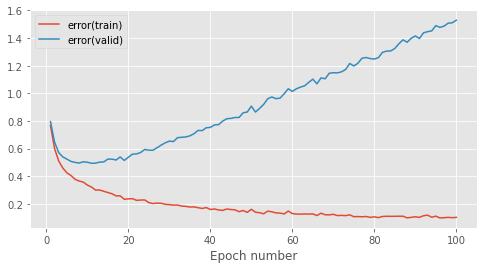

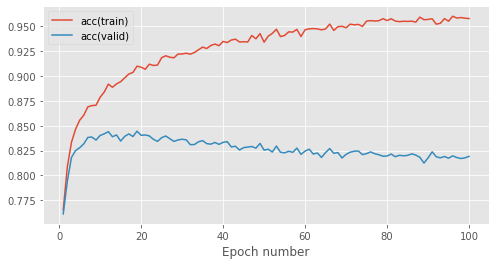

In [10]:
# This part contains coding work for 2.2 Network depth
# Two hidden layers

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule()

#Remember to use notebook=False when you write a script to be run in a terminal
stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    
stats_list_depth.append(stats)
keys_list_depth.append(keys)


## Three Hidden Layers

In [11]:
seed = 11102019 
rng = np.random.RandomState(seed)
from mlp.initialisers import ConstantInit, GlorotUniformInit
weights_init = GlorotUniformInit(rng=rng)
print(weights_init((3,3)))

[[ 0.18681222 -0.37348583  0.51011293]
 [-0.47430083  0.90562802 -0.85788021]
 [-0.51069689  0.42095807  0.52741404]]


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.9s to complete
    error(train)=7.06e-01, acc(train)=7.74e-01, error(valid)=7.40e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.9s to complete
    error(train)=5.56e-01, acc(train)=8.16e-01, error(valid)=6.05e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.0s to complete
    error(train)=4.93e-01, acc(train)=8.30e-01, error(valid)=5.60e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.0s to complete
    error(train)=4.40e-01, acc(train)=8.47e-01, error(valid)=5.25e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.0s to complete
    error(train)=4.05e-01, acc(train)=8.57e-01, error(valid)=5.13e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.0s to complete
    error(train)=3.94e-01, acc(train)=8.60e-01, error(valid)=5.20e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.0s to complete
    error(train)=3.60e-01, acc(train)=8.71e-01, error(valid)=5.00e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.1s to complete
    error(train)=3.46e-01, acc(train)=8.73e-01, error(valid)=5.00e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.1s to complete
    error(train)=3.26e-01, acc(train)=8.80e-01, error(valid)=5.06e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.3s to complete
    error(train)=3.19e-01, acc(train)=8.79e-01, error(valid)=5.21e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.1s to complete
    error(train)=2.99e-01, acc(train)=8.87e-01, error(valid)=4.96e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.1s to complete
    error(train)=2.82e-01, acc(train)=8.93e-01, error(valid)=5.06e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.1s to complete
    error(train)=2.74e-01, acc(train)=8.97e-01, error(valid)=5.05e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.1s to complete
    error(train)=2.74e-01, acc(train)=8.95e-01, error(valid)=5.28e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.1s to complete
    error(train)=2.73e-01, acc(train)=8.95e-01, error(valid)=5.41e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.2s to complete
    error(train)=2.39e-01, acc(train)=9.07e-01, error(valid)=5.30e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.2s to complete
    error(train)=2.47e-01, acc(train)=9.05e-01, error(valid)=5.62e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.2s to complete
    error(train)=2.54e-01, acc(train)=8.97e-01, error(valid)=5.63e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.2s to complete
    error(train)=2.25e-01, acc(train)=9.11e-01, error(valid)=5.50e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.2s to complete
    error(train)=2.48e-01, acc(train)=9.02e-01, error(valid)=6.00e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.2s to complete
    error(train)=2.11e-01, acc(train)=9.16e-01, error(valid)=5.80e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.2s to complete
    error(train)=2.03e-01, acc(train)=9.18e-01, error(valid)=6.10e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.2s to complete
    error(train)=2.05e-01, acc(train)=9.17e-01, error(valid)=6.08e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.2s to complete
    error(train)=1.98e-01, acc(train)=9.20e-01, error(valid)=6.08e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.2s to complete
    error(train)=1.94e-01, acc(train)=9.21e-01, error(valid)=6.42e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.2s to complete
    error(train)=2.01e-01, acc(train)=9.18e-01, error(valid)=6.45e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.1s to complete
    error(train)=1.97e-01, acc(train)=9.20e-01, error(valid)=6.75e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.2s to complete
    error(train)=1.91e-01, acc(train)=9.22e-01, error(valid)=6.69e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.2s to complete
    error(train)=1.77e-01, acc(train)=9.27e-01, error(valid)=6.71e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.5s to complete
    error(train)=1.83e-01, acc(train)=9.26e-01, error(valid)=6.97e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.2s to complete
    error(train)=1.74e-01, acc(train)=9.28e-01, error(valid)=6.97e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.2s to complete
    error(train)=1.73e-01, acc(train)=9.27e-01, error(valid)=7.32e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.2s to complete
    error(train)=1.71e-01, acc(train)=9.31e-01, error(valid)=7.46e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.2s to complete
    error(train)=1.82e-01, acc(train)=9.26e-01, error(valid)=7.92e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.2s to complete
    error(train)=1.66e-01, acc(train)=9.32e-01, error(valid)=7.52e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.3s to complete
    error(train)=1.72e-01, acc(train)=9.29e-01, error(valid)=7.80e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.2s to complete
    error(train)=1.60e-01, acc(train)=9.34e-01, error(valid)=8.07e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.2s to complete
    error(train)=1.70e-01, acc(train)=9.31e-01, error(valid)=8.37e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.1s to complete
    error(train)=1.52e-01, acc(train)=9.38e-01, error(valid)=8.10e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.1s to complete
    error(train)=1.58e-01, acc(train)=9.36e-01, error(valid)=8.22e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.1s to complete
    error(train)=1.49e-01, acc(train)=9.38e-01, error(valid)=8.31e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.2s to complete
    error(train)=1.47e-01, acc(train)=9.38e-01, error(valid)=8.70e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.2s to complete
    error(train)=1.50e-01, acc(train)=9.39e-01, error(valid)=8.67e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.1s to complete
    error(train)=1.39e-01, acc(train)=9.42e-01, error(valid)=8.45e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.1s to complete
    error(train)=1.48e-01, acc(train)=9.39e-01, error(valid)=8.88e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.1s to complete
    error(train)=1.66e-01, acc(train)=9.35e-01, error(valid)=9.46e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.1s to complete
    error(train)=1.49e-01, acc(train)=9.38e-01, error(valid)=9.36e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.1s to complete
    error(train)=1.47e-01, acc(train)=9.40e-01, error(valid)=9.70e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.2s to complete
    error(train)=1.57e-01, acc(train)=9.38e-01, error(valid)=9.83e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.2s to complete
    error(train)=1.43e-01, acc(train)=9.40e-01, error(valid)=9.62e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.2s to complete
    error(train)=1.37e-01, acc(train)=9.45e-01, error(valid)=9.68e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.1s to complete
    error(train)=1.32e-01, acc(train)=9.46e-01, error(valid)=9.57e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.2s to complete
    error(train)=1.49e-01, acc(train)=9.39e-01, error(valid)=1.03e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.2s to complete
    error(train)=1.30e-01, acc(train)=9.46e-01, error(valid)=1.01e+00, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.1s to complete
    error(train)=1.45e-01, acc(train)=9.41e-01, error(valid)=1.06e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.1s to complete
    error(train)=1.30e-01, acc(train)=9.46e-01, error(valid)=1.04e+00, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.1s to complete
    error(train)=1.31e-01, acc(train)=9.47e-01, error(valid)=1.07e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.1s to complete
    error(train)=1.28e-01, acc(train)=9.48e-01, error(valid)=1.06e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.2s to complete
    error(train)=1.32e-01, acc(train)=9.45e-01, error(valid)=1.06e+00, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.1s to complete
    error(train)=1.45e-01, acc(train)=9.42e-01, error(valid)=1.10e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.1s to complete
    error(train)=1.28e-01, acc(train)=9.48e-01, error(valid)=1.10e+00, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.1s to complete
    error(train)=1.28e-01, acc(train)=9.48e-01, error(valid)=1.13e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.3s to complete
    error(train)=1.28e-01, acc(train)=9.48e-01, error(valid)=1.13e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.2s to complete
    error(train)=1.28e-01, acc(train)=9.49e-01, error(valid)=1.18e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.2s to complete
    error(train)=1.43e-01, acc(train)=9.44e-01, error(valid)=1.25e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.2s to complete
    error(train)=1.16e-01, acc(train)=9.52e-01, error(valid)=1.18e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.2s to complete
    error(train)=1.24e-01, acc(train)=9.50e-01, error(valid)=1.20e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.2s to complete
    error(train)=1.20e-01, acc(train)=9.52e-01, error(valid)=1.21e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.2s to complete
    error(train)=1.29e-01, acc(train)=9.47e-01, error(valid)=1.25e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.2s to complete
    error(train)=1.22e-01, acc(train)=9.50e-01, error(valid)=1.23e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.2s to complete
    error(train)=1.11e-01, acc(train)=9.55e-01, error(valid)=1.22e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.2s to complete
    error(train)=1.25e-01, acc(train)=9.51e-01, error(valid)=1.32e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.2s to complete
    error(train)=1.13e-01, acc(train)=9.53e-01, error(valid)=1.29e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.2s to complete
    error(train)=1.27e-01, acc(train)=9.51e-01, error(valid)=1.32e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.2s to complete
    error(train)=1.27e-01, acc(train)=9.49e-01, error(valid)=1.35e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.2s to complete
    error(train)=1.19e-01, acc(train)=9.53e-01, error(valid)=1.32e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.2s to complete
    error(train)=1.21e-01, acc(train)=9.52e-01, error(valid)=1.37e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.2s to complete
    error(train)=1.14e-01, acc(train)=9.55e-01, error(valid)=1.34e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.2s to complete
    error(train)=1.16e-01, acc(train)=9.54e-01, error(valid)=1.38e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.2s to complete
    error(train)=1.39e-01, acc(train)=9.47e-01, error(valid)=1.43e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.2s to complete
    error(train)=1.16e-01, acc(train)=9.54e-01, error(valid)=1.45e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.2s to complete
    error(train)=1.06e-01, acc(train)=9.57e-01, error(valid)=1.38e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.2s to complete
    error(train)=1.15e-01, acc(train)=9.54e-01, error(valid)=1.51e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.2s to complete
    error(train)=1.16e-01, acc(train)=9.54e-01, error(valid)=1.44e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.2s to complete
    error(train)=1.09e-01, acc(train)=9.57e-01, error(valid)=1.44e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.2s to complete
    error(train)=1.09e-01, acc(train)=9.57e-01, error(valid)=1.44e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.2s to complete
    error(train)=1.17e-01, acc(train)=9.54e-01, error(valid)=1.47e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.2s to complete
    error(train)=1.03e-01, acc(train)=9.60e-01, error(valid)=1.49e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.2s to complete
    error(train)=1.26e-01, acc(train)=9.53e-01, error(valid)=1.53e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 3.2s to complete
    error(train)=1.03e-01, acc(train)=9.59e-01, error(valid)=1.52e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.2s to complete
    error(train)=1.16e-01, acc(train)=9.56e-01, error(valid)=1.51e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.2s to complete
    error(train)=1.10e-01, acc(train)=9.57e-01, error(valid)=1.54e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.2s to complete
    error(train)=1.05e-01, acc(train)=9.59e-01, error(valid)=1.57e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.2s to complete
    error(train)=1.17e-01, acc(train)=9.56e-01, error(valid)=1.57e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.2s to complete
    error(train)=1.03e-01, acc(train)=9.59e-01, error(valid)=1.61e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.2s to complete
    error(train)=1.06e-01, acc(train)=9.60e-01, error(valid)=1.61e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.2s to complete
    error(train)=9.99e-02, acc(train)=9.62e-01, error(valid)=1.60e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.2s to complete
    error(train)=1.02e-01, acc(train)=9.61e-01, error(valid)=1.62e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.2s to complete
    error(train)=1.08e-01, acc(train)=9.58e-01, error(valid)=1.62e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.2s to complete
    error(train)=1.03e-01, acc(train)=9.59e-01, error(valid)=1.66e+00, acc(valid)=8.21e-01


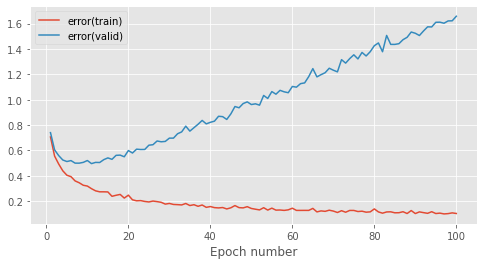

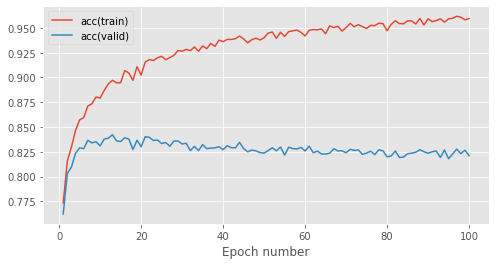

In [12]:
# This part contains coding work for 2.2 Network depth
# Three hidden layers

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule()

#Remember to use notebook=False when you write a script to be run in a terminal
stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    
stats_list_depth.append(stats)
keys_list_depth.append(keys)


In [13]:
# Table 2
# val. acc.

val_acc_depth1 = stats_list_depth[0][1:, keys_list_depth[0]['acc(valid)']][-1]
val_acc_depth2 = stats_list_depth[1][1:, keys_list_depth[1]['acc(valid)']][-1]
val_acc_depth3 = stats_list_depth[2][1:, keys_list_depth[2]['acc(valid)']][-1]


# generalization gap
generalization_gap_depth1 = stats_list_depth[0][1:, keys_list_depth[0]['error(valid)']][-1] - stats_list_depth[0][1:, keys_list_depth[0]['error(train)']][-1]
generalization_gap_depth2 = stats_list_depth[1][1:, keys_list_depth[1]['error(valid)']][-1] - stats_list_depth[1][1:, keys_list_depth[1]['error(train)']][-1]
generalization_gap_depth3 = stats_list_depth[2][1:, keys_list_depth[2]['error(valid)']][-1] - stats_list_depth[2][1:, keys_list_depth[2]['error(train)']][-1]

In [14]:
print('val_acc_depth1: ',val_acc_depth1)
print('val_acc_depth2: ',val_acc_depth2)
print('val_acc_depth3: ',val_acc_depth3)

print('generalization_gap_depth1: ',generalization_gap_depth1)
print('generalization_gap_depth2: ',generalization_gap_depth2)
print('generalization_gap_depth3: ',generalization_gap_depth3)

val_acc_depth1:  0.8033544303797466
val_acc_depth2:  0.8191772151898734
val_acc_depth3:  0.8211392405063294
generalization_gap_depth1:  0.7988991978753057
generalization_gap_depth2:  1.4254873354459352
generalization_gap_depth3:  1.554704094386665


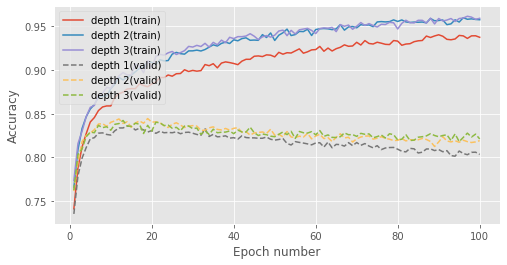

In [15]:
# Figure 3(a)
fig_3a = plt.figure(figsize=(8, 4))
ax_3a = fig_3a.add_subplot(111)
for i in np.arange(len(keys_list_depth)):
    ax_3a.plot(np.arange(1, stats.shape[0]) * stats_interval, 
               stats_list_depth[i][1:, keys_list_depth[i]['acc(train)']], label="depth " +  str(i+1) + '(train)') 
        
for i in np.arange(len(keys_list_depth)):
    ax_3a.plot(np.arange(1, stats.shape[0]) * stats_interval, 
               stats_list_depth[i][1:, keys_list_depth[i]['acc(valid)']], linestyle='--', label="depth " +  str(i+1) + '(valid)') 
        
ax_3a.legend(loc=0)
ax_3a.set_xlabel('Epoch number')
ax_3a.set_ylabel('Accuracy')

fig_3a.savefig('Figure_3_a.png')
plt.show()

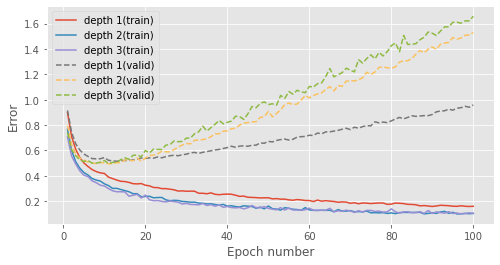

In [16]:
# Figure 3 (b)
fig_3b = plt.figure(figsize=(8, 4))
ax_3b = fig_3b.add_subplot(111)
for i in np.arange(len(keys_list_depth)):
    ax_3b.plot(np.arange(1, stats.shape[0]) * stats_interval, 
               stats_list_depth[i][1:, keys_list_depth[i]['error(train)']], label="depth " +  str(i+1) + '(train)') 
        
for i in np.arange(len(keys_list_depth)):
    ax_3b.plot(np.arange(1, stats.shape[0]) * stats_interval, 
               stats_list_depth[i][1:, keys_list_depth[i]['error(valid)']], linestyle='--', label="depth " +  str(i+1) + '(valid)') 
        
ax_3b.legend(loc=0)
ax_3b.set_xlabel('Epoch number')
ax_3b.set_ylabel('Error')

fig_3b.savefig('Figure_3_b.png')
plt.show()

# Section4 
## Dropout

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.2s to complete
    error(train)=2.33e+00, acc(train)=4.48e-01, error(valid)=2.32e+00, acc(valid)=4.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.2s to complete
    error(train)=1.74e+00, acc(train)=5.47e-01, error(valid)=1.73e+00, acc(valid)=5.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.3s to complete
    error(train)=1.51e+00, acc(train)=5.92e-01, error(valid)=1.51e+00, acc(valid)=5.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.3s to complete
    error(train)=1.37e+00, acc(train)=6.20e-01, error(valid)=1.37e+00, acc(valid)=6.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.3s to complete
    error(train)=1.27e+00, acc(train)=6.41e-01, error(valid)=1.27e+00, acc(valid)=6.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.3s to complete
    error(train)=1.19e+00, acc(train)=6.58e-01, error(valid)=1.19e+00, acc(valid)=6.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.3s to complete
    error(train)=1.12e+00, acc(train)=6.75e-01, error(valid)=1.13e+00, acc(valid)=6.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.3s to complete
    error(train)=1.06e+00, acc(train)=6.90e-01, error(valid)=1.07e+00, acc(valid)=6.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.3s to complete
    error(train)=1.01e+00, acc(train)=7.02e-01, error(valid)=1.02e+00, acc(valid)=6.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.4s to complete
    error(train)=9.74e-01, acc(train)=7.12e-01, error(valid)=9.82e-01, acc(valid)=7.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.4s to complete
    error(train)=9.41e-01, acc(train)=7.19e-01, error(valid)=9.50e-01, acc(valid)=7.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.4s to complete
    error(train)=9.07e-01, acc(train)=7.28e-01, error(valid)=9.18e-01, acc(valid)=7.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.4s to complete
    error(train)=8.79e-01, acc(train)=7.34e-01, error(valid)=8.91e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.4s to complete
    error(train)=8.56e-01, acc(train)=7.42e-01, error(valid)=8.69e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.4s to complete
    error(train)=8.36e-01, acc(train)=7.46e-01, error(valid)=8.50e-01, acc(valid)=7.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.4s to complete
    error(train)=8.17e-01, acc(train)=7.51e-01, error(valid)=8.32e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 4.8s to complete
    error(train)=7.95e-01, acc(train)=7.56e-01, error(valid)=8.11e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.4s to complete
    error(train)=7.80e-01, acc(train)=7.60e-01, error(valid)=7.96e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.4s to complete
    error(train)=7.60e-01, acc(train)=7.65e-01, error(valid)=7.77e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.4s to complete
    error(train)=7.54e-01, acc(train)=7.66e-01, error(valid)=7.72e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.4s to complete
    error(train)=7.36e-01, acc(train)=7.71e-01, error(valid)=7.55e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.5s to complete
    error(train)=7.19e-01, acc(train)=7.74e-01, error(valid)=7.39e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.5s to complete
    error(train)=7.09e-01, acc(train)=7.76e-01, error(valid)=7.29e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.4s to complete
    error(train)=6.98e-01, acc(train)=7.79e-01, error(valid)=7.20e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.4s to complete
    error(train)=6.88e-01, acc(train)=7.81e-01, error(valid)=7.11e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.5s to complete
    error(train)=6.81e-01, acc(train)=7.84e-01, error(valid)=7.05e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.4s to complete
    error(train)=6.70e-01, acc(train)=7.87e-01, error(valid)=6.94e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.4s to complete
    error(train)=6.62e-01, acc(train)=7.89e-01, error(valid)=6.88e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.4s to complete
    error(train)=6.54e-01, acc(train)=7.92e-01, error(valid)=6.80e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.4s to complete
    error(train)=6.48e-01, acc(train)=7.92e-01, error(valid)=6.74e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.5s to complete
    error(train)=6.41e-01, acc(train)=7.95e-01, error(valid)=6.69e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.4s to complete
    error(train)=6.37e-01, acc(train)=7.96e-01, error(valid)=6.65e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.4s to complete
    error(train)=6.23e-01, acc(train)=7.99e-01, error(valid)=6.51e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.4s to complete
    error(train)=6.16e-01, acc(train)=8.01e-01, error(valid)=6.45e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.4s to complete
    error(train)=6.14e-01, acc(train)=8.02e-01, error(valid)=6.44e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.4s to complete
    error(train)=6.06e-01, acc(train)=8.03e-01, error(valid)=6.37e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.5s to complete
    error(train)=6.03e-01, acc(train)=8.05e-01, error(valid)=6.33e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.4s to complete
    error(train)=5.96e-01, acc(train)=8.06e-01, error(valid)=6.27e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.4s to complete
    error(train)=5.94e-01, acc(train)=8.07e-01, error(valid)=6.26e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.4s to complete
    error(train)=5.87e-01, acc(train)=8.09e-01, error(valid)=6.20e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.4s to complete
    error(train)=5.84e-01, acc(train)=8.10e-01, error(valid)=6.17e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.4s to complete
    error(train)=5.78e-01, acc(train)=8.11e-01, error(valid)=6.11e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.4s to complete
    error(train)=5.73e-01, acc(train)=8.13e-01, error(valid)=6.06e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.8s to complete
    error(train)=5.70e-01, acc(train)=8.13e-01, error(valid)=6.04e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.4s to complete
    error(train)=5.64e-01, acc(train)=8.15e-01, error(valid)=5.99e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.4s to complete
    error(train)=5.63e-01, acc(train)=8.15e-01, error(valid)=6.00e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.4s to complete
    error(train)=5.60e-01, acc(train)=8.16e-01, error(valid)=5.97e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.4s to complete
    error(train)=5.54e-01, acc(train)=8.17e-01, error(valid)=5.92e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.4s to complete
    error(train)=5.52e-01, acc(train)=8.18e-01, error(valid)=5.90e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.5s to complete
    error(train)=5.49e-01, acc(train)=8.19e-01, error(valid)=5.87e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.4s to complete
    error(train)=5.45e-01, acc(train)=8.19e-01, error(valid)=5.84e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.5s to complete
    error(train)=5.44e-01, acc(train)=8.19e-01, error(valid)=5.83e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.5s to complete
    error(train)=5.40e-01, acc(train)=8.21e-01, error(valid)=5.80e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.5s to complete
    error(train)=5.36e-01, acc(train)=8.22e-01, error(valid)=5.75e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.4s to complete
    error(train)=5.32e-01, acc(train)=8.23e-01, error(valid)=5.72e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.4s to complete
    error(train)=5.30e-01, acc(train)=8.23e-01, error(valid)=5.69e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.4s to complete
    error(train)=5.26e-01, acc(train)=8.24e-01, error(valid)=5.68e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.4s to complete
    error(train)=5.22e-01, acc(train)=8.25e-01, error(valid)=5.65e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.4s to complete
    error(train)=5.21e-01, acc(train)=8.26e-01, error(valid)=5.60e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.5s to complete
    error(train)=5.19e-01, acc(train)=8.27e-01, error(valid)=5.61e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.4s to complete
    error(train)=5.17e-01, acc(train)=8.27e-01, error(valid)=5.60e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.4s to complete
    error(train)=5.12e-01, acc(train)=8.28e-01, error(valid)=5.56e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.4s to complete
    error(train)=5.11e-01, acc(train)=8.29e-01, error(valid)=5.55e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.4s to complete
    error(train)=5.09e-01, acc(train)=8.29e-01, error(valid)=5.53e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.4s to complete
    error(train)=5.07e-01, acc(train)=8.30e-01, error(valid)=5.51e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.4s to complete
    error(train)=5.05e-01, acc(train)=8.31e-01, error(valid)=5.50e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.4s to complete
    error(train)=5.03e-01, acc(train)=8.31e-01, error(valid)=5.48e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.4s to complete
    error(train)=5.00e-01, acc(train)=8.32e-01, error(valid)=5.46e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.4s to complete
    error(train)=4.99e-01, acc(train)=8.32e-01, error(valid)=5.46e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.4s to complete
    error(train)=4.97e-01, acc(train)=8.32e-01, error(valid)=5.45e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.5s to complete
    error(train)=4.95e-01, acc(train)=8.33e-01, error(valid)=5.43e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 4.6s to complete
    error(train)=4.95e-01, acc(train)=8.33e-01, error(valid)=5.44e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.4s to complete
    error(train)=4.89e-01, acc(train)=8.35e-01, error(valid)=5.37e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.4s to complete
    error(train)=4.90e-01, acc(train)=8.34e-01, error(valid)=5.39e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.4s to complete
    error(train)=4.84e-01, acc(train)=8.36e-01, error(valid)=5.34e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.4s to complete
    error(train)=4.83e-01, acc(train)=8.36e-01, error(valid)=5.34e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.4s to complete
    error(train)=4.83e-01, acc(train)=8.36e-01, error(valid)=5.34e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.4s to complete
    error(train)=4.82e-01, acc(train)=8.37e-01, error(valid)=5.33e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.4s to complete
    error(train)=4.79e-01, acc(train)=8.37e-01, error(valid)=5.31e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.4s to complete
    error(train)=4.78e-01, acc(train)=8.37e-01, error(valid)=5.31e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.4s to complete
    error(train)=4.76e-01, acc(train)=8.38e-01, error(valid)=5.28e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.4s to complete
    error(train)=4.73e-01, acc(train)=8.39e-01, error(valid)=5.27e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.4s to complete
    error(train)=4.72e-01, acc(train)=8.39e-01, error(valid)=5.27e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.4s to complete
    error(train)=4.70e-01, acc(train)=8.40e-01, error(valid)=5.23e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.4s to complete
    error(train)=4.69e-01, acc(train)=8.40e-01, error(valid)=5.24e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.4s to complete
    error(train)=4.66e-01, acc(train)=8.41e-01, error(valid)=5.22e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.4s to complete
    error(train)=4.66e-01, acc(train)=8.41e-01, error(valid)=5.21e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.4s to complete
    error(train)=4.65e-01, acc(train)=8.40e-01, error(valid)=5.21e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.4s to complete
    error(train)=4.62e-01, acc(train)=8.42e-01, error(valid)=5.19e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 3.4s to complete
    error(train)=4.63e-01, acc(train)=8.42e-01, error(valid)=5.19e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.4s to complete
    error(train)=4.59e-01, acc(train)=8.43e-01, error(valid)=5.18e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.5s to complete
    error(train)=4.60e-01, acc(train)=8.42e-01, error(valid)=5.16e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.4s to complete
    error(train)=4.55e-01, acc(train)=8.44e-01, error(valid)=5.12e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.4s to complete
    error(train)=4.56e-01, acc(train)=8.43e-01, error(valid)=5.15e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.4s to complete
    error(train)=4.54e-01, acc(train)=8.45e-01, error(valid)=5.14e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.4s to complete
    error(train)=4.53e-01, acc(train)=8.44e-01, error(valid)=5.12e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.4s to complete
    error(train)=4.51e-01, acc(train)=8.45e-01, error(valid)=5.11e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.4s to complete
    error(train)=4.51e-01, acc(train)=8.45e-01, error(valid)=5.10e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.9s to complete
    error(train)=4.50e-01, acc(train)=8.45e-01, error(valid)=5.10e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.6s to complete
    error(train)=4.48e-01, acc(train)=8.46e-01, error(valid)=5.08e-01, acc(valid)=8.28e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.2s to complete
    error(train)=1.59e+00, acc(train)=5.75e-01, error(valid)=1.59e+00, acc(valid)=5.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.2s to complete
    error(train)=1.26e+00, acc(train)=6.48e-01, error(valid)=1.27e+00, acc(valid)=6.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.3s to complete
    error(train)=1.10e+00, acc(train)=6.82e-01, error(valid)=1.11e+00, acc(valid)=6.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.3s to complete
    error(train)=9.96e-01, acc(train)=7.09e-01, error(valid)=1.01e+00, acc(valid)=7.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.3s to complete
    error(train)=9.18e-01, acc(train)=7.29e-01, error(valid)=9.32e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.3s to complete
    error(train)=8.47e-01, acc(train)=7.45e-01, error(valid)=8.62e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.3s to complete
    error(train)=8.04e-01, acc(train)=7.56e-01, error(valid)=8.21e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.3s to complete
    error(train)=7.54e-01, acc(train)=7.69e-01, error(valid)=7.75e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.4s to complete
    error(train)=7.23e-01, acc(train)=7.78e-01, error(valid)=7.45e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.4s to complete
    error(train)=6.90e-01, acc(train)=7.86e-01, error(valid)=7.13e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.4s to complete
    error(train)=6.67e-01, acc(train)=7.91e-01, error(valid)=6.91e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.4s to complete
    error(train)=6.44e-01, acc(train)=7.98e-01, error(valid)=6.71e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.5s to complete
    error(train)=6.32e-01, acc(train)=8.00e-01, error(valid)=6.60e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.4s to complete
    error(train)=6.07e-01, acc(train)=8.08e-01, error(valid)=6.36e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.5s to complete
    error(train)=5.90e-01, acc(train)=8.12e-01, error(valid)=6.22e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.4s to complete
    error(train)=5.80e-01, acc(train)=8.15e-01, error(valid)=6.14e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.4s to complete
    error(train)=5.65e-01, acc(train)=8.19e-01, error(valid)=6.01e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.4s to complete
    error(train)=5.56e-01, acc(train)=8.21e-01, error(valid)=5.92e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.4s to complete
    error(train)=5.40e-01, acc(train)=8.25e-01, error(valid)=5.79e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.5s to complete
    error(train)=5.31e-01, acc(train)=8.28e-01, error(valid)=5.72e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.5s to complete
    error(train)=5.19e-01, acc(train)=8.30e-01, error(valid)=5.61e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.4s to complete
    error(train)=5.13e-01, acc(train)=8.32e-01, error(valid)=5.58e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.4s to complete
    error(train)=5.06e-01, acc(train)=8.34e-01, error(valid)=5.52e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.4s to complete
    error(train)=4.98e-01, acc(train)=8.36e-01, error(valid)=5.46e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.4s to complete
    error(train)=4.90e-01, acc(train)=8.38e-01, error(valid)=5.38e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.5s to complete
    error(train)=4.82e-01, acc(train)=8.40e-01, error(valid)=5.32e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 5.3s to complete
    error(train)=4.77e-01, acc(train)=8.41e-01, error(valid)=5.29e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.5s to complete
    error(train)=4.69e-01, acc(train)=8.44e-01, error(valid)=5.22e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.4s to complete
    error(train)=4.62e-01, acc(train)=8.46e-01, error(valid)=5.18e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.5s to complete
    error(train)=4.60e-01, acc(train)=8.46e-01, error(valid)=5.17e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.5s to complete
    error(train)=4.53e-01, acc(train)=8.48e-01, error(valid)=5.13e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.5s to complete
    error(train)=4.46e-01, acc(train)=8.51e-01, error(valid)=5.06e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.5s to complete
    error(train)=4.44e-01, acc(train)=8.51e-01, error(valid)=5.06e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.5s to complete
    error(train)=4.38e-01, acc(train)=8.52e-01, error(valid)=5.00e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.5s to complete
    error(train)=4.35e-01, acc(train)=8.53e-01, error(valid)=5.00e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.5s to complete
    error(train)=4.28e-01, acc(train)=8.56e-01, error(valid)=4.93e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.5s to complete
    error(train)=4.24e-01, acc(train)=8.55e-01, error(valid)=4.92e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.5s to complete
    error(train)=4.22e-01, acc(train)=8.57e-01, error(valid)=4.91e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.5s to complete
    error(train)=4.18e-01, acc(train)=8.58e-01, error(valid)=4.89e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.5s to complete
    error(train)=4.13e-01, acc(train)=8.60e-01, error(valid)=4.84e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.5s to complete
    error(train)=4.08e-01, acc(train)=8.61e-01, error(valid)=4.81e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.5s to complete
    error(train)=4.04e-01, acc(train)=8.62e-01, error(valid)=4.78e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.5s to complete
    error(train)=4.02e-01, acc(train)=8.63e-01, error(valid)=4.78e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.5s to complete
    error(train)=3.99e-01, acc(train)=8.63e-01, error(valid)=4.75e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.7s to complete
    error(train)=3.95e-01, acc(train)=8.64e-01, error(valid)=4.74e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.5s to complete
    error(train)=3.93e-01, acc(train)=8.65e-01, error(valid)=4.73e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.5s to complete
    error(train)=3.88e-01, acc(train)=8.67e-01, error(valid)=4.69e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.5s to complete
    error(train)=3.87e-01, acc(train)=8.67e-01, error(valid)=4.69e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.5s to complete
    error(train)=3.83e-01, acc(train)=8.69e-01, error(valid)=4.66e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.5s to complete
    error(train)=3.81e-01, acc(train)=8.68e-01, error(valid)=4.64e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.5s to complete
    error(train)=3.78e-01, acc(train)=8.68e-01, error(valid)=4.64e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.5s to complete
    error(train)=3.74e-01, acc(train)=8.70e-01, error(valid)=4.61e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.5s to complete
    error(train)=3.72e-01, acc(train)=8.71e-01, error(valid)=4.60e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 4.8s to complete
    error(train)=3.71e-01, acc(train)=8.71e-01, error(valid)=4.60e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.5s to complete
    error(train)=3.68e-01, acc(train)=8.72e-01, error(valid)=4.59e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.5s to complete
    error(train)=3.65e-01, acc(train)=8.74e-01, error(valid)=4.56e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.4s to complete
    error(train)=3.62e-01, acc(train)=8.74e-01, error(valid)=4.55e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.6s to complete
    error(train)=3.61e-01, acc(train)=8.74e-01, error(valid)=4.55e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.4s to complete
    error(train)=3.58e-01, acc(train)=8.75e-01, error(valid)=4.53e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.5s to complete
    error(train)=3.57e-01, acc(train)=8.76e-01, error(valid)=4.54e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.5s to complete
    error(train)=3.55e-01, acc(train)=8.76e-01, error(valid)=4.51e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.5s to complete
    error(train)=3.50e-01, acc(train)=8.78e-01, error(valid)=4.48e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.5s to complete
    error(train)=3.50e-01, acc(train)=8.78e-01, error(valid)=4.50e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.5s to complete
    error(train)=3.47e-01, acc(train)=8.78e-01, error(valid)=4.49e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.5s to complete
    error(train)=3.46e-01, acc(train)=8.79e-01, error(valid)=4.48e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.5s to complete
    error(train)=3.44e-01, acc(train)=8.79e-01, error(valid)=4.48e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.5s to complete
    error(train)=3.41e-01, acc(train)=8.80e-01, error(valid)=4.45e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.7s to complete
    error(train)=3.41e-01, acc(train)=8.81e-01, error(valid)=4.45e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.5s to complete
    error(train)=3.38e-01, acc(train)=8.82e-01, error(valid)=4.43e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.7s to complete
    error(train)=3.37e-01, acc(train)=8.81e-01, error(valid)=4.45e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.6s to complete
    error(train)=3.34e-01, acc(train)=8.82e-01, error(valid)=4.41e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.6s to complete
    error(train)=3.32e-01, acc(train)=8.83e-01, error(valid)=4.42e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.6s to complete
    error(train)=3.30e-01, acc(train)=8.83e-01, error(valid)=4.41e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.6s to complete
    error(train)=3.30e-01, acc(train)=8.84e-01, error(valid)=4.42e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.6s to complete
    error(train)=3.28e-01, acc(train)=8.84e-01, error(valid)=4.39e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.6s to complete
    error(train)=3.26e-01, acc(train)=8.85e-01, error(valid)=4.40e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.6s to complete
    error(train)=3.23e-01, acc(train)=8.85e-01, error(valid)=4.37e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.6s to complete
    error(train)=3.23e-01, acc(train)=8.86e-01, error(valid)=4.37e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.6s to complete
    error(train)=3.21e-01, acc(train)=8.86e-01, error(valid)=4.37e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.6s to complete
    error(train)=3.19e-01, acc(train)=8.87e-01, error(valid)=4.37e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.3s to complete
    error(train)=3.17e-01, acc(train)=8.87e-01, error(valid)=4.35e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.7s to complete
    error(train)=3.16e-01, acc(train)=8.88e-01, error(valid)=4.35e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.7s to complete
    error(train)=3.15e-01, acc(train)=8.89e-01, error(valid)=4.34e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.6s to complete
    error(train)=3.14e-01, acc(train)=8.88e-01, error(valid)=4.34e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.6s to complete
    error(train)=3.12e-01, acc(train)=8.89e-01, error(valid)=4.33e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.6s to complete
    error(train)=3.11e-01, acc(train)=8.89e-01, error(valid)=4.34e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.6s to complete
    error(train)=3.12e-01, acc(train)=8.89e-01, error(valid)=4.37e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.6s to complete
    error(train)=3.08e-01, acc(train)=8.90e-01, error(valid)=4.33e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.6s to complete
    error(train)=3.07e-01, acc(train)=8.90e-01, error(valid)=4.32e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 3.6s to complete
    error(train)=3.06e-01, acc(train)=8.91e-01, error(valid)=4.31e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.6s to complete
    error(train)=3.04e-01, acc(train)=8.91e-01, error(valid)=4.31e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.6s to complete
    error(train)=3.02e-01, acc(train)=8.92e-01, error(valid)=4.30e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.6s to complete
    error(train)=3.01e-01, acc(train)=8.92e-01, error(valid)=4.30e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.6s to complete
    error(train)=3.01e-01, acc(train)=8.92e-01, error(valid)=4.32e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.6s to complete
    error(train)=2.99e-01, acc(train)=8.93e-01, error(valid)=4.32e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.6s to complete
    error(train)=2.97e-01, acc(train)=8.93e-01, error(valid)=4.28e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.6s to complete
    error(train)=2.97e-01, acc(train)=8.92e-01, error(valid)=4.30e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.6s to complete
    error(train)=2.95e-01, acc(train)=8.93e-01, error(valid)=4.29e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.6s to complete
    error(train)=2.95e-01, acc(train)=8.94e-01, error(valid)=4.29e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.6s to complete
    error(train)=2.94e-01, acc(train)=8.95e-01, error(valid)=4.29e-01, acc(valid)=8.58e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.3s to complete
    error(train)=1.50e+00, acc(train)=5.89e-01, error(valid)=1.49e+00, acc(valid)=5.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.3s to complete
    error(train)=1.20e+00, acc(train)=6.60e-01, error(valid)=1.21e+00, acc(valid)=6.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.3s to complete
    error(train)=1.05e+00, acc(train)=7.00e-01, error(valid)=1.05e+00, acc(valid)=7.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.3s to complete
    error(train)=9.35e-01, acc(train)=7.28e-01, error(valid)=9.44e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.4s to complete
    error(train)=8.55e-01, acc(train)=7.47e-01, error(valid)=8.67e-01, acc(valid)=7.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.3s to complete
    error(train)=7.91e-01, acc(train)=7.62e-01, error(valid)=8.06e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.9s to complete
    error(train)=7.44e-01, acc(train)=7.75e-01, error(valid)=7.59e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.4s to complete
    error(train)=7.06e-01, acc(train)=7.84e-01, error(valid)=7.25e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.4s to complete
    error(train)=6.69e-01, acc(train)=7.93e-01, error(valid)=6.89e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.4s to complete
    error(train)=6.44e-01, acc(train)=8.00e-01, error(valid)=6.65e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.4s to complete
    error(train)=6.22e-01, acc(train)=8.07e-01, error(valid)=6.46e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.5s to complete
    error(train)=5.98e-01, acc(train)=8.11e-01, error(valid)=6.25e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.4s to complete
    error(train)=5.79e-01, acc(train)=8.17e-01, error(valid)=6.08e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.4s to complete
    error(train)=5.61e-01, acc(train)=8.22e-01, error(valid)=5.92e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.5s to complete
    error(train)=5.46e-01, acc(train)=8.26e-01, error(valid)=5.80e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.5s to complete
    error(train)=5.35e-01, acc(train)=8.28e-01, error(valid)=5.69e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.5s to complete
    error(train)=5.21e-01, acc(train)=8.32e-01, error(valid)=5.60e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.5s to complete
    error(train)=5.11e-01, acc(train)=8.35e-01, error(valid)=5.50e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.5s to complete
    error(train)=5.00e-01, acc(train)=8.37e-01, error(valid)=5.43e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.5s to complete
    error(train)=4.90e-01, acc(train)=8.40e-01, error(valid)=5.34e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.6s to complete
    error(train)=4.83e-01, acc(train)=8.41e-01, error(valid)=5.28e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.5s to complete
    error(train)=4.74e-01, acc(train)=8.44e-01, error(valid)=5.21e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.5s to complete
    error(train)=4.65e-01, acc(train)=8.46e-01, error(valid)=5.14e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.5s to complete
    error(train)=4.59e-01, acc(train)=8.48e-01, error(valid)=5.09e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.5s to complete
    error(train)=4.52e-01, acc(train)=8.51e-01, error(valid)=5.05e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.5s to complete
    error(train)=4.45e-01, acc(train)=8.52e-01, error(valid)=4.99e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.5s to complete
    error(train)=4.41e-01, acc(train)=8.53e-01, error(valid)=4.98e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.5s to complete
    error(train)=4.33e-01, acc(train)=8.55e-01, error(valid)=4.92e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.5s to complete
    error(train)=4.29e-01, acc(train)=8.56e-01, error(valid)=4.91e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.5s to complete
    error(train)=4.25e-01, acc(train)=8.58e-01, error(valid)=4.88e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.5s to complete
    error(train)=4.17e-01, acc(train)=8.58e-01, error(valid)=4.82e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.5s to complete
    error(train)=4.11e-01, acc(train)=8.62e-01, error(valid)=4.77e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.5s to complete
    error(train)=4.09e-01, acc(train)=8.63e-01, error(valid)=4.76e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.7s to complete
    error(train)=4.05e-01, acc(train)=8.63e-01, error(valid)=4.76e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.1s to complete
    error(train)=4.00e-01, acc(train)=8.64e-01, error(valid)=4.72e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.5s to complete
    error(train)=3.92e-01, acc(train)=8.67e-01, error(valid)=4.66e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.5s to complete
    error(train)=3.89e-01, acc(train)=8.68e-01, error(valid)=4.64e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.5s to complete
    error(train)=3.85e-01, acc(train)=8.70e-01, error(valid)=4.62e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.5s to complete
    error(train)=3.83e-01, acc(train)=8.70e-01, error(valid)=4.62e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.5s to complete
    error(train)=3.78e-01, acc(train)=8.71e-01, error(valid)=4.61e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.5s to complete
    error(train)=3.74e-01, acc(train)=8.72e-01, error(valid)=4.58e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.5s to complete
    error(train)=3.73e-01, acc(train)=8.72e-01, error(valid)=4.58e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.5s to complete
    error(train)=3.70e-01, acc(train)=8.72e-01, error(valid)=4.58e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.5s to complete
    error(train)=3.65e-01, acc(train)=8.75e-01, error(valid)=4.54e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.5s to complete
    error(train)=3.60e-01, acc(train)=8.76e-01, error(valid)=4.50e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.5s to complete
    error(train)=3.59e-01, acc(train)=8.77e-01, error(valid)=4.49e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.5s to complete
    error(train)=3.54e-01, acc(train)=8.78e-01, error(valid)=4.48e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.5s to complete
    error(train)=3.52e-01, acc(train)=8.78e-01, error(valid)=4.46e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.5s to complete
    error(train)=3.50e-01, acc(train)=8.79e-01, error(valid)=4.46e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.5s to complete
    error(train)=3.47e-01, acc(train)=8.80e-01, error(valid)=4.47e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.5s to complete
    error(train)=3.45e-01, acc(train)=8.80e-01, error(valid)=4.45e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.5s to complete
    error(train)=3.43e-01, acc(train)=8.82e-01, error(valid)=4.48e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.5s to complete
    error(train)=3.38e-01, acc(train)=8.82e-01, error(valid)=4.42e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.5s to complete
    error(train)=3.35e-01, acc(train)=8.83e-01, error(valid)=4.42e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.5s to complete
    error(train)=3.34e-01, acc(train)=8.84e-01, error(valid)=4.42e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.6s to complete
    error(train)=3.32e-01, acc(train)=8.84e-01, error(valid)=4.40e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.5s to complete
    error(train)=3.31e-01, acc(train)=8.85e-01, error(valid)=4.43e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.5s to complete
    error(train)=3.27e-01, acc(train)=8.86e-01, error(valid)=4.39e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.5s to complete
    error(train)=3.23e-01, acc(train)=8.87e-01, error(valid)=4.36e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.5s to complete
    error(train)=3.22e-01, acc(train)=8.87e-01, error(valid)=4.39e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.7s to complete
    error(train)=3.19e-01, acc(train)=8.89e-01, error(valid)=4.38e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 4.3s to complete
    error(train)=3.17e-01, acc(train)=8.89e-01, error(valid)=4.36e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.5s to complete
    error(train)=3.14e-01, acc(train)=8.90e-01, error(valid)=4.35e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.6s to complete
    error(train)=3.13e-01, acc(train)=8.90e-01, error(valid)=4.35e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.5s to complete
    error(train)=3.09e-01, acc(train)=8.91e-01, error(valid)=4.34e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.6s to complete
    error(train)=3.09e-01, acc(train)=8.91e-01, error(valid)=4.34e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.5s to complete
    error(train)=3.06e-01, acc(train)=8.92e-01, error(valid)=4.33e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.6s to complete
    error(train)=3.06e-01, acc(train)=8.92e-01, error(valid)=4.34e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.6s to complete
    error(train)=3.03e-01, acc(train)=8.93e-01, error(valid)=4.33e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.6s to complete
    error(train)=3.01e-01, acc(train)=8.93e-01, error(valid)=4.32e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.6s to complete
    error(train)=3.00e-01, acc(train)=8.94e-01, error(valid)=4.33e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.6s to complete
    error(train)=2.99e-01, acc(train)=8.94e-01, error(valid)=4.35e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.6s to complete
    error(train)=2.96e-01, acc(train)=8.95e-01, error(valid)=4.31e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.6s to complete
    error(train)=2.95e-01, acc(train)=8.96e-01, error(valid)=4.29e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.6s to complete
    error(train)=2.93e-01, acc(train)=8.96e-01, error(valid)=4.32e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.6s to complete
    error(train)=2.91e-01, acc(train)=8.97e-01, error(valid)=4.31e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.6s to complete
    error(train)=2.89e-01, acc(train)=8.98e-01, error(valid)=4.29e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.5s to complete
    error(train)=2.88e-01, acc(train)=8.97e-01, error(valid)=4.31e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.6s to complete
    error(train)=2.86e-01, acc(train)=8.98e-01, error(valid)=4.28e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.5s to complete
    error(train)=2.85e-01, acc(train)=8.98e-01, error(valid)=4.33e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.5s to complete
    error(train)=2.82e-01, acc(train)=9.00e-01, error(valid)=4.29e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.5s to complete
    error(train)=2.83e-01, acc(train)=8.99e-01, error(valid)=4.32e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.5s to complete
    error(train)=2.79e-01, acc(train)=9.01e-01, error(valid)=4.27e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.6s to complete
    error(train)=2.78e-01, acc(train)=9.00e-01, error(valid)=4.29e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.5s to complete
    error(train)=2.78e-01, acc(train)=9.01e-01, error(valid)=4.32e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.5s to complete
    error(train)=2.75e-01, acc(train)=9.02e-01, error(valid)=4.30e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.5s to complete
    error(train)=2.74e-01, acc(train)=9.02e-01, error(valid)=4.30e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.4s to complete
    error(train)=2.73e-01, acc(train)=9.02e-01, error(valid)=4.29e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.5s to complete
    error(train)=2.72e-01, acc(train)=9.03e-01, error(valid)=4.30e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 3.6s to complete
    error(train)=2.70e-01, acc(train)=9.03e-01, error(valid)=4.30e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.6s to complete
    error(train)=2.68e-01, acc(train)=9.03e-01, error(valid)=4.30e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.6s to complete
    error(train)=2.68e-01, acc(train)=9.04e-01, error(valid)=4.30e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.6s to complete
    error(train)=2.67e-01, acc(train)=9.04e-01, error(valid)=4.30e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.6s to complete
    error(train)=2.64e-01, acc(train)=9.04e-01, error(valid)=4.31e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.5s to complete
    error(train)=2.63e-01, acc(train)=9.05e-01, error(valid)=4.29e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.6s to complete
    error(train)=2.62e-01, acc(train)=9.05e-01, error(valid)=4.29e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.6s to complete
    error(train)=2.60e-01, acc(train)=9.07e-01, error(valid)=4.28e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.6s to complete
    error(train)=2.60e-01, acc(train)=9.06e-01, error(valid)=4.32e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.6s to complete
    error(train)=2.56e-01, acc(train)=9.07e-01, error(valid)=4.27e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.5s to complete
    error(train)=2.55e-01, acc(train)=9.08e-01, error(valid)=4.28e-01, acc(valid)=8.59e-01


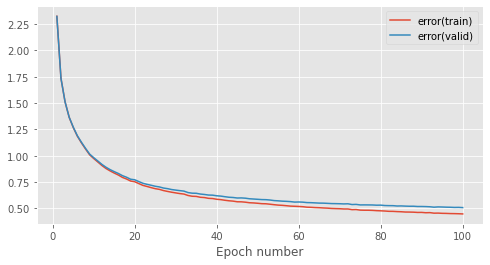

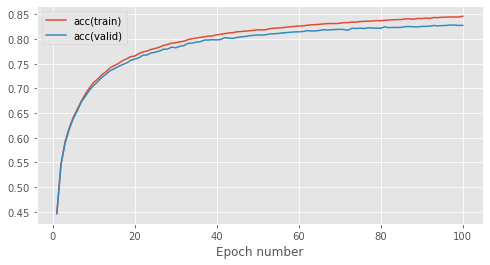

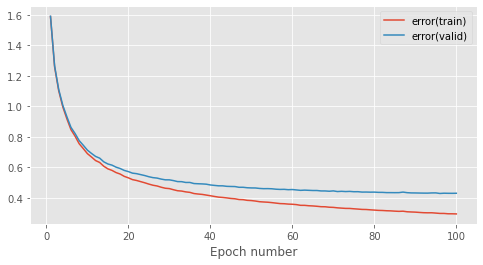

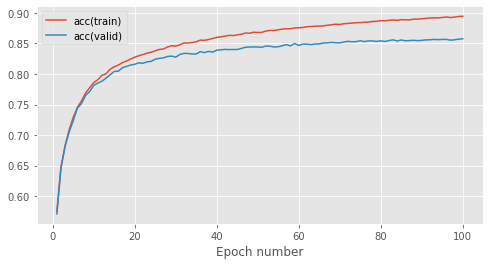

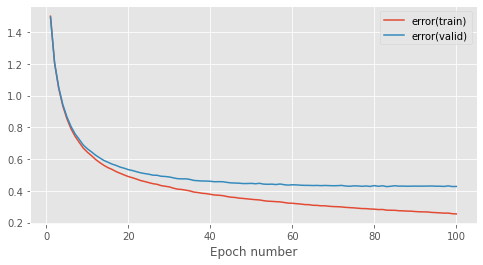

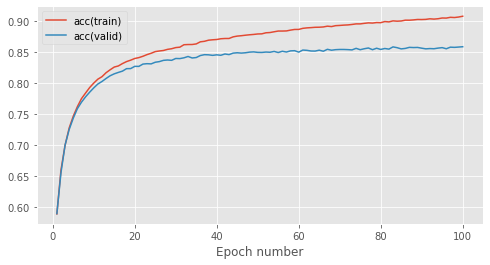

In [17]:
# This part contains coding work for section 4 Dropout 

# Three hidden layers
# adding additional dropout layers with varied incl_prop

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
incl_prob_list = [0.7, 0.9, 0.95]
stats_list_dropout = []
keys_list_dropout = []

for incl_prob in incl_prob_list:
    
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        DropoutLayer(rng = rng, incl_prob = incl_prob),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        DropoutLayer(rng = rng, incl_prob = incl_prob),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        DropoutLayer(rng = rng, incl_prob = incl_prob),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule with lr = 1e-4
    learning_rule = AdamLearningRule(learning_rate=1e-4)

    #Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
            model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

    stats_list_dropout.append(stats)
    keys_list_dropout.append(keys)


In [18]:
# Table 3 Dropout
# val. acc.
# incl_prob in the list: [0.7, 0.9, 0.95]

val_acc_dropout_1 = stats_list_dropout[0][1:, keys_list_dropout[0]['acc(valid)']][-1]
val_acc_dropout_2 = stats_list_dropout[1][1:, keys_list_dropout[1]['acc(valid)']][-1]
val_acc_dropout_3 = stats_list_dropout[2][1:, keys_list_dropout[2]['acc(valid)']][-1]


# generalization gap
generalization_gap_dropout_1 = stats_list_dropout[0][1:, keys_list_dropout[0]['error(valid)']][-1] - stats_list_dropout[0][1:, keys_list_dropout[0]['error(train)']][-1]
generalization_gap_dropout_2 = stats_list_dropout[1][1:, keys_list_dropout[1]['error(valid)']][-1] - stats_list_dropout[1][1:, keys_list_dropout[1]['error(train)']][-1]
generalization_gap_dropout_3 = stats_list_dropout[2][1:, keys_list_dropout[2]['error(valid)']][-1] - stats_list_dropout[2][1:, keys_list_dropout[2]['error(train)']][-1]

In [19]:
print('val_acc_dropout_0.7',val_acc_dropout_1)
print('val_acc_dropout_0.9',val_acc_dropout_2)
print('val_acc_dropout_0.95',val_acc_dropout_3)


print('generalization_gap_dropout_0.7',generalization_gap_dropout_1)
print('generalization_gap_dropout_0.9',generalization_gap_dropout_2)
print('generalization_gap_dropout_0.95',generalization_gap_dropout_3)

val_acc_dropout_0.7 0.8278481012658229
val_acc_dropout_0.9 0.8576582278481003
val_acc_dropout_0.95 0.8589873417721515
generalization_gap_dropout_0.7 0.060027791873059955
generalization_gap_dropout_0.9 0.13559726366742242
generalization_gap_dropout_0.95 0.17292063707136984


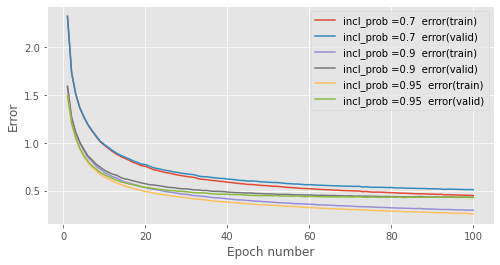

In [20]:
# Dropout error

fig_dropout_err = plt.figure(figsize=(8, 4))
ax_dropout_err = fig_dropout_err.add_subplot(111)
for i in np.arange(len(stats_list_dropout)):
    for k in ['error(train)', 'error(valid)']:
        ax_dropout_err.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                      stats_list_dropout[i][1:, keys_list_dropout[i][k]], label="incl_prob =" + str(incl_prob_list[i])  + '  '+ k) 
ax_dropout_err.legend(loc=0)
ax_dropout_err.set_xlabel('Epoch number')
ax_dropout_err.set_ylabel('Error')

plt.show()

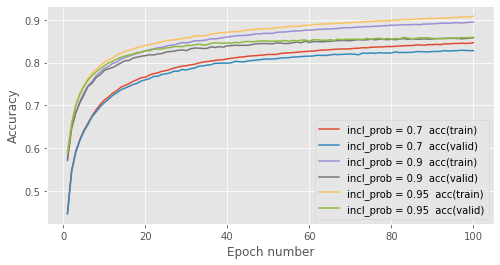

In [21]:
# Dropout acc
fig_dropout_acc = plt.figure(figsize=(8, 4))
ax_dropout_acc = fig_dropout_acc.add_subplot(111)
for i in np.arange(len(stats_list_dropout)):
    for k in ['acc(train)', 'acc(valid)']:
        ax_dropout_acc.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                      stats_list_dropout[i][1:, keys_list_dropout[i][k]], label = "incl_prob = " +  str(incl_prob_list[i]) + '  '+ k) 
ax_dropout_acc.legend(loc=0)
ax_dropout_acc.set_xlabel('Epoch number')
ax_dropout_acc.set_ylabel('Accuracy')

plt.show()

## L1 Penalty

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.6s to complete
    error(train)=1.37e+00, acc(train)=6.21e-01, error(valid)=1.38e+00, acc(valid)=6.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.5s to complete
    error(train)=1.15e+00, acc(train)=6.74e-01, error(valid)=1.16e+00, acc(valid)=6.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.5s to complete
    error(train)=1.02e+00, acc(train)=7.09e-01, error(valid)=1.03e+00, acc(valid)=7.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.6s to complete
    error(train)=9.29e-01, acc(train)=7.34e-01, error(valid)=9.40e-01, acc(valid)=7.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.6s to complete
    error(train)=8.60e-01, acc(train)=7.50e-01, error(valid)=8.76e-01, acc(valid)=7.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.6s to complete
    error(train)=8.04e-01, acc(train)=7.64e-01, error(valid)=8.21e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.6s to complete
    error(train)=7.62e-01, acc(train)=7.76e-01, error(valid)=7.81e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.6s to complete
    error(train)=7.29e-01, acc(train)=7.82e-01, error(valid)=7.50e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.6s to complete
    error(train)=7.01e-01, acc(train)=7.90e-01, error(valid)=7.25e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.6s to complete
    error(train)=6.81e-01, acc(train)=7.95e-01, error(valid)=7.06e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.7s to complete
    error(train)=6.57e-01, acc(train)=8.02e-01, error(valid)=6.79e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.7s to complete
    error(train)=6.41e-01, acc(train)=8.04e-01, error(valid)=6.66e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.7s to complete
    error(train)=6.26e-01, acc(train)=8.08e-01, error(valid)=6.56e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.7s to complete
    error(train)=6.11e-01, acc(train)=8.13e-01, error(valid)=6.42e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.2s to complete
    error(train)=5.98e-01, acc(train)=8.17e-01, error(valid)=6.29e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.6s to complete
    error(train)=5.89e-01, acc(train)=8.18e-01, error(valid)=6.20e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.7s to complete
    error(train)=5.80e-01, acc(train)=8.19e-01, error(valid)=6.13e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.7s to complete
    error(train)=5.72e-01, acc(train)=8.21e-01, error(valid)=6.07e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.7s to complete
    error(train)=5.56e-01, acc(train)=8.27e-01, error(valid)=5.91e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.7s to complete
    error(train)=5.54e-01, acc(train)=8.25e-01, error(valid)=5.91e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.6s to complete
    error(train)=5.41e-01, acc(train)=8.31e-01, error(valid)=5.79e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.7s to complete
    error(train)=5.37e-01, acc(train)=8.32e-01, error(valid)=5.75e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.7s to complete
    error(train)=5.31e-01, acc(train)=8.32e-01, error(valid)=5.68e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.6s to complete
    error(train)=5.25e-01, acc(train)=8.35e-01, error(valid)=5.65e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.6s to complete
    error(train)=5.18e-01, acc(train)=8.37e-01, error(valid)=5.58e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.6s to complete
    error(train)=5.15e-01, acc(train)=8.37e-01, error(valid)=5.56e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.7s to complete
    error(train)=5.08e-01, acc(train)=8.38e-01, error(valid)=5.51e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.7s to complete
    error(train)=5.04e-01, acc(train)=8.40e-01, error(valid)=5.48e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.7s to complete
    error(train)=4.96e-01, acc(train)=8.42e-01, error(valid)=5.40e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.7s to complete
    error(train)=4.97e-01, acc(train)=8.42e-01, error(valid)=5.42e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.7s to complete
    error(train)=4.90e-01, acc(train)=8.44e-01, error(valid)=5.35e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.7s to complete
    error(train)=4.85e-01, acc(train)=8.45e-01, error(valid)=5.33e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.6s to complete
    error(train)=4.82e-01, acc(train)=8.46e-01, error(valid)=5.30e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.7s to complete
    error(train)=4.81e-01, acc(train)=8.44e-01, error(valid)=5.29e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.7s to complete
    error(train)=4.76e-01, acc(train)=8.48e-01, error(valid)=5.24e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.7s to complete
    error(train)=4.70e-01, acc(train)=8.51e-01, error(valid)=5.19e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.6s to complete
    error(train)=4.70e-01, acc(train)=8.49e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.7s to complete
    error(train)=4.66e-01, acc(train)=8.50e-01, error(valid)=5.17e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.7s to complete
    error(train)=4.64e-01, acc(train)=8.51e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.7s to complete
    error(train)=4.58e-01, acc(train)=8.53e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.3s to complete
    error(train)=4.58e-01, acc(train)=8.52e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.6s to complete
    error(train)=4.56e-01, acc(train)=8.53e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.6s to complete
    error(train)=4.53e-01, acc(train)=8.54e-01, error(valid)=5.06e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.6s to complete
    error(train)=4.50e-01, acc(train)=8.54e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.6s to complete
    error(train)=4.52e-01, acc(train)=8.53e-01, error(valid)=5.08e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.6s to complete
    error(train)=4.45e-01, acc(train)=8.56e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.6s to complete
    error(train)=4.42e-01, acc(train)=8.58e-01, error(valid)=4.96e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.6s to complete
    error(train)=4.40e-01, acc(train)=8.58e-01, error(valid)=4.94e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.6s to complete
    error(train)=4.40e-01, acc(train)=8.57e-01, error(valid)=4.94e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.6s to complete
    error(train)=4.35e-01, acc(train)=8.58e-01, error(valid)=4.90e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.6s to complete
    error(train)=4.37e-01, acc(train)=8.56e-01, error(valid)=4.95e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.6s to complete
    error(train)=4.34e-01, acc(train)=8.59e-01, error(valid)=4.92e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.6s to complete
    error(train)=4.34e-01, acc(train)=8.58e-01, error(valid)=4.92e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.6s to complete
    error(train)=4.31e-01, acc(train)=8.59e-01, error(valid)=4.90e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.6s to complete
    error(train)=4.26e-01, acc(train)=8.62e-01, error(valid)=4.85e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.6s to complete
    error(train)=4.27e-01, acc(train)=8.60e-01, error(valid)=4.87e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.6s to complete
    error(train)=4.27e-01, acc(train)=8.60e-01, error(valid)=4.87e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.7s to complete
    error(train)=4.23e-01, acc(train)=8.62e-01, error(valid)=4.83e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.6s to complete
    error(train)=4.20e-01, acc(train)=8.62e-01, error(valid)=4.81e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.6s to complete
    error(train)=4.22e-01, acc(train)=8.62e-01, error(valid)=4.82e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.6s to complete
    error(train)=4.20e-01, acc(train)=8.63e-01, error(valid)=4.80e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.6s to complete
    error(train)=4.14e-01, acc(train)=8.64e-01, error(valid)=4.75e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.6s to complete
    error(train)=4.16e-01, acc(train)=8.63e-01, error(valid)=4.79e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.6s to complete
    error(train)=4.17e-01, acc(train)=8.63e-01, error(valid)=4.81e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.6s to complete
    error(train)=4.14e-01, acc(train)=8.64e-01, error(valid)=4.78e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.6s to complete
    error(train)=4.12e-01, acc(train)=8.65e-01, error(valid)=4.77e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.6s to complete
    error(train)=4.13e-01, acc(train)=8.64e-01, error(valid)=4.77e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.4s to complete
    error(train)=4.13e-01, acc(train)=8.64e-01, error(valid)=4.78e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.9s to complete
    error(train)=4.07e-01, acc(train)=8.66e-01, error(valid)=4.73e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.7s to complete
    error(train)=4.12e-01, acc(train)=8.64e-01, error(valid)=4.76e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.6s to complete
    error(train)=4.07e-01, acc(train)=8.66e-01, error(valid)=4.73e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.6s to complete
    error(train)=4.12e-01, acc(train)=8.64e-01, error(valid)=4.77e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.6s to complete
    error(train)=4.05e-01, acc(train)=8.66e-01, error(valid)=4.72e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.6s to complete
    error(train)=4.03e-01, acc(train)=8.67e-01, error(valid)=4.69e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.7s to complete
    error(train)=4.01e-01, acc(train)=8.67e-01, error(valid)=4.67e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.6s to complete
    error(train)=3.99e-01, acc(train)=8.67e-01, error(valid)=4.68e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.7s to complete
    error(train)=3.96e-01, acc(train)=8.69e-01, error(valid)=4.64e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.7s to complete
    error(train)=3.96e-01, acc(train)=8.69e-01, error(valid)=4.65e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.7s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=4.65e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.7s to complete
    error(train)=4.00e-01, acc(train)=8.68e-01, error(valid)=4.68e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.7s to complete
    error(train)=3.95e-01, acc(train)=8.68e-01, error(valid)=4.66e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.7s to complete
    error(train)=3.95e-01, acc(train)=8.68e-01, error(valid)=4.65e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.7s to complete
    error(train)=3.93e-01, acc(train)=8.68e-01, error(valid)=4.63e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.6s to complete
    error(train)=3.98e-01, acc(train)=8.67e-01, error(valid)=4.68e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.7s to complete
    error(train)=3.92e-01, acc(train)=8.69e-01, error(valid)=4.63e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.7s to complete
    error(train)=3.91e-01, acc(train)=8.70e-01, error(valid)=4.64e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.7s to complete
    error(train)=3.86e-01, acc(train)=8.72e-01, error(valid)=4.58e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.6s to complete
    error(train)=3.90e-01, acc(train)=8.72e-01, error(valid)=4.62e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.6s to complete
    error(train)=3.88e-01, acc(train)=8.71e-01, error(valid)=4.61e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 3.6s to complete
    error(train)=3.86e-01, acc(train)=8.71e-01, error(valid)=4.59e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.7s to complete
    error(train)=3.85e-01, acc(train)=8.72e-01, error(valid)=4.58e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.7s to complete
    error(train)=3.92e-01, acc(train)=8.70e-01, error(valid)=4.64e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.7s to complete
    error(train)=3.86e-01, acc(train)=8.71e-01, error(valid)=4.59e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.7s to complete
    error(train)=3.86e-01, acc(train)=8.72e-01, error(valid)=4.59e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.8s to complete
    error(train)=3.80e-01, acc(train)=8.73e-01, error(valid)=4.55e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.6s to complete
    error(train)=3.81e-01, acc(train)=8.73e-01, error(valid)=4.57e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.6s to complete
    error(train)=3.84e-01, acc(train)=8.71e-01, error(valid)=4.59e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.7s to complete
    error(train)=3.79e-01, acc(train)=8.73e-01, error(valid)=4.53e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.7s to complete
    error(train)=3.85e-01, acc(train)=8.72e-01, error(valid)=4.59e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.8s to complete
    error(train)=3.82e-01, acc(train)=8.72e-01, error(valid)=4.59e-01, acc(valid)=8.46e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.6s to complete
    error(train)=1.69e+00, acc(train)=5.50e-01, error(valid)=1.69e+00, acc(valid)=5.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.5s to complete
    error(train)=1.54e+00, acc(train)=5.91e-01, error(valid)=1.54e+00, acc(valid)=5.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.5s to complete
    error(train)=1.47e+00, acc(train)=6.07e-01, error(valid)=1.48e+00, acc(valid)=6.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.5s to complete
    error(train)=1.43e+00, acc(train)=6.14e-01, error(valid)=1.44e+00, acc(valid)=6.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.6s to complete
    error(train)=1.39e+00, acc(train)=6.24e-01, error(valid)=1.40e+00, acc(valid)=6.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.7s to complete
    error(train)=1.37e+00, acc(train)=6.28e-01, error(valid)=1.37e+00, acc(valid)=6.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.6s to complete
    error(train)=1.34e+00, acc(train)=6.38e-01, error(valid)=1.34e+00, acc(valid)=6.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.6s to complete
    error(train)=1.32e+00, acc(train)=6.42e-01, error(valid)=1.32e+00, acc(valid)=6.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.7s to complete
    error(train)=1.29e+00, acc(train)=6.48e-01, error(valid)=1.29e+00, acc(valid)=6.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.7s to complete
    error(train)=1.27e+00, acc(train)=6.51e-01, error(valid)=1.28e+00, acc(valid)=6.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.6s to complete
    error(train)=1.26e+00, acc(train)=6.54e-01, error(valid)=1.26e+00, acc(valid)=6.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.7s to complete
    error(train)=1.23e+00, acc(train)=6.60e-01, error(valid)=1.24e+00, acc(valid)=6.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.6s to complete
    error(train)=1.22e+00, acc(train)=6.64e-01, error(valid)=1.22e+00, acc(valid)=6.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.7s to complete
    error(train)=1.21e+00, acc(train)=6.65e-01, error(valid)=1.21e+00, acc(valid)=6.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.7s to complete
    error(train)=1.19e+00, acc(train)=6.72e-01, error(valid)=1.19e+00, acc(valid)=6.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.7s to complete
    error(train)=1.17e+00, acc(train)=6.74e-01, error(valid)=1.18e+00, acc(valid)=6.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.7s to complete
    error(train)=1.17e+00, acc(train)=6.75e-01, error(valid)=1.17e+00, acc(valid)=6.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.7s to complete
    error(train)=1.15e+00, acc(train)=6.79e-01, error(valid)=1.15e+00, acc(valid)=6.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.7s to complete
    error(train)=1.14e+00, acc(train)=6.82e-01, error(valid)=1.14e+00, acc(valid)=6.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.7s to complete
    error(train)=1.13e+00, acc(train)=6.83e-01, error(valid)=1.13e+00, acc(valid)=6.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.7s to complete
    error(train)=1.12e+00, acc(train)=6.88e-01, error(valid)=1.12e+00, acc(valid)=6.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 4.6s to complete
    error(train)=1.11e+00, acc(train)=6.89e-01, error(valid)=1.11e+00, acc(valid)=6.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.7s to complete
    error(train)=1.10e+00, acc(train)=6.90e-01, error(valid)=1.11e+00, acc(valid)=6.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.7s to complete
    error(train)=1.09e+00, acc(train)=6.94e-01, error(valid)=1.09e+00, acc(valid)=6.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.7s to complete
    error(train)=1.08e+00, acc(train)=6.95e-01, error(valid)=1.08e+00, acc(valid)=6.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.7s to complete
    error(train)=1.07e+00, acc(train)=6.99e-01, error(valid)=1.08e+00, acc(valid)=6.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.8s to complete
    error(train)=1.06e+00, acc(train)=6.99e-01, error(valid)=1.07e+00, acc(valid)=6.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.8s to complete
    error(train)=1.06e+00, acc(train)=6.99e-01, error(valid)=1.07e+00, acc(valid)=6.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.8s to complete
    error(train)=1.05e+00, acc(train)=7.03e-01, error(valid)=1.06e+00, acc(valid)=6.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.8s to complete
    error(train)=1.04e+00, acc(train)=7.05e-01, error(valid)=1.05e+00, acc(valid)=7.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.7s to complete
    error(train)=1.04e+00, acc(train)=7.05e-01, error(valid)=1.04e+00, acc(valid)=7.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.7s to complete
    error(train)=1.03e+00, acc(train)=7.09e-01, error(valid)=1.03e+00, acc(valid)=7.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.8s to complete
    error(train)=1.03e+00, acc(train)=7.08e-01, error(valid)=1.03e+00, acc(valid)=7.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.8s to complete
    error(train)=1.02e+00, acc(train)=7.08e-01, error(valid)=1.03e+00, acc(valid)=7.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.8s to complete
    error(train)=1.02e+00, acc(train)=7.10e-01, error(valid)=1.02e+00, acc(valid)=7.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.7s to complete
    error(train)=1.01e+00, acc(train)=7.12e-01, error(valid)=1.02e+00, acc(valid)=7.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.7s to complete
    error(train)=1.00e+00, acc(train)=7.13e-01, error(valid)=1.01e+00, acc(valid)=7.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.7s to complete
    error(train)=1.00e+00, acc(train)=7.13e-01, error(valid)=1.01e+00, acc(valid)=7.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.8s to complete
    error(train)=9.95e-01, acc(train)=7.14e-01, error(valid)=1.00e+00, acc(valid)=7.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.8s to complete
    error(train)=9.88e-01, acc(train)=7.18e-01, error(valid)=9.96e-01, acc(valid)=7.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.8s to complete
    error(train)=9.87e-01, acc(train)=7.16e-01, error(valid)=9.95e-01, acc(valid)=7.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.7s to complete
    error(train)=9.81e-01, acc(train)=7.18e-01, error(valid)=9.90e-01, acc(valid)=7.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.7s to complete
    error(train)=9.77e-01, acc(train)=7.20e-01, error(valid)=9.86e-01, acc(valid)=7.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.8s to complete
    error(train)=9.73e-01, acc(train)=7.22e-01, error(valid)=9.82e-01, acc(valid)=7.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.7s to complete
    error(train)=9.69e-01, acc(train)=7.22e-01, error(valid)=9.77e-01, acc(valid)=7.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.8s to complete
    error(train)=9.66e-01, acc(train)=7.22e-01, error(valid)=9.76e-01, acc(valid)=7.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.8s to complete
    error(train)=9.63e-01, acc(train)=7.23e-01, error(valid)=9.72e-01, acc(valid)=7.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 5.1s to complete
    error(train)=9.61e-01, acc(train)=7.24e-01, error(valid)=9.71e-01, acc(valid)=7.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.7s to complete
    error(train)=9.58e-01, acc(train)=7.24e-01, error(valid)=9.69e-01, acc(valid)=7.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.7s to complete
    error(train)=9.54e-01, acc(train)=7.25e-01, error(valid)=9.66e-01, acc(valid)=7.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.7s to complete
    error(train)=9.50e-01, acc(train)=7.26e-01, error(valid)=9.60e-01, acc(valid)=7.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.7s to complete
    error(train)=9.47e-01, acc(train)=7.27e-01, error(valid)=9.58e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.8s to complete
    error(train)=9.42e-01, acc(train)=7.27e-01, error(valid)=9.52e-01, acc(valid)=7.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.7s to complete
    error(train)=9.40e-01, acc(train)=7.28e-01, error(valid)=9.51e-01, acc(valid)=7.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.8s to complete
    error(train)=9.37e-01, acc(train)=7.30e-01, error(valid)=9.48e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.7s to complete
    error(train)=9.36e-01, acc(train)=7.29e-01, error(valid)=9.47e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.7s to complete
    error(train)=9.32e-01, acc(train)=7.30e-01, error(valid)=9.42e-01, acc(valid)=7.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.8s to complete
    error(train)=9.28e-01, acc(train)=7.32e-01, error(valid)=9.39e-01, acc(valid)=7.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.7s to complete
    error(train)=9.29e-01, acc(train)=7.31e-01, error(valid)=9.39e-01, acc(valid)=7.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.7s to complete
    error(train)=9.25e-01, acc(train)=7.32e-01, error(valid)=9.36e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.8s to complete
    error(train)=9.24e-01, acc(train)=7.31e-01, error(valid)=9.35e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.8s to complete
    error(train)=9.21e-01, acc(train)=7.33e-01, error(valid)=9.32e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.8s to complete
    error(train)=9.20e-01, acc(train)=7.34e-01, error(valid)=9.30e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.8s to complete
    error(train)=9.16e-01, acc(train)=7.35e-01, error(valid)=9.27e-01, acc(valid)=7.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.8s to complete
    error(train)=9.13e-01, acc(train)=7.34e-01, error(valid)=9.24e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.8s to complete
    error(train)=9.12e-01, acc(train)=7.35e-01, error(valid)=9.23e-01, acc(valid)=7.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.8s to complete
    error(train)=9.08e-01, acc(train)=7.37e-01, error(valid)=9.19e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.8s to complete
    error(train)=9.07e-01, acc(train)=7.36e-01, error(valid)=9.18e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.7s to complete
    error(train)=9.05e-01, acc(train)=7.38e-01, error(valid)=9.16e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.8s to complete
    error(train)=9.02e-01, acc(train)=7.38e-01, error(valid)=9.12e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.8s to complete
    error(train)=9.01e-01, acc(train)=7.37e-01, error(valid)=9.12e-01, acc(valid)=7.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.8s to complete
    error(train)=9.00e-01, acc(train)=7.37e-01, error(valid)=9.12e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.8s to complete
    error(train)=8.97e-01, acc(train)=7.38e-01, error(valid)=9.08e-01, acc(valid)=7.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 5.0s to complete
    error(train)=8.97e-01, acc(train)=7.39e-01, error(valid)=9.08e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.8s to complete
    error(train)=8.94e-01, acc(train)=7.39e-01, error(valid)=9.06e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.8s to complete
    error(train)=8.96e-01, acc(train)=7.40e-01, error(valid)=9.06e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.8s to complete
    error(train)=8.89e-01, acc(train)=7.41e-01, error(valid)=8.99e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.8s to complete
    error(train)=8.89e-01, acc(train)=7.41e-01, error(valid)=9.00e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.8s to complete
    error(train)=8.88e-01, acc(train)=7.42e-01, error(valid)=8.99e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.9s to complete
    error(train)=8.84e-01, acc(train)=7.42e-01, error(valid)=8.96e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.8s to complete
    error(train)=8.86e-01, acc(train)=7.42e-01, error(valid)=8.96e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.8s to complete
    error(train)=8.84e-01, acc(train)=7.41e-01, error(valid)=8.95e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.8s to complete
    error(train)=8.81e-01, acc(train)=7.43e-01, error(valid)=8.91e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.8s to complete
    error(train)=8.80e-01, acc(train)=7.42e-01, error(valid)=8.91e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.8s to complete
    error(train)=8.77e-01, acc(train)=7.43e-01, error(valid)=8.88e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.8s to complete
    error(train)=8.76e-01, acc(train)=7.42e-01, error(valid)=8.87e-01, acc(valid)=7.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.9s to complete
    error(train)=8.75e-01, acc(train)=7.44e-01, error(valid)=8.86e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.8s to complete
    error(train)=8.73e-01, acc(train)=7.44e-01, error(valid)=8.83e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.8s to complete
    error(train)=8.71e-01, acc(train)=7.45e-01, error(valid)=8.81e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 3.8s to complete
    error(train)=8.70e-01, acc(train)=7.45e-01, error(valid)=8.80e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.8s to complete
    error(train)=8.68e-01, acc(train)=7.45e-01, error(valid)=8.79e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.7s to complete
    error(train)=8.67e-01, acc(train)=7.45e-01, error(valid)=8.78e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.8s to complete
    error(train)=8.66e-01, acc(train)=7.47e-01, error(valid)=8.76e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.8s to complete
    error(train)=8.68e-01, acc(train)=7.45e-01, error(valid)=8.78e-01, acc(valid)=7.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.8s to complete
    error(train)=8.63e-01, acc(train)=7.46e-01, error(valid)=8.73e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.8s to complete
    error(train)=8.65e-01, acc(train)=7.47e-01, error(valid)=8.74e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.8s to complete
    error(train)=8.64e-01, acc(train)=7.45e-01, error(valid)=8.75e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.7s to complete
    error(train)=8.61e-01, acc(train)=7.47e-01, error(valid)=8.71e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.8s to complete
    error(train)=8.60e-01, acc(train)=7.46e-01, error(valid)=8.70e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 5.1s to complete
    error(train)=8.58e-01, acc(train)=7.46e-01, error(valid)=8.69e-01, acc(valid)=7.44e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.8s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=1.99e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.89e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.6s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.08e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.6s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.6s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.6s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.10e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.89e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.6s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.07e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.10e-02, error(valid)=3.85e+00, acc(valid)=2.26e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.08e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.6s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.6s to complete
    error(train)=3.85e+00, acc(train)=2.08e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.6s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 5.0s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.13e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.6s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=1.99e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.6s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.10e-02, error(valid)=3.85e+00, acc(valid)=2.26e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.10e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.39e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=1.99e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.6s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.07e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.6s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.08e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.88e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.08e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.03e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.10e-02, error(valid)=3.85e+00, acc(valid)=2.26e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.07e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.9s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.39e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.13e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.88e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.09e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.13e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.88e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.8s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.6s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.03e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.6s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=1.99e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.9s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.88e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 5.0s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.6s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.13e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.08e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.03e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.08e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.10e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.39e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.9s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=1.99e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.8s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.10e-02


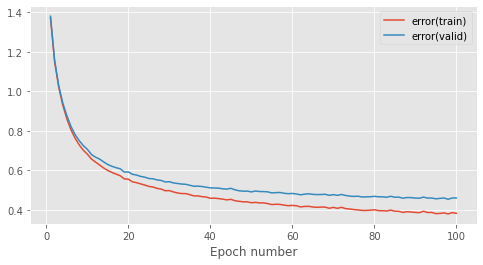

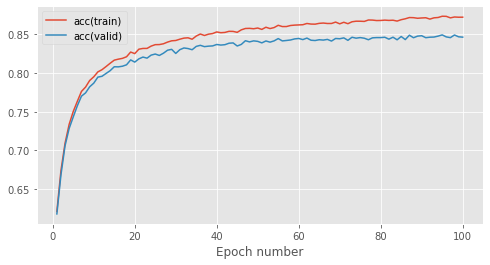

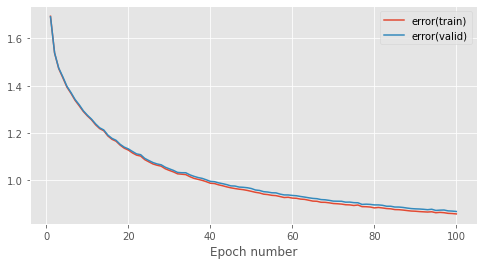

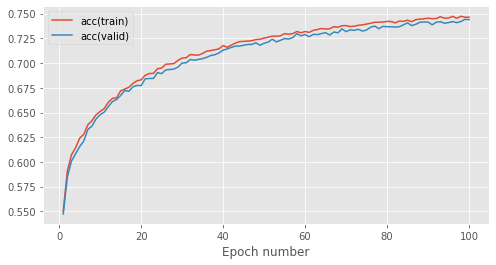

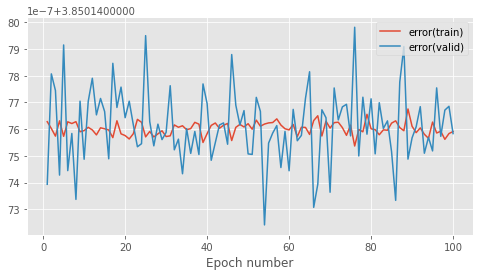

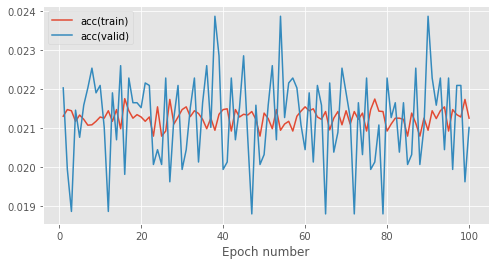

In [22]:
# This part contains coding work for section 4 L1 penalty

# Three hidden layers

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty, L2Penalty

#setup hyperparameters
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
stats_list_l1 = []
keys_list_l1 = []

l1_para_list = [10**(-4),10**(-3),10**(-1)]
for l1_para in l1_para_list:
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty = L1Penalty(l1_para), biases_penalty = L1Penalty(l1_para)), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L1Penalty(l1_para), biases_penalty = L1Penalty(l1_para)), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L1Penalty(l1_para), biases_penalty = L1Penalty(l1_para)), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty = L1Penalty(l1_para), biases_penalty = L1Penalty(l1_para))
    ])

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = AdamLearningRule(learning_rate=1e-4)

    # Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
            model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    stats_list_l1.append(stats)
    keys_list_l1.append(keys)




In [23]:
# Table 3 L1 Penalty
# val. acc.
# l1 penalty weight from list [10**(-5),10**(-4),10**(-3),10**(-2),10**(-1)]

val_acc_l1_1 = stats_list_l1[0][1:, keys_list_l1[0]['acc(valid)']][-1]
val_acc_l1_2 = stats_list_l1[1][1:, keys_list_l1[1]['acc(valid)']][-1]
val_acc_l1_3 = stats_list_l1[2][1:, keys_list_l1[2]['acc(valid)']][-1]


# generalization gap
generalization_gap_l1_1 = stats_list_l1[0][1:, keys_list_l1[0]['error(valid)']][-1] - stats_list_l1[0][1:, keys_list_l1[0]['error(train)']][-1]
generalization_gap_l1_2 = stats_list_l1[1][1:, keys_list_l1[1]['error(valid)']][-1] - stats_list_l1[1][1:, keys_list_l1[1]['error(train)']][-1]
generalization_gap_l1_3 = stats_list_l1[2][1:, keys_list_l1[2]['error(valid)']][-1] - stats_list_l1[2][1:, keys_list_l1[2]['error(train)']][-1]


In [24]:
print('val_acc_l1_1e-4',val_acc_l1_1)
print('val_acc_l1_1e-3',val_acc_l1_2)
print('val_acc_l1_1e-1',val_acc_l1_3)


print('generalization_gap_l1_1e-4',generalization_gap_l1_1)
print('generalization_gap_l1_1e-3',generalization_gap_l1_2)
print('generalization_gap_l1_1e-1',generalization_gap_l1_3)


val_acc_l1_1e-4 0.8464556962025319
val_acc_l1_1e-3 0.7439873417721518
val_acc_l1_1e-1 0.02101265822784807
generalization_gap_l1_1e-4 0.07767345815226206
generalization_gap_l1_1e-3 0.01030039431892793
generalization_gap_l1_1e-1 -7.740297292002651e-09


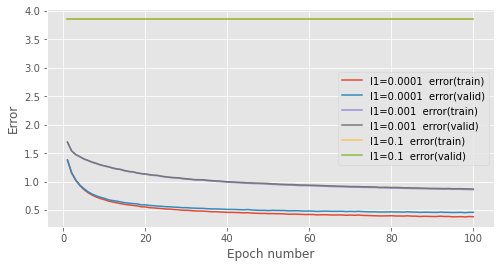

In [25]:
# L1Penalty error
fig_l1_err = plt.figure(figsize=(8, 4))
ax_l1_err = fig_l1_err.add_subplot(111)
for i in np.arange(len(stats_list_l1)):
    for k in ['error(train)', 'error(valid)']:
        ax_l1_err.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                      stats_list_l1[i][1:, keys_list_l1[i][k]], label="l1=" + str(l1_para_list[i])  + '  '+ k) 
ax_l1_err.legend(loc=0)
ax_l1_err.set_xlabel('Epoch number')
ax_l1_err.set_ylabel('Error')

plt.show()

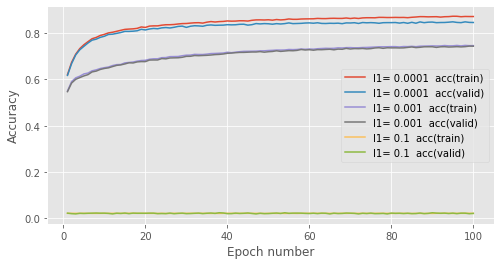

In [26]:
# L1Penalty acc
fig_l1_acc = plt.figure(figsize=(8, 4))
ax_l1_acc = fig_l1_acc.add_subplot(111)
for i in np.arange(len(stats_list_l1)):
    for k in ['acc(train)', 'acc(valid)']:
        ax_l1_acc.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                      stats_list_l1[i][1:, keys_list_l1[i][k]], label="l1= " + str(l1_para_list[i]) + '  '+ k) 
ax_l1_acc.legend(loc=0)
ax_l1_acc.set_xlabel('Epoch number')
ax_l1_acc.set_ylabel('Accuracy')

plt.show()

## L2 Penalty

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.1s to complete
    error(train)=1.34e+00, acc(train)=6.29e-01, error(valid)=1.35e+00, acc(valid)=6.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.0s to complete
    error(train)=1.11e+00, acc(train)=6.86e-01, error(valid)=1.12e+00, acc(valid)=6.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.0s to complete
    error(train)=9.68e-01, acc(train)=7.21e-01, error(valid)=9.86e-01, acc(valid)=7.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.0s to complete
    error(train)=8.73e-01, acc(train)=7.45e-01, error(valid)=8.94e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.0s to complete
    error(train)=8.14e-01, acc(train)=7.60e-01, error(valid)=8.39e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.1s to complete
    error(train)=7.56e-01, acc(train)=7.74e-01, error(valid)=7.83e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 4.4s to complete
    error(train)=7.19e-01, acc(train)=7.83e-01, error(valid)=7.49e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.1s to complete
    error(train)=6.87e-01, acc(train)=7.91e-01, error(valid)=7.19e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.1s to complete
    error(train)=6.58e-01, acc(train)=7.99e-01, error(valid)=6.94e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.1s to complete
    error(train)=6.32e-01, acc(train)=8.06e-01, error(valid)=6.69e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.2s to complete
    error(train)=6.14e-01, acc(train)=8.10e-01, error(valid)=6.54e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.1s to complete
    error(train)=5.95e-01, acc(train)=8.16e-01, error(valid)=6.38e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.1s to complete
    error(train)=5.82e-01, acc(train)=8.17e-01, error(valid)=6.27e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.3s to complete
    error(train)=5.62e-01, acc(train)=8.25e-01, error(valid)=6.09e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 6.1s to complete
    error(train)=5.54e-01, acc(train)=8.24e-01, error(valid)=6.05e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 7.5s to complete
    error(train)=5.43e-01, acc(train)=8.29e-01, error(valid)=5.95e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 9.1s to complete
    error(train)=5.34e-01, acc(train)=8.30e-01, error(valid)=5.92e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 10.6s to complete
    error(train)=5.17e-01, acc(train)=8.36e-01, error(valid)=5.75e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 10.9s to complete
    error(train)=5.08e-01, acc(train)=8.38e-01, error(valid)=5.70e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 11.0s to complete
    error(train)=4.96e-01, acc(train)=8.41e-01, error(valid)=5.60e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 11.0s to complete
    error(train)=4.91e-01, acc(train)=8.42e-01, error(valid)=5.59e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 11.0s to complete
    error(train)=4.84e-01, acc(train)=8.45e-01, error(valid)=5.55e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 12.2s to complete
    error(train)=4.75e-01, acc(train)=8.47e-01, error(valid)=5.47e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 11.0s to complete
    error(train)=4.67e-01, acc(train)=8.49e-01, error(valid)=5.43e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 11.0s to complete
    error(train)=4.62e-01, acc(train)=8.50e-01, error(valid)=5.40e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 11.1s to complete
    error(train)=4.54e-01, acc(train)=8.54e-01, error(valid)=5.37e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 11.0s to complete
    error(train)=4.45e-01, acc(train)=8.55e-01, error(valid)=5.28e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 11.0s to complete
    error(train)=4.40e-01, acc(train)=8.57e-01, error(valid)=5.26e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 11.0s to complete
    error(train)=4.35e-01, acc(train)=8.58e-01, error(valid)=5.22e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 10.9s to complete
    error(train)=4.28e-01, acc(train)=8.61e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 11.0s to complete
    error(train)=4.28e-01, acc(train)=8.59e-01, error(valid)=5.22e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 10.9s to complete
    error(train)=4.18e-01, acc(train)=8.63e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 12.1s to complete
    error(train)=4.15e-01, acc(train)=8.64e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 10.8s to complete
    error(train)=4.08e-01, acc(train)=8.66e-01, error(valid)=5.06e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 11.1s to complete
    error(train)=4.05e-01, acc(train)=8.67e-01, error(valid)=5.08e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 10.8s to complete
    error(train)=4.04e-01, acc(train)=8.66e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 10.9s to complete
    error(train)=4.05e-01, acc(train)=8.64e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 11.0s to complete
    error(train)=3.96e-01, acc(train)=8.68e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 10.8s to complete
    error(train)=3.91e-01, acc(train)=8.71e-01, error(valid)=4.99e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 10.7s to complete
    error(train)=3.89e-01, acc(train)=8.69e-01, error(valid)=5.00e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 10.8s to complete
    error(train)=3.86e-01, acc(train)=8.70e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 10.8s to complete
    error(train)=3.78e-01, acc(train)=8.74e-01, error(valid)=4.97e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 12.0s to complete
    error(train)=3.76e-01, acc(train)=8.72e-01, error(valid)=4.95e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 11.0s to complete
    error(train)=3.72e-01, acc(train)=8.76e-01, error(valid)=4.92e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 10.9s to complete
    error(train)=3.70e-01, acc(train)=8.75e-01, error(valid)=4.93e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 11.0s to complete
    error(train)=3.69e-01, acc(train)=8.76e-01, error(valid)=4.94e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 10.8s to complete
    error(train)=3.63e-01, acc(train)=8.79e-01, error(valid)=4.91e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 10.9s to complete
    error(train)=3.61e-01, acc(train)=8.78e-01, error(valid)=4.90e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 10.9s to complete
    error(train)=3.56e-01, acc(train)=8.80e-01, error(valid)=4.87e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 10.8s to complete
    error(train)=3.55e-01, acc(train)=8.80e-01, error(valid)=4.89e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 10.9s to complete
    error(train)=3.48e-01, acc(train)=8.82e-01, error(valid)=4.83e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 10.7s to complete
    error(train)=3.46e-01, acc(train)=8.84e-01, error(valid)=4.84e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 11.5s to complete
    error(train)=3.44e-01, acc(train)=8.85e-01, error(valid)=4.83e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 11.0s to complete
    error(train)=3.46e-01, acc(train)=8.81e-01, error(valid)=4.87e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 11.1s to complete
    error(train)=3.40e-01, acc(train)=8.86e-01, error(valid)=4.84e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 11.2s to complete
    error(train)=3.42e-01, acc(train)=8.84e-01, error(valid)=4.90e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 11.9s to complete
    error(train)=3.40e-01, acc(train)=8.84e-01, error(valid)=4.89e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 11.2s to complete
    error(train)=3.33e-01, acc(train)=8.86e-01, error(valid)=4.81e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 11.4s to complete
    error(train)=3.33e-01, acc(train)=8.87e-01, error(valid)=4.86e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 11.8s to complete
    error(train)=3.26e-01, acc(train)=8.90e-01, error(valid)=4.82e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 11.6s to complete
    error(train)=3.26e-01, acc(train)=8.89e-01, error(valid)=4.84e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 11.4s to complete
    error(train)=3.22e-01, acc(train)=8.92e-01, error(valid)=4.80e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 12.8s to complete
    error(train)=3.19e-01, acc(train)=8.91e-01, error(valid)=4.82e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 11.8s to complete
    error(train)=3.17e-01, acc(train)=8.92e-01, error(valid)=4.81e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 11.7s to complete
    error(train)=3.20e-01, acc(train)=8.90e-01, error(valid)=4.84e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 11.6s to complete
    error(train)=3.15e-01, acc(train)=8.92e-01, error(valid)=4.84e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 11.5s to complete
    error(train)=3.13e-01, acc(train)=8.94e-01, error(valid)=4.82e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 12.2s to complete
    error(train)=3.14e-01, acc(train)=8.92e-01, error(valid)=4.84e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 11.1s to complete
    error(train)=3.07e-01, acc(train)=8.95e-01, error(valid)=4.83e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 11.7s to complete
    error(train)=3.08e-01, acc(train)=8.95e-01, error(valid)=4.87e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 11.7s to complete
    error(train)=3.07e-01, acc(train)=8.93e-01, error(valid)=4.87e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 11.0s to complete
    error(train)=3.00e-01, acc(train)=8.98e-01, error(valid)=4.81e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 12.5s to complete
    error(train)=2.98e-01, acc(train)=8.99e-01, error(valid)=4.81e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 11.0s to complete
    error(train)=3.00e-01, acc(train)=8.97e-01, error(valid)=4.86e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 11.7s to complete
    error(train)=2.95e-01, acc(train)=8.98e-01, error(valid)=4.81e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 10.9s to complete
    error(train)=2.98e-01, acc(train)=8.96e-01, error(valid)=4.91e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 11.0s to complete
    error(train)=2.95e-01, acc(train)=8.98e-01, error(valid)=4.87e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 10.9s to complete
    error(train)=2.91e-01, acc(train)=9.00e-01, error(valid)=4.83e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 10.8s to complete
    error(train)=2.87e-01, acc(train)=9.02e-01, error(valid)=4.83e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 10.9s to complete
    error(train)=2.86e-01, acc(train)=9.01e-01, error(valid)=4.86e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 11.0s to complete
    error(train)=2.84e-01, acc(train)=9.04e-01, error(valid)=4.85e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 10.9s to complete
    error(train)=2.83e-01, acc(train)=9.03e-01, error(valid)=4.84e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 12.3s to complete
    error(train)=2.87e-01, acc(train)=9.01e-01, error(valid)=4.93e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 10.9s to complete
    error(train)=2.86e-01, acc(train)=9.01e-01, error(valid)=4.92e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 11.0s to complete
    error(train)=2.78e-01, acc(train)=9.03e-01, error(valid)=4.87e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 10.9s to complete
    error(train)=2.77e-01, acc(train)=9.04e-01, error(valid)=4.91e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 10.9s to complete
    error(train)=2.81e-01, acc(train)=9.02e-01, error(valid)=4.99e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 11.0s to complete
    error(train)=2.72e-01, acc(train)=9.07e-01, error(valid)=4.87e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 13.0s to complete
    error(train)=2.79e-01, acc(train)=9.02e-01, error(valid)=4.97e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 10.8s to complete
    error(train)=2.74e-01, acc(train)=9.05e-01, error(valid)=4.92e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 11.7s to complete
    error(train)=2.68e-01, acc(train)=9.08e-01, error(valid)=4.89e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 11.6s to complete
    error(train)=2.70e-01, acc(train)=9.08e-01, error(valid)=4.94e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 12.1s to complete
    error(train)=2.68e-01, acc(train)=9.07e-01, error(valid)=4.95e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 11.5s to complete
    error(train)=2.69e-01, acc(train)=9.05e-01, error(valid)=4.99e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 11.5s to complete
    error(train)=2.63e-01, acc(train)=9.10e-01, error(valid)=4.93e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 11.4s to complete
    error(train)=2.61e-01, acc(train)=9.09e-01, error(valid)=4.94e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 11.4s to complete
    error(train)=2.58e-01, acc(train)=9.11e-01, error(valid)=4.95e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 11.4s to complete
    error(train)=2.61e-01, acc(train)=9.10e-01, error(valid)=4.97e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 10.7s to complete
    error(train)=2.58e-01, acc(train)=9.10e-01, error(valid)=4.97e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 10.6s to complete
    error(train)=2.54e-01, acc(train)=9.11e-01, error(valid)=4.95e-01, acc(valid)=8.46e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.4s to complete
    error(train)=1.33e+00, acc(train)=6.30e-01, error(valid)=1.33e+00, acc(valid)=6.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.2s to complete
    error(train)=1.10e+00, acc(train)=6.88e-01, error(valid)=1.11e+00, acc(valid)=6.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.1s to complete
    error(train)=9.79e-01, acc(train)=7.18e-01, error(valid)=9.90e-01, acc(valid)=7.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.1s to complete
    error(train)=8.90e-01, acc(train)=7.41e-01, error(valid)=9.05e-01, acc(valid)=7.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.2s to complete
    error(train)=8.28e-01, acc(train)=7.55e-01, error(valid)=8.44e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 4.6s to complete
    error(train)=7.71e-01, acc(train)=7.73e-01, error(valid)=7.89e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.3s to complete
    error(train)=7.32e-01, acc(train)=7.81e-01, error(valid)=7.55e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.3s to complete
    error(train)=7.01e-01, acc(train)=7.89e-01, error(valid)=7.25e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.3s to complete
    error(train)=6.75e-01, acc(train)=7.97e-01, error(valid)=6.99e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.3s to complete
    error(train)=6.48e-01, acc(train)=8.04e-01, error(valid)=6.77e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.3s to complete
    error(train)=6.35e-01, acc(train)=8.03e-01, error(valid)=6.64e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.2s to complete
    error(train)=6.09e-01, acc(train)=8.14e-01, error(valid)=6.38e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.2s to complete
    error(train)=6.03e-01, acc(train)=8.13e-01, error(valid)=6.35e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.9s to complete
    error(train)=5.83e-01, acc(train)=8.20e-01, error(valid)=6.17e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 6.6s to complete
    error(train)=5.72e-01, acc(train)=8.21e-01, error(valid)=6.07e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 8.0s to complete
    error(train)=5.59e-01, acc(train)=8.26e-01, error(valid)=5.97e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 9.8s to complete
    error(train)=5.51e-01, acc(train)=8.28e-01, error(valid)=5.90e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 11.4s to complete
    error(train)=5.39e-01, acc(train)=8.31e-01, error(valid)=5.80e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 11.7s to complete
    error(train)=5.29e-01, acc(train)=8.34e-01, error(valid)=5.71e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 11.6s to complete
    error(train)=5.27e-01, acc(train)=8.34e-01, error(valid)=5.71e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 11.6s to complete
    error(train)=5.14e-01, acc(train)=8.38e-01, error(valid)=5.58e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 12.8s to complete
    error(train)=5.06e-01, acc(train)=8.40e-01, error(valid)=5.52e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 11.7s to complete
    error(train)=5.05e-01, acc(train)=8.38e-01, error(valid)=5.50e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 11.7s to complete
    error(train)=4.93e-01, acc(train)=8.43e-01, error(valid)=5.39e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 11.7s to complete
    error(train)=4.87e-01, acc(train)=8.45e-01, error(valid)=5.36e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 11.6s to complete
    error(train)=4.78e-01, acc(train)=8.47e-01, error(valid)=5.27e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 11.7s to complete
    error(train)=4.77e-01, acc(train)=8.47e-01, error(valid)=5.27e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 11.8s to complete
    error(train)=4.72e-01, acc(train)=8.48e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 12.4s to complete
    error(train)=4.66e-01, acc(train)=8.51e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 11.0s to complete
    error(train)=4.62e-01, acc(train)=8.51e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 11.4s to complete
    error(train)=4.64e-01, acc(train)=8.51e-01, error(valid)=5.17e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 11.0s to complete
    error(train)=4.52e-01, acc(train)=8.55e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 10.9s to complete
    error(train)=4.55e-01, acc(train)=8.53e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 10.8s to complete
    error(train)=4.46e-01, acc(train)=8.56e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 10.8s to complete
    error(train)=4.48e-01, acc(train)=8.52e-01, error(valid)=5.06e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 10.8s to complete
    error(train)=4.43e-01, acc(train)=8.56e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 10.9s to complete
    error(train)=4.39e-01, acc(train)=8.57e-01, error(valid)=5.00e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 10.9s to complete
    error(train)=4.31e-01, acc(train)=8.61e-01, error(valid)=4.92e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 10.8s to complete
    error(train)=4.30e-01, acc(train)=8.61e-01, error(valid)=4.91e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 10.8s to complete
    error(train)=4.27e-01, acc(train)=8.61e-01, error(valid)=4.87e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 10.8s to complete
    error(train)=4.24e-01, acc(train)=8.63e-01, error(valid)=4.89e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 12.0s to complete
    error(train)=4.22e-01, acc(train)=8.62e-01, error(valid)=4.87e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 10.9s to complete
    error(train)=4.18e-01, acc(train)=8.62e-01, error(valid)=4.83e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 10.8s to complete
    error(train)=4.17e-01, acc(train)=8.64e-01, error(valid)=4.82e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 10.8s to complete
    error(train)=4.17e-01, acc(train)=8.64e-01, error(valid)=4.83e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 11.5s to complete
    error(train)=4.16e-01, acc(train)=8.64e-01, error(valid)=4.82e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 10.8s to complete
    error(train)=4.11e-01, acc(train)=8.66e-01, error(valid)=4.79e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 10.8s to complete
    error(train)=4.12e-01, acc(train)=8.66e-01, error(valid)=4.80e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 10.8s to complete
    error(train)=4.09e-01, acc(train)=8.67e-01, error(valid)=4.78e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 10.8s to complete
    error(train)=4.03e-01, acc(train)=8.67e-01, error(valid)=4.73e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 10.8s to complete
    error(train)=4.00e-01, acc(train)=8.68e-01, error(valid)=4.72e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 12.0s to complete
    error(train)=4.04e-01, acc(train)=8.65e-01, error(valid)=4.75e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 12.0s to complete
    error(train)=4.02e-01, acc(train)=8.69e-01, error(valid)=4.73e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 11.4s to complete
    error(train)=4.00e-01, acc(train)=8.68e-01, error(valid)=4.71e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 11.8s to complete
    error(train)=3.94e-01, acc(train)=8.71e-01, error(valid)=4.67e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 11.8s to complete
    error(train)=3.97e-01, acc(train)=8.70e-01, error(valid)=4.69e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 12.5s to complete
    error(train)=3.95e-01, acc(train)=8.70e-01, error(valid)=4.68e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 11.7s to complete
    error(train)=3.93e-01, acc(train)=8.71e-01, error(valid)=4.66e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 11.8s to complete
    error(train)=3.88e-01, acc(train)=8.73e-01, error(valid)=4.64e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 11.7s to complete
    error(train)=3.92e-01, acc(train)=8.71e-01, error(valid)=4.70e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 12.9s to complete
    error(train)=3.87e-01, acc(train)=8.72e-01, error(valid)=4.65e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 11.7s to complete
    error(train)=3.86e-01, acc(train)=8.73e-01, error(valid)=4.64e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 11.6s to complete
    error(train)=3.91e-01, acc(train)=8.70e-01, error(valid)=4.67e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 11.4s to complete
    error(train)=3.85e-01, acc(train)=8.73e-01, error(valid)=4.64e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 10.8s to complete
    error(train)=3.79e-01, acc(train)=8.75e-01, error(valid)=4.58e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 10.9s to complete
    error(train)=3.85e-01, acc(train)=8.72e-01, error(valid)=4.64e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 10.8s to complete
    error(train)=3.81e-01, acc(train)=8.73e-01, error(valid)=4.60e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 10.8s to complete
    error(train)=3.81e-01, acc(train)=8.73e-01, error(valid)=4.63e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 10.8s to complete
    error(train)=3.76e-01, acc(train)=8.76e-01, error(valid)=4.57e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 10.7s to complete
    error(train)=3.78e-01, acc(train)=8.75e-01, error(valid)=4.57e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 11.9s to complete
    error(train)=3.83e-01, acc(train)=8.74e-01, error(valid)=4.63e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 10.8s to complete
    error(train)=3.78e-01, acc(train)=8.75e-01, error(valid)=4.61e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 10.9s to complete
    error(train)=3.75e-01, acc(train)=8.76e-01, error(valid)=4.57e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 10.7s to complete
    error(train)=3.74e-01, acc(train)=8.77e-01, error(valid)=4.57e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 10.7s to complete
    error(train)=3.69e-01, acc(train)=8.78e-01, error(valid)=4.52e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 10.7s to complete
    error(train)=3.68e-01, acc(train)=8.77e-01, error(valid)=4.51e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 10.7s to complete
    error(train)=3.69e-01, acc(train)=8.77e-01, error(valid)=4.51e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 10.8s to complete
    error(train)=3.70e-01, acc(train)=8.78e-01, error(valid)=4.54e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 10.7s to complete
    error(train)=3.67e-01, acc(train)=8.78e-01, error(valid)=4.51e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 10.7s to complete
    error(train)=3.66e-01, acc(train)=8.78e-01, error(valid)=4.52e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 10.7s to complete
    error(train)=3.65e-01, acc(train)=8.79e-01, error(valid)=4.50e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 12.1s to complete
    error(train)=3.69e-01, acc(train)=8.76e-01, error(valid)=4.53e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 10.8s to complete
    error(train)=3.63e-01, acc(train)=8.80e-01, error(valid)=4.49e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 10.8s to complete
    error(train)=3.62e-01, acc(train)=8.80e-01, error(valid)=4.48e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 10.8s to complete
    error(train)=3.63e-01, acc(train)=8.79e-01, error(valid)=4.50e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 10.7s to complete
    error(train)=3.60e-01, acc(train)=8.80e-01, error(valid)=4.47e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 11.0s to complete
    error(train)=3.60e-01, acc(train)=8.80e-01, error(valid)=4.48e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 10.8s to complete
    error(train)=3.59e-01, acc(train)=8.81e-01, error(valid)=4.48e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 11.0s to complete
    error(train)=3.62e-01, acc(train)=8.79e-01, error(valid)=4.52e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 10.9s to complete
    error(train)=3.58e-01, acc(train)=8.81e-01, error(valid)=4.46e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 10.8s to complete
    error(train)=3.57e-01, acc(train)=8.81e-01, error(valid)=4.46e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 12.3s to complete
    error(train)=3.57e-01, acc(train)=8.82e-01, error(valid)=4.46e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 10.8s to complete
    error(train)=3.58e-01, acc(train)=8.80e-01, error(valid)=4.48e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 10.7s to complete
    error(train)=3.52e-01, acc(train)=8.83e-01, error(valid)=4.41e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 10.7s to complete
    error(train)=3.59e-01, acc(train)=8.82e-01, error(valid)=4.49e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 10.8s to complete
    error(train)=3.53e-01, acc(train)=8.82e-01, error(valid)=4.44e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 10.7s to complete
    error(train)=3.53e-01, acc(train)=8.84e-01, error(valid)=4.44e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 10.8s to complete
    error(train)=3.54e-01, acc(train)=8.82e-01, error(valid)=4.46e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 10.8s to complete
    error(train)=3.51e-01, acc(train)=8.82e-01, error(valid)=4.43e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 10.7s to complete
    error(train)=3.55e-01, acc(train)=8.82e-01, error(valid)=4.47e-01, acc(valid)=8.52e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.1s to complete
    error(train)=3.84e+00, acc(train)=1.16e-01, error(valid)=3.84e+00, acc(valid)=1.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.0s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.0s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.0s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.0s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.0s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.0s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 4.0s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


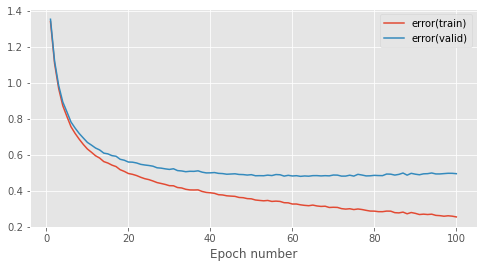

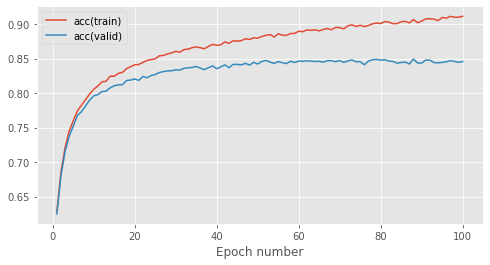

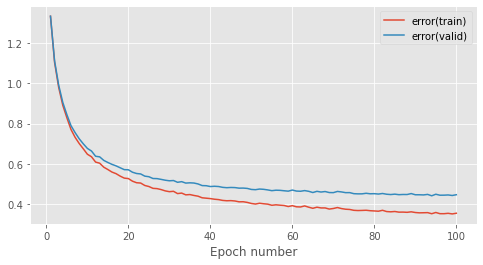

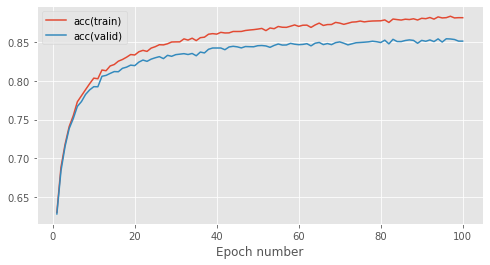

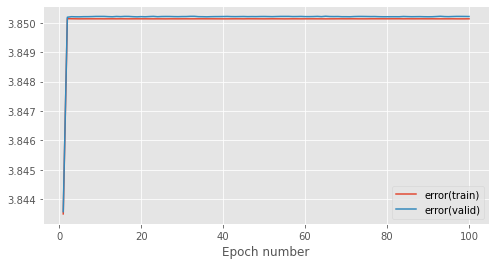

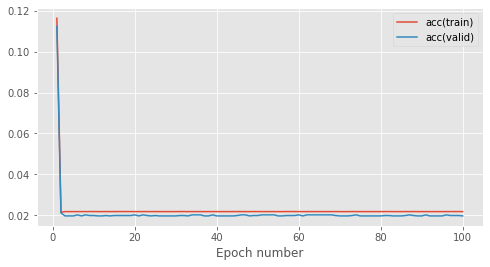

In [27]:
# This part contains coding work for section 4 L2 penalty

# Three hidden layers

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty, L2Penalty

#setup hyperparameters
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
stats_list_l2 = []
keys_list_l2 = []

l2_para_list = [10**(-4),10**(-3),10**(-1)]
for l2_para in l2_para_list:
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_para),biases_penalty = L2Penalty(l2_para)), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_para),biases_penalty = L2Penalty(l2_para)), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_para),biases_penalty = L2Penalty(l2_para)), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_para),biases_penalty = L2Penalty(l2_para))
    ])

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = AdamLearningRule(learning_rate=1e-4)

    # Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
            model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    stats_list_l2.append(stats)
    keys_list_l2.append(keys)



In [28]:
# Table 3 L2 Penalty
# val. acc.
# l2 penalty weight from list [10**(-5),10**(-4),10**(-3),10**(-2),10**(-1)]

val_acc_l2_1 = stats_list_l2[0][1:, keys_list_l2[0]['acc(valid)']][-1]
val_acc_l2_2 = stats_list_l2[1][1:, keys_list_l2[1]['acc(valid)']][-1]
val_acc_l2_3 = stats_list_l2[2][1:, keys_list_l2[2]['acc(valid)']][-1]



# generalization gap
generalization_gap_l2_1 = stats_list_l2[0][1:, keys_list_l2[0]['error(valid)']][-1] - stats_list_l2[0][1:, keys_list_l2[0]['error(train)']][-1]
generalization_gap_l2_2 = stats_list_l2[1][1:, keys_list_l2[1]['error(valid)']][-1] - stats_list_l2[1][1:, keys_list_l2[1]['error(train)']][-1]
generalization_gap_l2_3 = stats_list_l2[2][1:, keys_list_l2[2]['error(valid)']][-1] - stats_list_l2[2][1:, keys_list_l2[2]['error(train)']][-1]


In [29]:
print('val_acc_l2_1e-4',val_acc_l2_1)
print('val_acc_l2_1e-3',val_acc_l2_2)
print('val_acc_l2_1e-1',val_acc_l2_3)


print('generalization_gap_l2_1e-4',generalization_gap_l2_1)
print('generalization_gap_l2_1e-3',generalization_gap_l2_2)
print('generalization_gap_l2_1e-1',generalization_gap_l2_3)


val_acc_l2_1e-4 0.8457594936708859
val_acc_l2_1e-3 0.8517721518987341
val_acc_l2_1e-1 0.019620253164556935
generalization_gap_l2_1e-4 0.24073231837507603
generalization_gap_l2_1e-3 0.09189795746187768
generalization_gap_l2_1e-1 7.844896835296211e-05


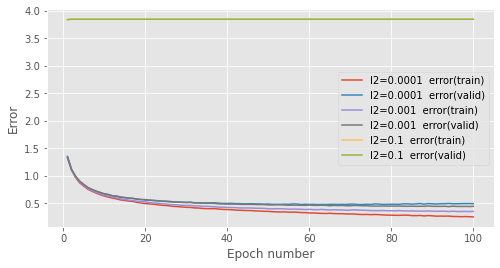

In [30]:
# L2Penalty error
fig_l2_err = plt.figure(figsize=(8, 4))
ax_l2_err = fig_l2_err.add_subplot(111)
for i in np.arange(len(stats_list_l2)):
    for k in ['error(train)', 'error(valid)']:
        ax_l2_err.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                      stats_list_l2[i][1:, keys_list_l2[i][k]], label="l2=" + str(l2_para_list[i]) + '  '+ k) 
ax_l2_err.legend(loc=0)
ax_l2_err.set_xlabel('Epoch number')
ax_l2_err.set_ylabel('Error')

plt.show()

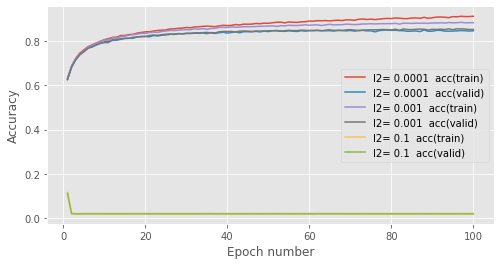

In [31]:
# L2Penalty acc
fig_l2_acc = plt.figure(figsize=(8, 4))
ax_l2_acc = fig_l2_acc.add_subplot(111)
for i in np.arange(len(stats_list_l2)):
    for k in ['acc(train)', 'acc(valid)']:
        ax_l2_acc.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                      stats_list_l2[i][1:, keys_list_l2[i][k]], label="l2= " + str(l2_para_list[i]) + '  '+ k) 
ax_l2_acc.legend(loc=0)
ax_l2_acc.set_xlabel('Epoch number')
ax_l2_acc.set_ylabel('Accuracy')

plt.show()

### Figure 4

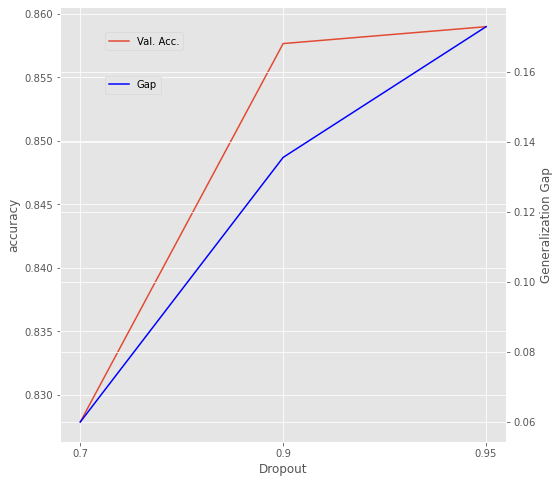

In [32]:
# Figure 4(a)

figure_4a = plt.figure(figsize = (8,8))
ax_fig_4a = figure_4a.add_subplot(111)

x = [1,2,3]
ax_fig_4a.plot(x,[val_acc_dropout_1,val_acc_dropout_2,val_acc_dropout_3],label = 'Val. Acc.')
ax_fig_4a_twin = ax_fig_4a.twinx()
ax_fig_4a_twin.plot(x,[generalization_gap_dropout_1,generalization_gap_dropout_2,generalization_gap_dropout_3],color = 'blue',label = 'Gap')
ax_fig_4a.set_xlabel('Dropout')
ax_fig_4a.set_ylabel('accuracy')
ax_fig_4a_twin.set_ylabel('Generalization Gap')

ax_fig_4a.legend(loc=(0.1,0.9))
ax_fig_4a_twin.legend(loc=(0.1,0.8))

plt.xticks(x,incl_prob_list)
figure_4a.savefig('Figure_4_a.png')

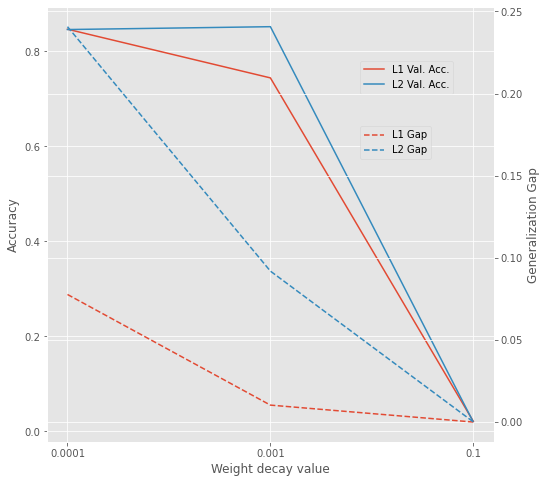

In [33]:
# Figure 4(b)

figure_4b = plt.figure(figsize = (8,8))
ax_fig_4b = figure_4b.add_subplot(111)

x = [1,2,3]
ax_fig_4b.plot(x,[val_acc_l1_1,val_acc_l1_2,val_acc_l1_3],label = 'L1 Val. Acc.')
ax_fig_4b.plot(x,[val_acc_l2_1,val_acc_l2_2,val_acc_l2_3],label = 'L2 Val. Acc.')
ax_fig_4b_twin = ax_fig_4b.twinx()
ax_fig_4b_twin.plot(x,[generalization_gap_l1_1,generalization_gap_l1_2,generalization_gap_l1_3], linestyle='--', label = 'L1 Gap')
ax_fig_4b_twin.plot(x,[generalization_gap_l2_1,generalization_gap_l2_2,generalization_gap_l2_3],linestyle = '--',label = 'L2 Gap')
ax_fig_4b.set_xlabel('Weight decay value')
ax_fig_4b.set_ylabel('Accuracy')
ax_fig_4b_twin.set_ylabel('Generalization Gap')

ax_fig_4b.legend(loc=(0.7,0.8))
ax_fig_4b_twin.legend(loc=(0.7,0.65))

plt.xticks(x,l2_para_list)
figure_4b.savefig('Figure_4_b.png')

## Combined Model

## 1. Compleing the table

### 0.95, l1 = 1e-3

In [10]:
stats_list_combined = []
keys_list_combined = []

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 4.8s to complete
    error(train)=1.91e+00, acc(train)=5.21e-01, error(valid)=1.92e+00, acc(valid)=5.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.4s to complete
    error(train)=1.69e+00, acc(train)=5.64e-01, error(valid)=1.69e+00, acc(valid)=5.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.7s to complete
    error(train)=1.60e+00, acc(train)=5.82e-01, error(valid)=1.61e+00, acc(valid)=5.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.4s to complete
    error(train)=1.54e+00, acc(train)=5.93e-01, error(valid)=1.54e+00, acc(valid)=5.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.9s to complete
    error(train)=1.49e+00, acc(train)=6.04e-01, error(valid)=1.49e+00, acc(valid)=6.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.8s to complete
    error(train)=1.45e+00, acc(train)=6.12e-01, error(valid)=1.46e+00, acc(valid)=6.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.8s to complete
    error(train)=1.41e+00, acc(train)=6.20e-01, error(valid)=1.42e+00, acc(valid)=6.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.8s to complete
    error(train)=1.39e+00, acc(train)=6.25e-01, error(valid)=1.39e+00, acc(valid)=6.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.8s to complete
    error(train)=1.36e+00, acc(train)=6.29e-01, error(valid)=1.37e+00, acc(valid)=6.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.8s to complete
    error(train)=1.33e+00, acc(train)=6.37e-01, error(valid)=1.34e+00, acc(valid)=6.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.8s to complete
    error(train)=1.31e+00, acc(train)=6.40e-01, error(valid)=1.32e+00, acc(valid)=6.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.1s to complete
    error(train)=1.29e+00, acc(train)=6.47e-01, error(valid)=1.30e+00, acc(valid)=6.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.1s to complete
    error(train)=1.28e+00, acc(train)=6.51e-01, error(valid)=1.28e+00, acc(valid)=6.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.1s to complete
    error(train)=1.26e+00, acc(train)=6.55e-01, error(valid)=1.27e+00, acc(valid)=6.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.1s to complete
    error(train)=1.24e+00, acc(train)=6.57e-01, error(valid)=1.25e+00, acc(valid)=6.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 4.1s to complete
    error(train)=1.23e+00, acc(train)=6.58e-01, error(valid)=1.24e+00, acc(valid)=6.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 4.1s to complete
    error(train)=1.21e+00, acc(train)=6.63e-01, error(valid)=1.22e+00, acc(valid)=6.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 4.1s to complete
    error(train)=1.21e+00, acc(train)=6.65e-01, error(valid)=1.22e+00, acc(valid)=6.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 4.1s to complete
    error(train)=1.20e+00, acc(train)=6.66e-01, error(valid)=1.20e+00, acc(valid)=6.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 4.1s to complete
    error(train)=1.19e+00, acc(train)=6.69e-01, error(valid)=1.19e+00, acc(valid)=6.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.1s to complete
    error(train)=1.18e+00, acc(train)=6.71e-01, error(valid)=1.18e+00, acc(valid)=6.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 4.1s to complete
    error(train)=1.17e+00, acc(train)=6.71e-01, error(valid)=1.18e+00, acc(valid)=6.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 4.1s to complete
    error(train)=1.16e+00, acc(train)=6.74e-01, error(valid)=1.17e+00, acc(valid)=6.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.1s to complete
    error(train)=1.15e+00, acc(train)=6.79e-01, error(valid)=1.16e+00, acc(valid)=6.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.2s to complete
    error(train)=1.14e+00, acc(train)=6.80e-01, error(valid)=1.15e+00, acc(valid)=6.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 4.4s to complete
    error(train)=1.14e+00, acc(train)=6.79e-01, error(valid)=1.14e+00, acc(valid)=6.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 4.5s to complete
    error(train)=1.13e+00, acc(train)=6.82e-01, error(valid)=1.14e+00, acc(valid)=6.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 4.6s to complete
    error(train)=1.12e+00, acc(train)=6.84e-01, error(valid)=1.13e+00, acc(valid)=6.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.9s to complete
    error(train)=1.11e+00, acc(train)=6.85e-01, error(valid)=1.12e+00, acc(valid)=6.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.9s to complete
    error(train)=1.11e+00, acc(train)=6.85e-01, error(valid)=1.12e+00, acc(valid)=6.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.9s to complete
    error(train)=1.10e+00, acc(train)=6.88e-01, error(valid)=1.11e+00, acc(valid)=6.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 4.5s to complete
    error(train)=1.10e+00, acc(train)=6.89e-01, error(valid)=1.10e+00, acc(valid)=6.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.7s to complete
    error(train)=1.09e+00, acc(train)=6.91e-01, error(valid)=1.10e+00, acc(valid)=6.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 4.5s to complete
    error(train)=1.09e+00, acc(train)=6.90e-01, error(valid)=1.09e+00, acc(valid)=6.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.5s to complete
    error(train)=1.09e+00, acc(train)=6.90e-01, error(valid)=1.09e+00, acc(valid)=6.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.4s to complete
    error(train)=1.07e+00, acc(train)=6.94e-01, error(valid)=1.08e+00, acc(valid)=6.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.2s to complete
    error(train)=1.07e+00, acc(train)=6.96e-01, error(valid)=1.07e+00, acc(valid)=6.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 4.2s to complete
    error(train)=1.07e+00, acc(train)=6.96e-01, error(valid)=1.07e+00, acc(valid)=6.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 4.2s to complete
    error(train)=1.06e+00, acc(train)=6.97e-01, error(valid)=1.07e+00, acc(valid)=6.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 4.2s to complete
    error(train)=1.06e+00, acc(train)=6.98e-01, error(valid)=1.06e+00, acc(valid)=6.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.2s to complete
    error(train)=1.05e+00, acc(train)=6.98e-01, error(valid)=1.06e+00, acc(valid)=6.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 4.1s to complete
    error(train)=1.05e+00, acc(train)=6.99e-01, error(valid)=1.05e+00, acc(valid)=6.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 4.1s to complete
    error(train)=1.04e+00, acc(train)=7.00e-01, error(valid)=1.05e+00, acc(valid)=6.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 4.2s to complete
    error(train)=1.04e+00, acc(train)=7.00e-01, error(valid)=1.05e+00, acc(valid)=6.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.2s to complete
    error(train)=1.03e+00, acc(train)=7.02e-01, error(valid)=1.04e+00, acc(valid)=6.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 4.2s to complete
    error(train)=1.03e+00, acc(train)=7.03e-01, error(valid)=1.04e+00, acc(valid)=7.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.1s to complete
    error(train)=1.03e+00, acc(train)=7.03e-01, error(valid)=1.03e+00, acc(valid)=6.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 4.1s to complete
    error(train)=1.03e+00, acc(train)=7.05e-01, error(valid)=1.04e+00, acc(valid)=7.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.0s to complete
    error(train)=1.02e+00, acc(train)=7.07e-01, error(valid)=1.03e+00, acc(valid)=7.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 5.0s to complete
    error(train)=1.02e+00, acc(train)=7.08e-01, error(valid)=1.02e+00, acc(valid)=7.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.9s to complete
    error(train)=1.01e+00, acc(train)=7.08e-01, error(valid)=1.02e+00, acc(valid)=7.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.9s to complete
    error(train)=1.01e+00, acc(train)=7.10e-01, error(valid)=1.02e+00, acc(valid)=7.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.9s to complete
    error(train)=1.01e+00, acc(train)=7.09e-01, error(valid)=1.01e+00, acc(valid)=7.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.9s to complete
    error(train)=1.01e+00, acc(train)=7.06e-01, error(valid)=1.02e+00, acc(valid)=7.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.9s to complete
    error(train)=1.01e+00, acc(train)=7.09e-01, error(valid)=1.01e+00, acc(valid)=7.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.9s to complete
    error(train)=1.00e+00, acc(train)=7.10e-01, error(valid)=1.01e+00, acc(valid)=7.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.9s to complete
    error(train)=9.95e-01, acc(train)=7.12e-01, error(valid)=1.00e+00, acc(valid)=7.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.9s to complete
    error(train)=9.93e-01, acc(train)=7.12e-01, error(valid)=9.98e-01, acc(valid)=7.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.9s to complete
    error(train)=9.90e-01, acc(train)=7.14e-01, error(valid)=9.96e-01, acc(valid)=7.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.9s to complete
    error(train)=9.89e-01, acc(train)=7.14e-01, error(valid)=9.93e-01, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.9s to complete
    error(train)=9.86e-01, acc(train)=7.13e-01, error(valid)=9.91e-01, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.9s to complete
    error(train)=9.89e-01, acc(train)=7.12e-01, error(valid)=9.94e-01, acc(valid)=7.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.9s to complete
    error(train)=9.83e-01, acc(train)=7.15e-01, error(valid)=9.89e-01, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.1s to complete
    error(train)=9.85e-01, acc(train)=7.16e-01, error(valid)=9.89e-01, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.2s to complete
    error(train)=9.76e-01, acc(train)=7.17e-01, error(valid)=9.81e-01, acc(valid)=7.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 4.4s to complete
    error(train)=9.76e-01, acc(train)=7.18e-01, error(valid)=9.81e-01, acc(valid)=7.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.2s to complete
    error(train)=9.80e-01, acc(train)=7.16e-01, error(valid)=9.84e-01, acc(valid)=7.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.9s to complete
    error(train)=9.76e-01, acc(train)=7.17e-01, error(valid)=9.81e-01, acc(valid)=7.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 4.2s to complete
    error(train)=9.70e-01, acc(train)=7.19e-01, error(valid)=9.75e-01, acc(valid)=7.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 4.0s to complete
    error(train)=9.67e-01, acc(train)=7.19e-01, error(valid)=9.72e-01, acc(valid)=7.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 4.2s to complete
    error(train)=9.63e-01, acc(train)=7.21e-01, error(valid)=9.68e-01, acc(valid)=7.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 4.2s to complete
    error(train)=9.67e-01, acc(train)=7.19e-01, error(valid)=9.71e-01, acc(valid)=7.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.9s to complete
    error(train)=9.63e-01, acc(train)=7.21e-01, error(valid)=9.68e-01, acc(valid)=7.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 4.0s to complete
    error(train)=9.60e-01, acc(train)=7.22e-01, error(valid)=9.65e-01, acc(valid)=7.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 4.9s to complete
    error(train)=9.55e-01, acc(train)=7.23e-01, error(valid)=9.60e-01, acc(valid)=7.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.5s to complete
    error(train)=9.57e-01, acc(train)=7.23e-01, error(valid)=9.62e-01, acc(valid)=7.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 4.4s to complete
    error(train)=9.53e-01, acc(train)=7.23e-01, error(valid)=9.58e-01, acc(valid)=7.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 4.7s to complete
    error(train)=9.51e-01, acc(train)=7.25e-01, error(valid)=9.56e-01, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.3s to complete
    error(train)=9.49e-01, acc(train)=7.26e-01, error(valid)=9.55e-01, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.9s to complete
    error(train)=9.46e-01, acc(train)=7.25e-01, error(valid)=9.51e-01, acc(valid)=7.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.9s to complete
    error(train)=9.53e-01, acc(train)=7.24e-01, error(valid)=9.58e-01, acc(valid)=7.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.9s to complete
    error(train)=9.44e-01, acc(train)=7.26e-01, error(valid)=9.49e-01, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.9s to complete
    error(train)=9.43e-01, acc(train)=7.26e-01, error(valid)=9.48e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.1s to complete
    error(train)=9.45e-01, acc(train)=7.26e-01, error(valid)=9.50e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.2s to complete
    error(train)=9.41e-01, acc(train)=7.27e-01, error(valid)=9.46e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 4.2s to complete
    error(train)=9.39e-01, acc(train)=7.28e-01, error(valid)=9.44e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 4.1s to complete
    error(train)=9.36e-01, acc(train)=7.27e-01, error(valid)=9.41e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.2s to complete
    error(train)=9.40e-01, acc(train)=7.26e-01, error(valid)=9.45e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.0s to complete
    error(train)=9.34e-01, acc(train)=7.29e-01, error(valid)=9.39e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.4s to complete
    error(train)=9.34e-01, acc(train)=7.30e-01, error(valid)=9.40e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.3s to complete
    error(train)=9.31e-01, acc(train)=7.28e-01, error(valid)=9.36e-01, acc(valid)=7.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.3s to complete
    error(train)=9.33e-01, acc(train)=7.28e-01, error(valid)=9.39e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.2s to complete
    error(train)=9.34e-01, acc(train)=7.28e-01, error(valid)=9.40e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 4.4s to complete
    error(train)=9.27e-01, acc(train)=7.31e-01, error(valid)=9.32e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.3s to complete
    error(train)=9.25e-01, acc(train)=7.31e-01, error(valid)=9.30e-01, acc(valid)=7.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.5s to complete
    error(train)=9.27e-01, acc(train)=7.30e-01, error(valid)=9.32e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 4.3s to complete
    error(train)=9.24e-01, acc(train)=7.31e-01, error(valid)=9.29e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 5.0s to complete
    error(train)=9.29e-01, acc(train)=7.32e-01, error(valid)=9.33e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 4.2s to complete
    error(train)=9.23e-01, acc(train)=7.32e-01, error(valid)=9.29e-01, acc(valid)=7.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 4.8s to complete
    error(train)=9.21e-01, acc(train)=7.31e-01, error(valid)=9.27e-01, acc(valid)=7.30e-01


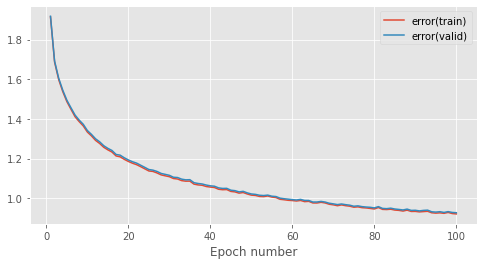

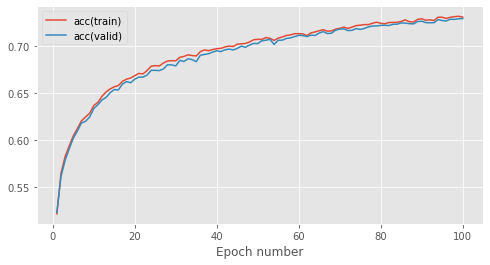

In [11]:
# This part contains coding work for section 4 Combined Model

# Three hidden layers
# Dropout: incl_prob = 0.95
# L1 Penalty: l1_para = 10**(-3)

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty, L2Penalty

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
incl_prob = 0.95
l1_para = 10**(-3)

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty = L1Penalty(l1_para),biases_penalty = L1Penalty(l1_para)), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L1Penalty(l1_para),biases_penalty = L1Penalty(l1_para)), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L1Penalty(l1_para),biases_penalty = L1Penalty(l1_para)), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty = L1Penalty(l1_para),biases_penalty = L1Penalty(l1_para))
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=1e-4)

# Remember to use notebook=False when you write a script to be run in a terminal
stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

stats_list_combined.append(stats)
keys_list_combined.append(keys)



### 0.95, l1=1e-4

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 4.2s to complete
    error(train)=1.49e+00, acc(train)=5.95e-01, error(valid)=1.49e+00, acc(valid)=5.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.0s to complete
    error(train)=1.21e+00, acc(train)=6.60e-01, error(valid)=1.22e+00, acc(valid)=6.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.3s to complete
    error(train)=1.07e+00, acc(train)=6.97e-01, error(valid)=1.08e+00, acc(valid)=6.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.9s to complete
    error(train)=9.67e-01, acc(train)=7.20e-01, error(valid)=9.80e-01, acc(valid)=7.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.0s to complete
    error(train)=8.89e-01, acc(train)=7.41e-01, error(valid)=9.04e-01, acc(valid)=7.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.9s to complete
    error(train)=8.33e-01, acc(train)=7.54e-01, error(valid)=8.47e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 4.1s to complete
    error(train)=7.85e-01, acc(train)=7.65e-01, error(valid)=8.02e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.0s to complete
    error(train)=7.50e-01, acc(train)=7.74e-01, error(valid)=7.68e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.1s to complete
    error(train)=7.22e-01, acc(train)=7.81e-01, error(valid)=7.41e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.5s to complete
    error(train)=6.93e-01, acc(train)=7.88e-01, error(valid)=7.13e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.3s to complete
    error(train)=6.75e-01, acc(train)=7.92e-01, error(valid)=6.94e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.2s to complete
    error(train)=6.51e-01, acc(train)=7.98e-01, error(valid)=6.73e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.2s to complete
    error(train)=6.34e-01, acc(train)=8.03e-01, error(valid)=6.55e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.4s to complete
    error(train)=6.21e-01, acc(train)=8.06e-01, error(valid)=6.45e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.8s to complete
    error(train)=6.06e-01, acc(train)=8.11e-01, error(valid)=6.30e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 4.1s to complete
    error(train)=5.96e-01, acc(train)=8.12e-01, error(valid)=6.20e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 4.7s to complete
    error(train)=5.87e-01, acc(train)=8.15e-01, error(valid)=6.12e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 5.5s to complete
    error(train)=5.76e-01, acc(train)=8.19e-01, error(valid)=6.01e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 4.3s to complete
    error(train)=5.66e-01, acc(train)=8.22e-01, error(valid)=5.91e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 6.3s to complete
    error(train)=5.55e-01, acc(train)=8.24e-01, error(valid)=5.82e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.5s to complete
    error(train)=5.49e-01, acc(train)=8.26e-01, error(valid)=5.78e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 4.5s to complete
    error(train)=5.45e-01, acc(train)=8.26e-01, error(valid)=5.73e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 5.4s to complete
    error(train)=5.36e-01, acc(train)=8.29e-01, error(valid)=5.64e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.3s to complete
    error(train)=5.32e-01, acc(train)=8.30e-01, error(valid)=5.60e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 5.0s to complete
    error(train)=5.24e-01, acc(train)=8.32e-01, error(valid)=5.53e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 5.9s to complete
    error(train)=5.19e-01, acc(train)=8.33e-01, error(valid)=5.50e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 5.1s to complete
    error(train)=5.14e-01, acc(train)=8.35e-01, error(valid)=5.44e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 5.7s to complete
    error(train)=5.08e-01, acc(train)=8.37e-01, error(valid)=5.39e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 5.7s to complete
    error(train)=5.08e-01, acc(train)=8.36e-01, error(valid)=5.38e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 5.9s to complete
    error(train)=5.03e-01, acc(train)=8.38e-01, error(valid)=5.34e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 5.5s to complete
    error(train)=4.96e-01, acc(train)=8.40e-01, error(valid)=5.28e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 4.7s to complete
    error(train)=4.96e-01, acc(train)=8.40e-01, error(valid)=5.30e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.5s to complete
    error(train)=4.90e-01, acc(train)=8.40e-01, error(valid)=5.22e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 4.3s to complete
    error(train)=4.88e-01, acc(train)=8.42e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.3s to complete
    error(train)=4.82e-01, acc(train)=8.44e-01, error(valid)=5.16e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.3s to complete
    error(train)=4.79e-01, acc(train)=8.45e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.3s to complete
    error(train)=4.79e-01, acc(train)=8.45e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 4.4s to complete
    error(train)=4.73e-01, acc(train)=8.45e-01, error(valid)=5.09e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 4.3s to complete
    error(train)=4.71e-01, acc(train)=8.46e-01, error(valid)=5.05e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 5.2s to complete
    error(train)=4.70e-01, acc(train)=8.46e-01, error(valid)=5.06e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.0s to complete
    error(train)=4.68e-01, acc(train)=8.47e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 4.0s to complete
    error(train)=4.63e-01, acc(train)=8.49e-01, error(valid)=4.99e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 4.0s to complete
    error(train)=4.59e-01, acc(train)=8.50e-01, error(valid)=4.95e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 4.0s to complete
    error(train)=4.62e-01, acc(train)=8.48e-01, error(valid)=4.97e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.0s to complete
    error(train)=4.59e-01, acc(train)=8.49e-01, error(valid)=4.96e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 4.0s to complete
    error(train)=4.54e-01, acc(train)=8.50e-01, error(valid)=4.91e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.0s to complete
    error(train)=4.52e-01, acc(train)=8.51e-01, error(valid)=4.90e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 4.0s to complete
    error(train)=4.50e-01, acc(train)=8.51e-01, error(valid)=4.88e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.0s to complete
    error(train)=4.47e-01, acc(train)=8.53e-01, error(valid)=4.83e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 4.0s to complete
    error(train)=4.44e-01, acc(train)=8.54e-01, error(valid)=4.82e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 4.6s to complete
    error(train)=4.43e-01, acc(train)=8.53e-01, error(valid)=4.81e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 4.4s to complete
    error(train)=4.41e-01, acc(train)=8.53e-01, error(valid)=4.79e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.3s to complete
    error(train)=4.39e-01, acc(train)=8.55e-01, error(valid)=4.78e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 4.3s to complete
    error(train)=4.38e-01, acc(train)=8.54e-01, error(valid)=4.77e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 4.3s to complete
    error(train)=4.34e-01, acc(train)=8.56e-01, error(valid)=4.75e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.3s to complete
    error(train)=4.34e-01, acc(train)=8.56e-01, error(valid)=4.75e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 4.3s to complete
    error(train)=4.31e-01, acc(train)=8.56e-01, error(valid)=4.72e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 4.3s to complete
    error(train)=4.36e-01, acc(train)=8.56e-01, error(valid)=4.76e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.3s to complete
    error(train)=4.29e-01, acc(train)=8.57e-01, error(valid)=4.73e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 4.3s to complete
    error(train)=4.26e-01, acc(train)=8.58e-01, error(valid)=4.68e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.3s to complete
    error(train)=4.24e-01, acc(train)=8.60e-01, error(valid)=4.65e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 4.3s to complete
    error(train)=4.24e-01, acc(train)=8.58e-01, error(valid)=4.64e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.3s to complete
    error(train)=4.27e-01, acc(train)=8.58e-01, error(valid)=4.66e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.9s to complete
    error(train)=4.20e-01, acc(train)=8.59e-01, error(valid)=4.61e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.0s to complete
    error(train)=4.20e-01, acc(train)=8.60e-01, error(valid)=4.61e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 4.0s to complete
    error(train)=4.17e-01, acc(train)=8.61e-01, error(valid)=4.59e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.1s to complete
    error(train)=4.17e-01, acc(train)=8.61e-01, error(valid)=4.60e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.1s to complete
    error(train)=4.14e-01, acc(train)=8.63e-01, error(valid)=4.56e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 4.1s to complete
    error(train)=4.14e-01, acc(train)=8.62e-01, error(valid)=4.58e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 4.0s to complete
    error(train)=4.13e-01, acc(train)=8.62e-01, error(valid)=4.57e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 4.0s to complete
    error(train)=4.18e-01, acc(train)=8.61e-01, error(valid)=4.62e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 4.0s to complete
    error(train)=4.11e-01, acc(train)=8.63e-01, error(valid)=4.56e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 4.1s to complete
    error(train)=4.10e-01, acc(train)=8.62e-01, error(valid)=4.53e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 4.0s to complete
    error(train)=4.12e-01, acc(train)=8.62e-01, error(valid)=4.57e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 4.1s to complete
    error(train)=4.07e-01, acc(train)=8.62e-01, error(valid)=4.53e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.0s to complete
    error(train)=4.06e-01, acc(train)=8.63e-01, error(valid)=4.50e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 4.0s to complete
    error(train)=4.06e-01, acc(train)=8.63e-01, error(valid)=4.51e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 4.0s to complete
    error(train)=4.04e-01, acc(train)=8.64e-01, error(valid)=4.47e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.0s to complete
    error(train)=4.03e-01, acc(train)=8.64e-01, error(valid)=4.48e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 4.0s to complete
    error(train)=4.01e-01, acc(train)=8.66e-01, error(valid)=4.47e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.0s to complete
    error(train)=4.02e-01, acc(train)=8.64e-01, error(valid)=4.47e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.0s to complete
    error(train)=3.99e-01, acc(train)=8.65e-01, error(valid)=4.46e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 4.0s to complete
    error(train)=3.97e-01, acc(train)=8.66e-01, error(valid)=4.44e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.0s to complete
    error(train)=3.96e-01, acc(train)=8.66e-01, error(valid)=4.44e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.3s to complete
    error(train)=3.98e-01, acc(train)=8.64e-01, error(valid)=4.44e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 4.3s to complete
    error(train)=3.93e-01, acc(train)=8.67e-01, error(valid)=4.41e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 4.5s to complete
    error(train)=3.93e-01, acc(train)=8.67e-01, error(valid)=4.39e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.4s to complete
    error(train)=3.93e-01, acc(train)=8.67e-01, error(valid)=4.38e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.1s to complete
    error(train)=3.93e-01, acc(train)=8.67e-01, error(valid)=4.39e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.3s to complete
    error(train)=3.93e-01, acc(train)=8.66e-01, error(valid)=4.42e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.5s to complete
    error(train)=3.90e-01, acc(train)=8.67e-01, error(valid)=4.39e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.2s to complete
    error(train)=3.92e-01, acc(train)=8.67e-01, error(valid)=4.41e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.5s to complete
    error(train)=3.91e-01, acc(train)=8.67e-01, error(valid)=4.39e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 4.0s to complete
    error(train)=3.90e-01, acc(train)=8.68e-01, error(valid)=4.37e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.0s to complete
    error(train)=3.90e-01, acc(train)=8.68e-01, error(valid)=4.40e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.0s to complete
    error(train)=3.86e-01, acc(train)=8.68e-01, error(valid)=4.35e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 4.4s to complete
    error(train)=3.85e-01, acc(train)=8.69e-01, error(valid)=4.32e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 4.8s to complete
    error(train)=3.84e-01, acc(train)=8.69e-01, error(valid)=4.33e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 5.6s to complete
    error(train)=3.86e-01, acc(train)=8.69e-01, error(valid)=4.36e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 5.4s to complete
    error(train)=3.84e-01, acc(train)=8.70e-01, error(valid)=4.33e-01, acc(valid)=8.55e-01


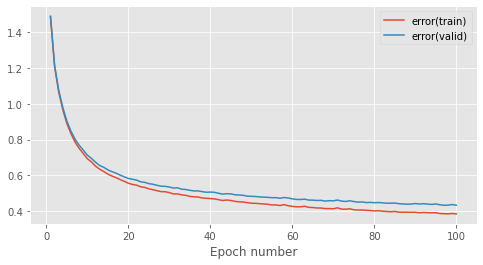

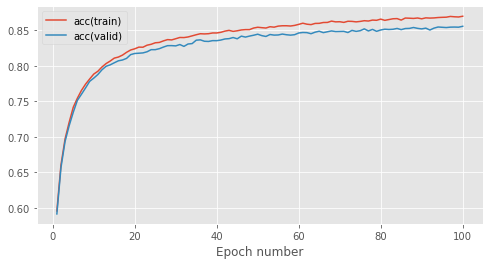

In [12]:
# This part contains coding work for section 4 Combined Model

# Three hidden layers
# Dropout: incl_prob = 0.95
# L1 Penalty: l1_para = 10**(-4)

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty, L2Penalty

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
incl_prob = 0.95
l1_para = 10**(-4)

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty = L1Penalty(l1_para),biases_penalty = L1Penalty(l1_para)), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L1Penalty(l1_para),biases_penalty = L1Penalty(l1_para)), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L1Penalty(l1_para),biases_penalty = L1Penalty(l1_para)), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty = L1Penalty(l1_para),biases_penalty = L1Penalty(l1_para))
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=1e-4)

# Remember to use notebook=False when you write a script to be run in a terminal
stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

stats_list_combined.append(stats)
keys_list_combined.append(keys)


### 0.95 l2=1e-4

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 4.2s to complete
    error(train)=1.49e+00, acc(train)=5.93e-01, error(valid)=1.49e+00, acc(valid)=5.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.3s to complete
    error(train)=1.18e+00, acc(train)=6.69e-01, error(valid)=1.18e+00, acc(valid)=6.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.1s to complete
    error(train)=1.03e+00, acc(train)=7.02e-01, error(valid)=1.03e+00, acc(valid)=7.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.4s to complete
    error(train)=9.23e-01, acc(train)=7.30e-01, error(valid)=9.33e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.9s to complete
    error(train)=8.46e-01, acc(train)=7.48e-01, error(valid)=8.57e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.7s to complete
    error(train)=7.96e-01, acc(train)=7.61e-01, error(valid)=8.12e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 4.4s to complete
    error(train)=7.48e-01, acc(train)=7.73e-01, error(valid)=7.67e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.1s to complete
    error(train)=7.14e-01, acc(train)=7.81e-01, error(valid)=7.34e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.9s to complete
    error(train)=6.78e-01, acc(train)=7.93e-01, error(valid)=6.98e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.5s to complete
    error(train)=6.54e-01, acc(train)=7.97e-01, error(valid)=6.78e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.1s to complete
    error(train)=6.28e-01, acc(train)=8.05e-01, error(valid)=6.53e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.8s to complete
    error(train)=6.12e-01, acc(train)=8.08e-01, error(valid)=6.42e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.5s to complete
    error(train)=5.93e-01, acc(train)=8.14e-01, error(valid)=6.24e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 5.1s to complete
    error(train)=5.74e-01, acc(train)=8.18e-01, error(valid)=6.09e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 6.9s to complete
    error(train)=5.60e-01, acc(train)=8.22e-01, error(valid)=5.96e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 7.6s to complete
    error(train)=5.49e-01, acc(train)=8.25e-01, error(valid)=5.86e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 8.9s to complete
    error(train)=5.33e-01, acc(train)=8.29e-01, error(valid)=5.72e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 10.5s to complete
    error(train)=5.24e-01, acc(train)=8.31e-01, error(valid)=5.65e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 10.1s to complete
    error(train)=5.11e-01, acc(train)=8.35e-01, error(valid)=5.54e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 10.0s to complete
    error(train)=5.02e-01, acc(train)=8.37e-01, error(valid)=5.47e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 11.6s to complete
    error(train)=4.91e-01, acc(train)=8.40e-01, error(valid)=5.37e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 11.4s to complete
    error(train)=4.84e-01, acc(train)=8.42e-01, error(valid)=5.33e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 11.6s to complete
    error(train)=4.77e-01, acc(train)=8.44e-01, error(valid)=5.28e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 10.1s to complete
    error(train)=4.70e-01, acc(train)=8.45e-01, error(valid)=5.23e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 9.3s to complete
    error(train)=4.60e-01, acc(train)=8.48e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 9.4s to complete
    error(train)=4.54e-01, acc(train)=8.49e-01, error(valid)=5.09e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 11.5s to complete
    error(train)=4.52e-01, acc(train)=8.50e-01, error(valid)=5.10e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 10.7s to complete
    error(train)=4.44e-01, acc(train)=8.52e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 10.2s to complete
    error(train)=4.37e-01, acc(train)=8.55e-01, error(valid)=4.98e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 10.0s to complete
    error(train)=4.36e-01, acc(train)=8.54e-01, error(valid)=4.98e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 11.1s to complete
    error(train)=4.25e-01, acc(train)=8.58e-01, error(valid)=4.90e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 10.3s to complete
    error(train)=4.20e-01, acc(train)=8.60e-01, error(valid)=4.86e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 9.4s to complete
    error(train)=4.15e-01, acc(train)=8.60e-01, error(valid)=4.83e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 10.4s to complete
    error(train)=4.11e-01, acc(train)=8.62e-01, error(valid)=4.79e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 9.9s to complete
    error(train)=4.08e-01, acc(train)=8.63e-01, error(valid)=4.79e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 11.1s to complete
    error(train)=4.04e-01, acc(train)=8.63e-01, error(valid)=4.76e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 9.9s to complete
    error(train)=3.97e-01, acc(train)=8.65e-01, error(valid)=4.70e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 10.5s to complete
    error(train)=3.97e-01, acc(train)=8.66e-01, error(valid)=4.73e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 9.5s to complete
    error(train)=3.93e-01, acc(train)=8.67e-01, error(valid)=4.69e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 9.3s to complete
    error(train)=3.89e-01, acc(train)=8.67e-01, error(valid)=4.66e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 9.1s to complete
    error(train)=3.86e-01, acc(train)=8.68e-01, error(valid)=4.67e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 9.1s to complete
    error(train)=3.81e-01, acc(train)=8.70e-01, error(valid)=4.61e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 9.1s to complete
    error(train)=3.77e-01, acc(train)=8.71e-01, error(valid)=4.60e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 9.1s to complete
    error(train)=3.77e-01, acc(train)=8.71e-01, error(valid)=4.61e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 10.0s to complete
    error(train)=3.70e-01, acc(train)=8.73e-01, error(valid)=4.55e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 9.2s to complete
    error(train)=3.67e-01, acc(train)=8.74e-01, error(valid)=4.52e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 9.1s to complete
    error(train)=3.65e-01, acc(train)=8.75e-01, error(valid)=4.53e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 9.0s to complete
    error(train)=3.62e-01, acc(train)=8.75e-01, error(valid)=4.52e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 9.3s to complete
    error(train)=3.59e-01, acc(train)=8.76e-01, error(valid)=4.50e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 9.3s to complete
    error(train)=3.58e-01, acc(train)=8.76e-01, error(valid)=4.49e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 9.1s to complete
    error(train)=3.54e-01, acc(train)=8.77e-01, error(valid)=4.47e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 9.3s to complete
    error(train)=3.53e-01, acc(train)=8.78e-01, error(valid)=4.47e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 9.7s to complete
    error(train)=3.49e-01, acc(train)=8.79e-01, error(valid)=4.44e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 9.4s to complete
    error(train)=3.47e-01, acc(train)=8.80e-01, error(valid)=4.44e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 10.4s to complete
    error(train)=3.46e-01, acc(train)=8.81e-01, error(valid)=4.44e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 11.1s to complete
    error(train)=3.41e-01, acc(train)=8.82e-01, error(valid)=4.41e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 9.7s to complete
    error(train)=3.40e-01, acc(train)=8.82e-01, error(valid)=4.40e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 9.8s to complete
    error(train)=3.37e-01, acc(train)=8.82e-01, error(valid)=4.38e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 10.3s to complete
    error(train)=3.37e-01, acc(train)=8.83e-01, error(valid)=4.39e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 9.7s to complete
    error(train)=3.32e-01, acc(train)=8.85e-01, error(valid)=4.36e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 9.3s to complete
    error(train)=3.31e-01, acc(train)=8.85e-01, error(valid)=4.37e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 9.3s to complete
    error(train)=3.30e-01, acc(train)=8.84e-01, error(valid)=4.36e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 9.0s to complete
    error(train)=3.28e-01, acc(train)=8.85e-01, error(valid)=4.36e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 10.3s to complete
    error(train)=3.26e-01, acc(train)=8.86e-01, error(valid)=4.36e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 9.6s to complete
    error(train)=3.23e-01, acc(train)=8.87e-01, error(valid)=4.34e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 9.5s to complete
    error(train)=3.22e-01, acc(train)=8.86e-01, error(valid)=4.34e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 10.2s to complete
    error(train)=3.19e-01, acc(train)=8.88e-01, error(valid)=4.31e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 9.0s to complete
    error(train)=3.20e-01, acc(train)=8.88e-01, error(valid)=4.31e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 9.1s to complete
    error(train)=3.16e-01, acc(train)=8.89e-01, error(valid)=4.29e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 9.2s to complete
    error(train)=3.14e-01, acc(train)=8.89e-01, error(valid)=4.29e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 9.3s to complete
    error(train)=3.13e-01, acc(train)=8.89e-01, error(valid)=4.29e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 9.3s to complete
    error(train)=3.11e-01, acc(train)=8.90e-01, error(valid)=4.27e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 9.9s to complete
    error(train)=3.10e-01, acc(train)=8.91e-01, error(valid)=4.27e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 9.8s to complete
    error(train)=3.08e-01, acc(train)=8.91e-01, error(valid)=4.27e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 9.4s to complete
    error(train)=3.06e-01, acc(train)=8.92e-01, error(valid)=4.26e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 10.1s to complete
    error(train)=3.04e-01, acc(train)=8.92e-01, error(valid)=4.27e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 9.7s to complete
    error(train)=3.01e-01, acc(train)=8.94e-01, error(valid)=4.23e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 9.6s to complete
    error(train)=3.01e-01, acc(train)=8.94e-01, error(valid)=4.22e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 9.8s to complete
    error(train)=3.00e-01, acc(train)=8.93e-01, error(valid)=4.25e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 9.6s to complete
    error(train)=2.99e-01, acc(train)=8.94e-01, error(valid)=4.24e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 9.9s to complete
    error(train)=2.95e-01, acc(train)=8.95e-01, error(valid)=4.21e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 9.1s to complete
    error(train)=2.95e-01, acc(train)=8.96e-01, error(valid)=4.22e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 8.9s to complete
    error(train)=2.94e-01, acc(train)=8.96e-01, error(valid)=4.21e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 8.9s to complete
    error(train)=2.92e-01, acc(train)=8.97e-01, error(valid)=4.22e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 8.9s to complete
    error(train)=2.92e-01, acc(train)=8.96e-01, error(valid)=4.22e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 8.9s to complete
    error(train)=2.90e-01, acc(train)=8.96e-01, error(valid)=4.21e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 9.1s to complete
    error(train)=2.88e-01, acc(train)=8.98e-01, error(valid)=4.17e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 9.2s to complete
    error(train)=2.88e-01, acc(train)=8.97e-01, error(valid)=4.22e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 9.1s to complete
    error(train)=2.86e-01, acc(train)=8.98e-01, error(valid)=4.19e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 8.9s to complete
    error(train)=2.84e-01, acc(train)=9.00e-01, error(valid)=4.19e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 9.7s to complete
    error(train)=2.83e-01, acc(train)=8.99e-01, error(valid)=4.18e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 9.3s to complete
    error(train)=2.83e-01, acc(train)=8.99e-01, error(valid)=4.21e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 9.6s to complete
    error(train)=2.80e-01, acc(train)=9.01e-01, error(valid)=4.18e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 9.6s to complete
    error(train)=2.81e-01, acc(train)=8.99e-01, error(valid)=4.22e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 9.7s to complete
    error(train)=2.80e-01, acc(train)=9.00e-01, error(valid)=4.19e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 9.2s to complete
    error(train)=2.77e-01, acc(train)=9.01e-01, error(valid)=4.17e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 9.6s to complete
    error(train)=2.78e-01, acc(train)=9.00e-01, error(valid)=4.19e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 9.3s to complete
    error(train)=2.74e-01, acc(train)=9.01e-01, error(valid)=4.15e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 9.2s to complete
    error(train)=2.74e-01, acc(train)=9.02e-01, error(valid)=4.17e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 9.6s to complete
    error(train)=2.73e-01, acc(train)=9.03e-01, error(valid)=4.17e-01, acc(valid)=8.60e-01


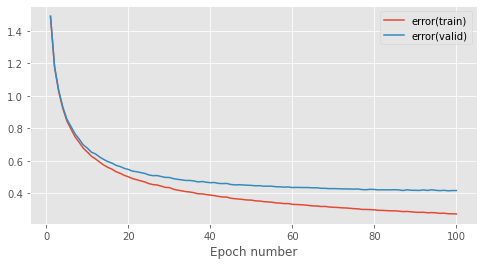

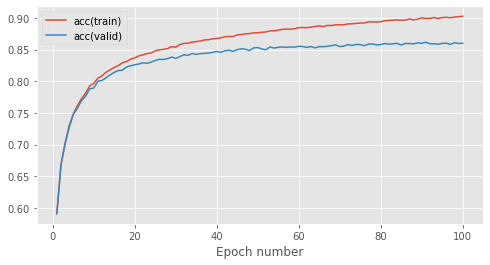

In [13]:
# This part contains coding work for section 4 Combined Model

# Three hidden layers
# Dropout: incl_prob = 0.95
# L2 Penalty: l2_para = 10**(-4)

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty, L2Penalty

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
incl_prob = 0.95
l2_para = 10**(-4)

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_para),biases_penalty = L2Penalty(l2_para)), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_para),biases_penalty = L2Penalty(l2_para)), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_para),biases_penalty = L2Penalty(l2_para)), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_para),biases_penalty = L2Penalty(l2_para))
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=1e-4)

# Remember to use notebook=False when you write a script to be run in a terminal
stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

stats_list_combined.append(stats)
keys_list_combined.append(keys)


### 0.95 l2=1e-3

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.5s to complete
    error(train)=1.52e+00, acc(train)=5.92e-01, error(valid)=1.52e+00, acc(valid)=5.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.5s to complete
    error(train)=1.22e+00, acc(train)=6.57e-01, error(valid)=1.22e+00, acc(valid)=6.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.8s to complete
    error(train)=1.06e+00, acc(train)=6.96e-01, error(valid)=1.07e+00, acc(valid)=6.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 5.0s to complete
    error(train)=9.62e-01, acc(train)=7.22e-01, error(valid)=9.70e-01, acc(valid)=7.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.6s to complete
    error(train)=8.86e-01, acc(train)=7.40e-01, error(valid)=8.96e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 4.4s to complete
    error(train)=8.31e-01, acc(train)=7.55e-01, error(valid)=8.42e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.8s to complete
    error(train)=7.83e-01, acc(train)=7.67e-01, error(valid)=7.97e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.7s to complete
    error(train)=7.47e-01, acc(train)=7.75e-01, error(valid)=7.61e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.6s to complete
    error(train)=7.16e-01, acc(train)=7.84e-01, error(valid)=7.31e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.5s to complete
    error(train)=6.89e-01, acc(train)=7.90e-01, error(valid)=7.07e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.4s to complete
    error(train)=6.65e-01, acc(train)=7.97e-01, error(valid)=6.84e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.9s to complete
    error(train)=6.49e-01, acc(train)=8.00e-01, error(valid)=6.69e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.9s to complete
    error(train)=6.27e-01, acc(train)=8.05e-01, error(valid)=6.49e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.8s to complete
    error(train)=6.13e-01, acc(train)=8.09e-01, error(valid)=6.36e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 6.3s to complete
    error(train)=6.01e-01, acc(train)=8.13e-01, error(valid)=6.27e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 7.2s to complete
    error(train)=5.87e-01, acc(train)=8.16e-01, error(valid)=6.14e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 8.7s to complete
    error(train)=5.75e-01, acc(train)=8.20e-01, error(valid)=6.02e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 10.3s to complete
    error(train)=5.63e-01, acc(train)=8.23e-01, error(valid)=5.92e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 10.5s to complete
    error(train)=5.56e-01, acc(train)=8.25e-01, error(valid)=5.86e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 10.3s to complete
    error(train)=5.50e-01, acc(train)=8.25e-01, error(valid)=5.81e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 11.2s to complete
    error(train)=5.40e-01, acc(train)=8.29e-01, error(valid)=5.72e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 10.9s to complete
    error(train)=5.31e-01, acc(train)=8.31e-01, error(valid)=5.64e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 10.9s to complete
    error(train)=5.24e-01, acc(train)=8.33e-01, error(valid)=5.57e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 10.7s to complete
    error(train)=5.19e-01, acc(train)=8.34e-01, error(valid)=5.54e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 10.2s to complete
    error(train)=5.13e-01, acc(train)=8.36e-01, error(valid)=5.47e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 10.8s to complete
    error(train)=5.08e-01, acc(train)=8.37e-01, error(valid)=5.45e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 10.7s to complete
    error(train)=5.03e-01, acc(train)=8.38e-01, error(valid)=5.40e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 10.6s to complete
    error(train)=4.97e-01, acc(train)=8.42e-01, error(valid)=5.35e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 10.6s to complete
    error(train)=4.95e-01, acc(train)=8.39e-01, error(valid)=5.34e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 11.1s to complete
    error(train)=4.92e-01, acc(train)=8.43e-01, error(valid)=5.30e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 10.5s to complete
    error(train)=4.83e-01, acc(train)=8.44e-01, error(valid)=5.22e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 10.5s to complete
    error(train)=4.79e-01, acc(train)=8.45e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 10.2s to complete
    error(train)=4.76e-01, acc(train)=8.45e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 10.6s to complete
    error(train)=4.72e-01, acc(train)=8.48e-01, error(valid)=5.14e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 10.6s to complete
    error(train)=4.70e-01, acc(train)=8.46e-01, error(valid)=5.12e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 11.3s to complete
    error(train)=4.65e-01, acc(train)=8.49e-01, error(valid)=5.07e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 10.4s to complete
    error(train)=4.60e-01, acc(train)=8.50e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 10.1s to complete
    error(train)=4.62e-01, acc(train)=8.50e-01, error(valid)=5.06e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 10.3s to complete
    error(train)=4.56e-01, acc(train)=8.51e-01, error(valid)=4.99e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 10.6s to complete
    error(train)=4.57e-01, acc(train)=8.50e-01, error(valid)=5.00e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 9.9s to complete
    error(train)=4.57e-01, acc(train)=8.51e-01, error(valid)=5.00e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 10.9s to complete
    error(train)=4.49e-01, acc(train)=8.53e-01, error(valid)=4.94e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 10.4s to complete
    error(train)=4.46e-01, acc(train)=8.54e-01, error(valid)=4.90e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 10.8s to complete
    error(train)=4.45e-01, acc(train)=8.54e-01, error(valid)=4.88e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 11.5s to complete
    error(train)=4.43e-01, acc(train)=8.54e-01, error(valid)=4.89e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 10.0s to complete
    error(train)=4.39e-01, acc(train)=8.56e-01, error(valid)=4.87e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 10.0s to complete
    error(train)=4.37e-01, acc(train)=8.56e-01, error(valid)=4.86e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 10.7s to complete
    error(train)=4.34e-01, acc(train)=8.56e-01, error(valid)=4.82e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 10.4s to complete
    error(train)=4.32e-01, acc(train)=8.57e-01, error(valid)=4.81e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 10.3s to complete
    error(train)=4.31e-01, acc(train)=8.57e-01, error(valid)=4.80e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 11.0s to complete
    error(train)=4.33e-01, acc(train)=8.56e-01, error(valid)=4.83e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 11.4s to complete
    error(train)=4.30e-01, acc(train)=8.58e-01, error(valid)=4.79e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 11.4s to complete
    error(train)=4.28e-01, acc(train)=8.58e-01, error(valid)=4.79e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 11.1s to complete
    error(train)=4.27e-01, acc(train)=8.58e-01, error(valid)=4.79e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 11.4s to complete
    error(train)=4.23e-01, acc(train)=8.58e-01, error(valid)=4.75e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 10.8s to complete
    error(train)=4.20e-01, acc(train)=8.61e-01, error(valid)=4.71e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 10.2s to complete
    error(train)=4.17e-01, acc(train)=8.62e-01, error(valid)=4.69e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 10.8s to complete
    error(train)=4.16e-01, acc(train)=8.61e-01, error(valid)=4.68e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 10.3s to complete
    error(train)=4.16e-01, acc(train)=8.61e-01, error(valid)=4.69e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 11.3s to complete
    error(train)=4.13e-01, acc(train)=8.63e-01, error(valid)=4.65e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 10.8s to complete
    error(train)=4.12e-01, acc(train)=8.63e-01, error(valid)=4.65e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 11.5s to complete
    error(train)=4.14e-01, acc(train)=8.63e-01, error(valid)=4.66e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 10.8s to complete
    error(train)=4.11e-01, acc(train)=8.63e-01, error(valid)=4.64e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 10.2s to complete
    error(train)=4.11e-01, acc(train)=8.63e-01, error(valid)=4.65e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 10.1s to complete
    error(train)=4.08e-01, acc(train)=8.63e-01, error(valid)=4.61e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 10.1s to complete
    error(train)=4.07e-01, acc(train)=8.64e-01, error(valid)=4.60e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 10.1s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=4.59e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 10.7s to complete
    error(train)=4.08e-01, acc(train)=8.64e-01, error(valid)=4.62e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 11.0s to complete
    error(train)=4.08e-01, acc(train)=8.63e-01, error(valid)=4.65e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 10.9s to complete
    error(train)=4.02e-01, acc(train)=8.66e-01, error(valid)=4.56e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 11.2s to complete
    error(train)=4.00e-01, acc(train)=8.67e-01, error(valid)=4.54e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 11.0s to complete
    error(train)=4.00e-01, acc(train)=8.67e-01, error(valid)=4.54e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 11.7s to complete
    error(train)=3.98e-01, acc(train)=8.67e-01, error(valid)=4.52e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 10.5s to complete
    error(train)=3.99e-01, acc(train)=8.67e-01, error(valid)=4.54e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 11.0s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=4.51e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 10.7s to complete
    error(train)=3.95e-01, acc(train)=8.68e-01, error(valid)=4.51e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 10.9s to complete
    error(train)=3.94e-01, acc(train)=8.68e-01, error(valid)=4.51e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 10.0s to complete
    error(train)=3.94e-01, acc(train)=8.68e-01, error(valid)=4.50e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 9.9s to complete
    error(train)=3.95e-01, acc(train)=8.66e-01, error(valid)=4.54e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 10.9s to complete
    error(train)=3.92e-01, acc(train)=8.69e-01, error(valid)=4.48e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 10.6s to complete
    error(train)=3.91e-01, acc(train)=8.68e-01, error(valid)=4.49e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 10.9s to complete
    error(train)=3.90e-01, acc(train)=8.68e-01, error(valid)=4.48e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 12.0s to complete
    error(train)=3.90e-01, acc(train)=8.69e-01, error(valid)=4.47e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 10.4s to complete
    error(train)=3.92e-01, acc(train)=8.67e-01, error(valid)=4.50e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 10.1s to complete
    error(train)=3.88e-01, acc(train)=8.68e-01, error(valid)=4.45e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 10.2s to complete
    error(train)=3.87e-01, acc(train)=8.70e-01, error(valid)=4.45e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 10.2s to complete
    error(train)=3.87e-01, acc(train)=8.70e-01, error(valid)=4.46e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 10.2s to complete
    error(train)=3.86e-01, acc(train)=8.70e-01, error(valid)=4.45e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 10.2s to complete
    error(train)=3.84e-01, acc(train)=8.70e-01, error(valid)=4.42e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 10.9s to complete
    error(train)=3.87e-01, acc(train)=8.71e-01, error(valid)=4.44e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 9.8s to complete
    error(train)=3.84e-01, acc(train)=8.70e-01, error(valid)=4.45e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 9.7s to complete
    error(train)=3.82e-01, acc(train)=8.72e-01, error(valid)=4.40e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 9.9s to complete
    error(train)=3.83e-01, acc(train)=8.71e-01, error(valid)=4.43e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 10.6s to complete
    error(train)=3.81e-01, acc(train)=8.72e-01, error(valid)=4.42e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 10.0s to complete
    error(train)=3.84e-01, acc(train)=8.70e-01, error(valid)=4.46e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 9.9s to complete
    error(train)=3.80e-01, acc(train)=8.73e-01, error(valid)=4.40e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 10.3s to complete
    error(train)=3.82e-01, acc(train)=8.71e-01, error(valid)=4.42e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 9.6s to complete
    error(train)=3.80e-01, acc(train)=8.72e-01, error(valid)=4.42e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 9.6s to complete
    error(train)=3.79e-01, acc(train)=8.72e-01, error(valid)=4.41e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 9.6s to complete
    error(train)=3.79e-01, acc(train)=8.73e-01, error(valid)=4.39e-01, acc(valid)=8.55e-01


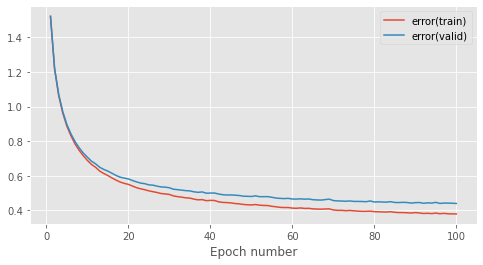

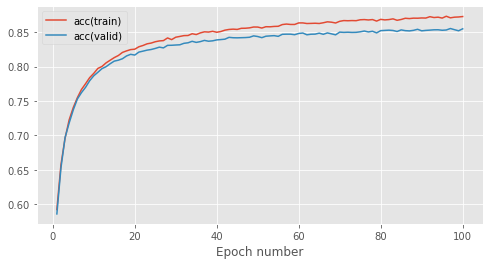

In [14]:
# This part contains coding work for section 4 Combined Model

# Three hidden layers
# Dropout: incl_prob = 0.95
# L2 Penalty: l2_para = 10**(-3)

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty, L2Penalty

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
incl_prob = 0.95
l2_para = 10**(-3)

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_para),biases_penalty = L2Penalty(l2_para)), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_para),biases_penalty = L2Penalty(l2_para)), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_para),biases_penalty = L2Penalty(l2_para)), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_para),biases_penalty = L2Penalty(l2_para))
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=1e-4)

# Remember to use notebook=False when you write a script to be run in a terminal
stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

stats_list_combined.append(stats)
keys_list_combined.append(keys)


### 0.9,l1 = 1e-3

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 5.0s to complete
    error(train)=2.22e+00, acc(train)=4.54e-01, error(valid)=2.22e+00, acc(valid)=4.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.7s to complete
    error(train)=1.92e+00, acc(train)=5.08e-01, error(valid)=1.93e+00, acc(valid)=5.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.2s to complete
    error(train)=1.80e+00, acc(train)=5.34e-01, error(valid)=1.81e+00, acc(valid)=5.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.0s to complete
    error(train)=1.71e+00, acc(train)=5.55e-01, error(valid)=1.72e+00, acc(valid)=5.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.1s to complete
    error(train)=1.64e+00, acc(train)=5.66e-01, error(valid)=1.65e+00, acc(valid)=5.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 4.2s to complete
    error(train)=1.58e+00, acc(train)=5.80e-01, error(valid)=1.59e+00, acc(valid)=5.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 4.2s to complete
    error(train)=1.54e+00, acc(train)=5.90e-01, error(valid)=1.55e+00, acc(valid)=5.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.2s to complete
    error(train)=1.50e+00, acc(train)=5.97e-01, error(valid)=1.51e+00, acc(valid)=5.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.6s to complete
    error(train)=1.47e+00, acc(train)=6.04e-01, error(valid)=1.48e+00, acc(valid)=6.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.9s to complete
    error(train)=1.45e+00, acc(train)=6.09e-01, error(valid)=1.46e+00, acc(valid)=6.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.9s to complete
    error(train)=1.42e+00, acc(train)=6.16e-01, error(valid)=1.43e+00, acc(valid)=6.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.9s to complete
    error(train)=1.41e+00, acc(train)=6.20e-01, error(valid)=1.41e+00, acc(valid)=6.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.9s to complete
    error(train)=1.38e+00, acc(train)=6.24e-01, error(valid)=1.39e+00, acc(valid)=6.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.9s to complete
    error(train)=1.36e+00, acc(train)=6.28e-01, error(valid)=1.37e+00, acc(valid)=6.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.9s to complete
    error(train)=1.36e+00, acc(train)=6.32e-01, error(valid)=1.36e+00, acc(valid)=6.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.9s to complete
    error(train)=1.34e+00, acc(train)=6.37e-01, error(valid)=1.35e+00, acc(valid)=6.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.9s to complete
    error(train)=1.33e+00, acc(train)=6.39e-01, error(valid)=1.34e+00, acc(valid)=6.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 4.1s to complete
    error(train)=1.31e+00, acc(train)=6.41e-01, error(valid)=1.32e+00, acc(valid)=6.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 4.3s to complete
    error(train)=1.31e+00, acc(train)=6.42e-01, error(valid)=1.32e+00, acc(valid)=6.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 4.2s to complete
    error(train)=1.29e+00, acc(train)=6.48e-01, error(valid)=1.30e+00, acc(valid)=6.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.2s to complete
    error(train)=1.28e+00, acc(train)=6.50e-01, error(valid)=1.29e+00, acc(valid)=6.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 4.2s to complete
    error(train)=1.27e+00, acc(train)=6.54e-01, error(valid)=1.28e+00, acc(valid)=6.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 4.2s to complete
    error(train)=1.27e+00, acc(train)=6.48e-01, error(valid)=1.28e+00, acc(valid)=6.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.2s to complete
    error(train)=1.25e+00, acc(train)=6.54e-01, error(valid)=1.26e+00, acc(valid)=6.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.2s to complete
    error(train)=1.24e+00, acc(train)=6.59e-01, error(valid)=1.25e+00, acc(valid)=6.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 4.2s to complete
    error(train)=1.24e+00, acc(train)=6.58e-01, error(valid)=1.25e+00, acc(valid)=6.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 4.2s to complete
    error(train)=1.23e+00, acc(train)=6.60e-01, error(valid)=1.24e+00, acc(valid)=6.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 5.3s to complete
    error(train)=1.23e+00, acc(train)=6.59e-01, error(valid)=1.23e+00, acc(valid)=6.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 5.0s to complete
    error(train)=1.21e+00, acc(train)=6.65e-01, error(valid)=1.22e+00, acc(valid)=6.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 4.3s to complete
    error(train)=1.21e+00, acc(train)=6.64e-01, error(valid)=1.22e+00, acc(valid)=6.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.3s to complete
    error(train)=1.21e+00, acc(train)=6.66e-01, error(valid)=1.22e+00, acc(valid)=6.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 5.4s to complete
    error(train)=1.20e+00, acc(train)=6.70e-01, error(valid)=1.21e+00, acc(valid)=6.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.4s to complete
    error(train)=1.20e+00, acc(train)=6.68e-01, error(valid)=1.21e+00, acc(valid)=6.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 4.3s to complete
    error(train)=1.19e+00, acc(train)=6.71e-01, error(valid)=1.20e+00, acc(valid)=6.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.4s to complete
    error(train)=1.18e+00, acc(train)=6.73e-01, error(valid)=1.19e+00, acc(valid)=6.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.9s to complete
    error(train)=1.18e+00, acc(train)=6.72e-01, error(valid)=1.19e+00, acc(valid)=6.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.0s to complete
    error(train)=1.17e+00, acc(train)=6.76e-01, error(valid)=1.18e+00, acc(valid)=6.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 4.0s to complete
    error(train)=1.17e+00, acc(train)=6.74e-01, error(valid)=1.18e+00, acc(valid)=6.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 4.0s to complete
    error(train)=1.16e+00, acc(train)=6.79e-01, error(valid)=1.17e+00, acc(valid)=6.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 4.0s to complete
    error(train)=1.16e+00, acc(train)=6.78e-01, error(valid)=1.17e+00, acc(valid)=6.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.0s to complete
    error(train)=1.15e+00, acc(train)=6.79e-01, error(valid)=1.16e+00, acc(valid)=6.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 4.0s to complete
    error(train)=1.15e+00, acc(train)=6.81e-01, error(valid)=1.16e+00, acc(valid)=6.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 4.0s to complete
    error(train)=1.14e+00, acc(train)=6.81e-01, error(valid)=1.15e+00, acc(valid)=6.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 4.3s to complete
    error(train)=1.14e+00, acc(train)=6.82e-01, error(valid)=1.15e+00, acc(valid)=6.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.3s to complete
    error(train)=1.13e+00, acc(train)=6.84e-01, error(valid)=1.14e+00, acc(valid)=6.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 4.0s to complete
    error(train)=1.13e+00, acc(train)=6.84e-01, error(valid)=1.14e+00, acc(valid)=6.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.0s to complete
    error(train)=1.13e+00, acc(train)=6.85e-01, error(valid)=1.13e+00, acc(valid)=6.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 4.0s to complete
    error(train)=1.12e+00, acc(train)=6.87e-01, error(valid)=1.13e+00, acc(valid)=6.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.0s to complete
    error(train)=1.12e+00, acc(train)=6.87e-01, error(valid)=1.12e+00, acc(valid)=6.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 4.0s to complete
    error(train)=1.11e+00, acc(train)=6.88e-01, error(valid)=1.12e+00, acc(valid)=6.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 4.0s to complete
    error(train)=1.11e+00, acc(train)=6.87e-01, error(valid)=1.12e+00, acc(valid)=6.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 4.0s to complete
    error(train)=1.11e+00, acc(train)=6.89e-01, error(valid)=1.11e+00, acc(valid)=6.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.0s to complete
    error(train)=1.10e+00, acc(train)=6.91e-01, error(valid)=1.10e+00, acc(valid)=6.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 4.0s to complete
    error(train)=1.10e+00, acc(train)=6.91e-01, error(valid)=1.11e+00, acc(valid)=6.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 4.0s to complete
    error(train)=1.10e+00, acc(train)=6.93e-01, error(valid)=1.10e+00, acc(valid)=6.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.3s to complete
    error(train)=1.09e+00, acc(train)=6.93e-01, error(valid)=1.10e+00, acc(valid)=6.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 4.4s to complete
    error(train)=1.09e+00, acc(train)=6.93e-01, error(valid)=1.10e+00, acc(valid)=6.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.9s to complete
    error(train)=1.08e+00, acc(train)=6.94e-01, error(valid)=1.09e+00, acc(valid)=6.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.0s to complete
    error(train)=1.08e+00, acc(train)=6.94e-01, error(valid)=1.09e+00, acc(valid)=6.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 4.0s to complete
    error(train)=1.08e+00, acc(train)=6.94e-01, error(valid)=1.09e+00, acc(valid)=6.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.0s to complete
    error(train)=1.08e+00, acc(train)=6.94e-01, error(valid)=1.08e+00, acc(valid)=6.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 4.0s to complete
    error(train)=1.07e+00, acc(train)=6.98e-01, error(valid)=1.08e+00, acc(valid)=6.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.0s to complete
    error(train)=1.07e+00, acc(train)=6.98e-01, error(valid)=1.07e+00, acc(valid)=6.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.0s to complete
    error(train)=1.07e+00, acc(train)=6.97e-01, error(valid)=1.07e+00, acc(valid)=6.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.0s to complete
    error(train)=1.06e+00, acc(train)=7.00e-01, error(valid)=1.07e+00, acc(valid)=6.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 4.0s to complete
    error(train)=1.06e+00, acc(train)=6.99e-01, error(valid)=1.06e+00, acc(valid)=7.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.0s to complete
    error(train)=1.06e+00, acc(train)=7.00e-01, error(valid)=1.06e+00, acc(valid)=7.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.0s to complete
    error(train)=1.05e+00, acc(train)=6.99e-01, error(valid)=1.06e+00, acc(valid)=6.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 4.0s to complete
    error(train)=1.05e+00, acc(train)=7.03e-01, error(valid)=1.05e+00, acc(valid)=7.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 4.0s to complete
    error(train)=1.05e+00, acc(train)=7.01e-01, error(valid)=1.06e+00, acc(valid)=7.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 4.0s to complete
    error(train)=1.05e+00, acc(train)=7.04e-01, error(valid)=1.05e+00, acc(valid)=7.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 4.0s to complete
    error(train)=1.04e+00, acc(train)=7.06e-01, error(valid)=1.05e+00, acc(valid)=7.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 4.1s to complete
    error(train)=1.04e+00, acc(train)=7.05e-01, error(valid)=1.05e+00, acc(valid)=7.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 4.0s to complete
    error(train)=1.04e+00, acc(train)=7.04e-01, error(valid)=1.04e+00, acc(valid)=7.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 4.0s to complete
    error(train)=1.04e+00, acc(train)=7.06e-01, error(valid)=1.04e+00, acc(valid)=7.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.2s to complete
    error(train)=1.04e+00, acc(train)=7.07e-01, error(valid)=1.04e+00, acc(valid)=7.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 4.3s to complete
    error(train)=1.03e+00, acc(train)=7.07e-01, error(valid)=1.04e+00, acc(valid)=7.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 4.3s to complete
    error(train)=1.03e+00, acc(train)=7.09e-01, error(valid)=1.03e+00, acc(valid)=7.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.1s to complete
    error(train)=1.03e+00, acc(train)=7.09e-01, error(valid)=1.04e+00, acc(valid)=7.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 4.0s to complete
    error(train)=1.02e+00, acc(train)=7.09e-01, error(valid)=1.03e+00, acc(valid)=7.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 5.3s to complete
    error(train)=1.02e+00, acc(train)=7.10e-01, error(valid)=1.03e+00, acc(valid)=7.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.1s to complete
    error(train)=1.02e+00, acc(train)=7.11e-01, error(valid)=1.03e+00, acc(valid)=7.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 4.0s to complete
    error(train)=1.02e+00, acc(train)=7.13e-01, error(valid)=1.02e+00, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.0s to complete
    error(train)=1.02e+00, acc(train)=7.11e-01, error(valid)=1.03e+00, acc(valid)=7.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.0s to complete
    error(train)=1.01e+00, acc(train)=7.13e-01, error(valid)=1.02e+00, acc(valid)=7.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 4.3s to complete
    error(train)=1.01e+00, acc(train)=7.11e-01, error(valid)=1.02e+00, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 4.5s to complete
    error(train)=1.01e+00, acc(train)=7.14e-01, error(valid)=1.02e+00, acc(valid)=7.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.3s to complete
    error(train)=1.01e+00, acc(train)=7.15e-01, error(valid)=1.02e+00, acc(valid)=7.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.5s to complete
    error(train)=1.01e+00, acc(train)=7.15e-01, error(valid)=1.01e+00, acc(valid)=7.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.3s to complete
    error(train)=1.00e+00, acc(train)=7.15e-01, error(valid)=1.01e+00, acc(valid)=7.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.4s to complete
    error(train)=1.00e+00, acc(train)=7.17e-01, error(valid)=1.01e+00, acc(valid)=7.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.1s to complete
    error(train)=1.01e+00, acc(train)=7.14e-01, error(valid)=1.01e+00, acc(valid)=7.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.0s to complete
    error(train)=9.99e-01, acc(train)=7.17e-01, error(valid)=1.01e+00, acc(valid)=7.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 4.0s to complete
    error(train)=9.99e-01, acc(train)=7.17e-01, error(valid)=1.01e+00, acc(valid)=7.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.0s to complete
    error(train)=1.00e+00, acc(train)=7.17e-01, error(valid)=1.01e+00, acc(valid)=7.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.0s to complete
    error(train)=9.97e-01, acc(train)=7.18e-01, error(valid)=1.00e+00, acc(valid)=7.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 4.0s to complete
    error(train)=9.90e-01, acc(train)=7.20e-01, error(valid)=9.98e-01, acc(valid)=7.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 4.0s to complete
    error(train)=9.87e-01, acc(train)=7.19e-01, error(valid)=9.94e-01, acc(valid)=7.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 4.0s to complete
    error(train)=9.85e-01, acc(train)=7.21e-01, error(valid)=9.93e-01, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 4.0s to complete
    error(train)=9.87e-01, acc(train)=7.20e-01, error(valid)=9.94e-01, acc(valid)=7.19e-01


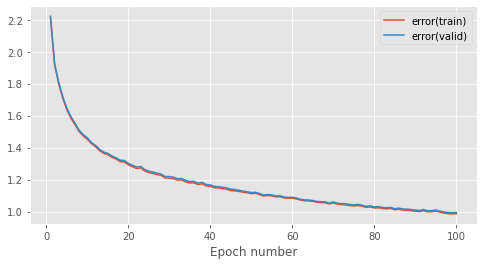

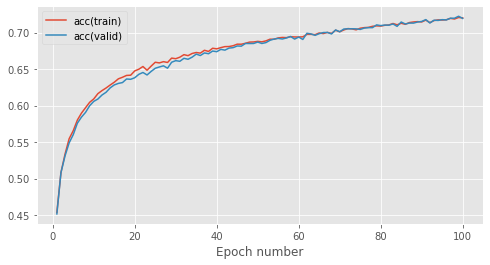

In [15]:
# This part contains coding work for section 4 Combined Model

# Three hidden layers
# Dropout: incl_prob = 0.7
# L1 Penalty: l1_para = 10**(-3)

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty, L2Penalty

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
incl_prob = 0.9
l1_para = 10**(-3)

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty = L1Penalty(l1_para), biases_penalty = L1Penalty(l1_para)), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L1Penalty(l1_para), biases_penalty = L1Penalty(l1_para)), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L1Penalty(l1_para), biases_penalty = L1Penalty(l1_para)), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty = L1Penalty(l1_para), biases_penalty = L1Penalty(l1_para))
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=1e-4)

# Remember to use notebook=False when you write a script to be run in a terminal
stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

stats_list_combined.append(stats)
keys_list_combined.append(keys)


### 0.9 l1=1e-4

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 4.0s to complete
    error(train)=1.65e+00, acc(train)=5.60e-01, error(valid)=1.65e+00, acc(valid)=5.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.0s to complete
    error(train)=1.31e+00, acc(train)=6.37e-01, error(valid)=1.32e+00, acc(valid)=6.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.0s to complete
    error(train)=1.15e+00, acc(train)=6.75e-01, error(valid)=1.16e+00, acc(valid)=6.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.5s to complete
    error(train)=1.04e+00, acc(train)=7.02e-01, error(valid)=1.05e+00, acc(valid)=7.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.1s to complete
    error(train)=9.58e-01, acc(train)=7.24e-01, error(valid)=9.67e-01, acc(valid)=7.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 4.2s to complete
    error(train)=8.98e-01, acc(train)=7.37e-01, error(valid)=9.08e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 4.3s to complete
    error(train)=8.51e-01, acc(train)=7.49e-01, error(valid)=8.61e-01, acc(valid)=7.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.4s to complete
    error(train)=8.09e-01, acc(train)=7.59e-01, error(valid)=8.21e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.3s to complete
    error(train)=7.76e-01, acc(train)=7.66e-01, error(valid)=7.89e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.6s to complete
    error(train)=7.48e-01, acc(train)=7.73e-01, error(valid)=7.62e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.5s to complete
    error(train)=7.26e-01, acc(train)=7.78e-01, error(valid)=7.43e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.5s to complete
    error(train)=7.06e-01, acc(train)=7.84e-01, error(valid)=7.22e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.2s to complete
    error(train)=6.85e-01, acc(train)=7.89e-01, error(valid)=7.02e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.3s to complete
    error(train)=6.72e-01, acc(train)=7.92e-01, error(valid)=6.92e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.2s to complete
    error(train)=6.54e-01, acc(train)=7.96e-01, error(valid)=6.74e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 4.3s to complete
    error(train)=6.41e-01, acc(train)=8.00e-01, error(valid)=6.61e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 4.2s to complete
    error(train)=6.31e-01, acc(train)=8.03e-01, error(valid)=6.51e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 4.2s to complete
    error(train)=6.14e-01, acc(train)=8.07e-01, error(valid)=6.36e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 4.3s to complete
    error(train)=6.08e-01, acc(train)=8.09e-01, error(valid)=6.28e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 4.5s to complete
    error(train)=5.98e-01, acc(train)=8.11e-01, error(valid)=6.19e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.4s to complete
    error(train)=5.86e-01, acc(train)=8.13e-01, error(valid)=6.08e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 4.5s to complete
    error(train)=5.79e-01, acc(train)=8.17e-01, error(valid)=6.00e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 4.4s to complete
    error(train)=5.76e-01, acc(train)=8.17e-01, error(valid)=5.98e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.5s to complete
    error(train)=5.65e-01, acc(train)=8.19e-01, error(valid)=5.87e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.5s to complete
    error(train)=5.64e-01, acc(train)=8.20e-01, error(valid)=5.89e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 4.4s to complete
    error(train)=5.51e-01, acc(train)=8.23e-01, error(valid)=5.75e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 5.5s to complete
    error(train)=5.47e-01, acc(train)=8.23e-01, error(valid)=5.70e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 4.1s to complete
    error(train)=5.42e-01, acc(train)=8.26e-01, error(valid)=5.67e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 4.1s to complete
    error(train)=5.37e-01, acc(train)=8.28e-01, error(valid)=5.62e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 4.3s to complete
    error(train)=5.33e-01, acc(train)=8.28e-01, error(valid)=5.59e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.1s to complete
    error(train)=5.26e-01, acc(train)=8.30e-01, error(valid)=5.51e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 4.3s to complete
    error(train)=5.20e-01, acc(train)=8.31e-01, error(valid)=5.45e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.4s to complete
    error(train)=5.19e-01, acc(train)=8.31e-01, error(valid)=5.45e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 4.4s to complete
    error(train)=5.13e-01, acc(train)=8.32e-01, error(valid)=5.38e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.5s to complete
    error(train)=5.08e-01, acc(train)=8.34e-01, error(valid)=5.35e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.5s to complete
    error(train)=5.08e-01, acc(train)=8.34e-01, error(valid)=5.34e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.5s to complete
    error(train)=5.01e-01, acc(train)=8.37e-01, error(valid)=5.28e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 4.2s to complete
    error(train)=5.01e-01, acc(train)=8.36e-01, error(valid)=5.27e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 4.3s to complete
    error(train)=4.98e-01, acc(train)=8.38e-01, error(valid)=5.27e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 4.3s to complete
    error(train)=4.91e-01, acc(train)=8.39e-01, error(valid)=5.17e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.3s to complete
    error(train)=4.89e-01, acc(train)=8.39e-01, error(valid)=5.16e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 5.1s to complete
    error(train)=4.87e-01, acc(train)=8.40e-01, error(valid)=5.16e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 5.1s to complete
    error(train)=4.87e-01, acc(train)=8.40e-01, error(valid)=5.17e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 5.3s to complete
    error(train)=4.82e-01, acc(train)=8.41e-01, error(valid)=5.13e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.6s to complete
    error(train)=4.79e-01, acc(train)=8.42e-01, error(valid)=5.07e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 4.4s to complete
    error(train)=4.75e-01, acc(train)=8.43e-01, error(valid)=5.04e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.1s to complete
    error(train)=4.71e-01, acc(train)=8.44e-01, error(valid)=5.01e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 4.1s to complete
    error(train)=4.72e-01, acc(train)=8.44e-01, error(valid)=5.01e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 5.3s to complete
    error(train)=4.69e-01, acc(train)=8.45e-01, error(valid)=4.97e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 4.1s to complete
    error(train)=4.69e-01, acc(train)=8.45e-01, error(valid)=5.00e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 4.0s to complete
    error(train)=4.67e-01, acc(train)=8.45e-01, error(valid)=4.98e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 4.1s to complete
    error(train)=4.67e-01, acc(train)=8.46e-01, error(valid)=4.98e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.0s to complete
    error(train)=4.61e-01, acc(train)=8.46e-01, error(valid)=4.92e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 4.1s to complete
    error(train)=4.61e-01, acc(train)=8.47e-01, error(valid)=4.93e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 4.1s to complete
    error(train)=4.62e-01, acc(train)=8.45e-01, error(valid)=4.95e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.4s to complete
    error(train)=4.57e-01, acc(train)=8.48e-01, error(valid)=4.87e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 4.1s to complete
    error(train)=4.54e-01, acc(train)=8.49e-01, error(valid)=4.87e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 4.1s to complete
    error(train)=4.52e-01, acc(train)=8.50e-01, error(valid)=4.83e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.1s to complete
    error(train)=4.51e-01, acc(train)=8.50e-01, error(valid)=4.83e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 4.0s to complete
    error(train)=4.51e-01, acc(train)=8.50e-01, error(valid)=4.83e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.0s to complete
    error(train)=4.49e-01, acc(train)=8.50e-01, error(valid)=4.82e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 4.2s to complete
    error(train)=4.46e-01, acc(train)=8.51e-01, error(valid)=4.80e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.5s to complete
    error(train)=4.45e-01, acc(train)=8.53e-01, error(valid)=4.77e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.5s to complete
    error(train)=4.42e-01, acc(train)=8.53e-01, error(valid)=4.76e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.1s to complete
    error(train)=4.43e-01, acc(train)=8.52e-01, error(valid)=4.76e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 4.9s to complete
    error(train)=4.41e-01, acc(train)=8.53e-01, error(valid)=4.75e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.7s to complete
    error(train)=4.41e-01, acc(train)=8.52e-01, error(valid)=4.74e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.9s to complete
    error(train)=4.38e-01, acc(train)=8.53e-01, error(valid)=4.71e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 4.6s to complete
    error(train)=4.44e-01, acc(train)=8.51e-01, error(valid)=4.79e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 4.3s to complete
    error(train)=4.35e-01, acc(train)=8.54e-01, error(valid)=4.68e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 4.5s to complete
    error(train)=4.35e-01, acc(train)=8.55e-01, error(valid)=4.69e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 4.8s to complete
    error(train)=4.32e-01, acc(train)=8.56e-01, error(valid)=4.66e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 4.9s to complete
    error(train)=4.32e-01, acc(train)=8.55e-01, error(valid)=4.66e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 4.9s to complete
    error(train)=4.31e-01, acc(train)=8.55e-01, error(valid)=4.65e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 4.1s to complete
    error(train)=4.31e-01, acc(train)=8.56e-01, error(valid)=4.67e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.2s to complete
    error(train)=4.27e-01, acc(train)=8.57e-01, error(valid)=4.62e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 4.4s to complete
    error(train)=4.31e-01, acc(train)=8.56e-01, error(valid)=4.67e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 4.2s to complete
    error(train)=4.27e-01, acc(train)=8.57e-01, error(valid)=4.62e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.8s to complete
    error(train)=4.24e-01, acc(train)=8.57e-01, error(valid)=4.61e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 4.1s to complete
    error(train)=4.23e-01, acc(train)=8.58e-01, error(valid)=4.58e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.1s to complete
    error(train)=4.24e-01, acc(train)=8.58e-01, error(valid)=4.58e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.1s to complete
    error(train)=4.23e-01, acc(train)=8.58e-01, error(valid)=4.59e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 4.2s to complete
    error(train)=4.23e-01, acc(train)=8.59e-01, error(valid)=4.59e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.7s to complete
    error(train)=4.22e-01, acc(train)=8.57e-01, error(valid)=4.59e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.6s to complete
    error(train)=4.20e-01, acc(train)=8.58e-01, error(valid)=4.56e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 4.7s to complete
    error(train)=4.19e-01, acc(train)=8.59e-01, error(valid)=4.55e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 5.0s to complete
    error(train)=4.17e-01, acc(train)=8.59e-01, error(valid)=4.54e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.8s to complete
    error(train)=4.17e-01, acc(train)=8.60e-01, error(valid)=4.54e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.6s to complete
    error(train)=4.18e-01, acc(train)=8.59e-01, error(valid)=4.55e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.1s to complete
    error(train)=4.18e-01, acc(train)=8.59e-01, error(valid)=4.55e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.3s to complete
    error(train)=4.18e-01, acc(train)=8.59e-01, error(valid)=4.55e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.4s to complete
    error(train)=4.15e-01, acc(train)=8.59e-01, error(valid)=4.52e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.3s to complete
    error(train)=4.12e-01, acc(train)=8.61e-01, error(valid)=4.51e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 5.1s to complete
    error(train)=4.13e-01, acc(train)=8.60e-01, error(valid)=4.53e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.4s to complete
    error(train)=4.13e-01, acc(train)=8.61e-01, error(valid)=4.51e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.6s to complete
    error(train)=4.12e-01, acc(train)=8.60e-01, error(valid)=4.51e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 4.5s to complete
    error(train)=4.11e-01, acc(train)=8.60e-01, error(valid)=4.49e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 4.2s to complete
    error(train)=4.09e-01, acc(train)=8.61e-01, error(valid)=4.49e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 4.3s to complete
    error(train)=4.10e-01, acc(train)=8.61e-01, error(valid)=4.50e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 4.2s to complete
    error(train)=4.09e-01, acc(train)=8.62e-01, error(valid)=4.48e-01, acc(valid)=8.48e-01


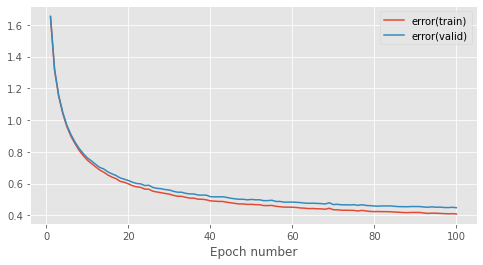

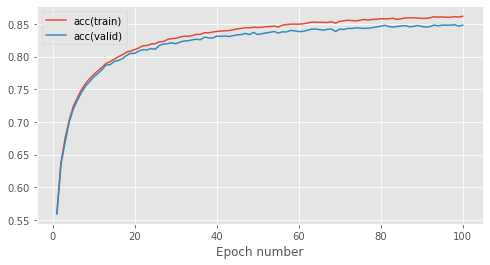

In [16]:
# This part contains coding work for section 4 Combined Model

# Three hidden layers
# Dropout: incl_prob = 0.7
# L1 Penalty: l1_para = 10**(-4)

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty, L2Penalty

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
incl_prob = 0.9
l1_para = 10**(-4)

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty = L1Penalty(l1_para), biases_penalty = L1Penalty(l1_para)), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L1Penalty(l1_para), biases_penalty = L1Penalty(l1_para)), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L1Penalty(l1_para), biases_penalty = L1Penalty(l1_para)), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty = L1Penalty(l1_para), biases_penalty = L1Penalty(l1_para))
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=1e-4)

# Remember to use notebook=False when you write a script to be run in a terminal
stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

stats_list_combined.append(stats)
keys_list_combined.append(keys)


### 0.9 l2=1e-4

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.6s to complete
    error(train)=1.61e+00, acc(train)=5.71e-01, error(valid)=1.61e+00, acc(valid)=5.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.6s to complete
    error(train)=1.30e+00, acc(train)=6.39e-01, error(valid)=1.30e+00, acc(valid)=6.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.8s to complete
    error(train)=1.15e+00, acc(train)=6.74e-01, error(valid)=1.16e+00, acc(valid)=6.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.7s to complete
    error(train)=1.04e+00, acc(train)=7.00e-01, error(valid)=1.05e+00, acc(valid)=6.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.7s to complete
    error(train)=9.51e-01, acc(train)=7.20e-01, error(valid)=9.65e-01, acc(valid)=7.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.7s to complete
    error(train)=8.79e-01, acc(train)=7.39e-01, error(valid)=8.93e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.7s to complete
    error(train)=8.21e-01, acc(train)=7.53e-01, error(valid)=8.37e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.8s to complete
    error(train)=7.78e-01, acc(train)=7.63e-01, error(valid)=7.95e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.8s to complete
    error(train)=7.39e-01, acc(train)=7.74e-01, error(valid)=7.58e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.9s to complete
    error(train)=7.07e-01, acc(train)=7.81e-01, error(valid)=7.29e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.9s to complete
    error(train)=6.77e-01, acc(train)=7.89e-01, error(valid)=6.99e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.8s to complete
    error(train)=6.55e-01, acc(train)=7.94e-01, error(valid)=6.80e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.8s to complete
    error(train)=6.36e-01, acc(train)=7.98e-01, error(valid)=6.61e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.6s to complete
    error(train)=6.14e-01, acc(train)=8.05e-01, error(valid)=6.41e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.7s to complete
    error(train)=6.00e-01, acc(train)=8.08e-01, error(valid)=6.28e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 6.7s to complete
    error(train)=5.83e-01, acc(train)=8.12e-01, error(valid)=6.12e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 8.8s to complete
    error(train)=5.71e-01, acc(train)=8.15e-01, error(valid)=6.02e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 8.7s to complete
    error(train)=5.61e-01, acc(train)=8.18e-01, error(valid)=5.92e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 8.8s to complete
    error(train)=5.44e-01, acc(train)=8.23e-01, error(valid)=5.78e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 9.3s to complete
    error(train)=5.35e-01, acc(train)=8.27e-01, error(valid)=5.71e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 8.8s to complete
    error(train)=5.23e-01, acc(train)=8.29e-01, error(valid)=5.59e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 8.8s to complete
    error(train)=5.16e-01, acc(train)=8.31e-01, error(valid)=5.54e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 8.8s to complete
    error(train)=5.07e-01, acc(train)=8.33e-01, error(valid)=5.46e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 8.8s to complete
    error(train)=5.00e-01, acc(train)=8.34e-01, error(valid)=5.42e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 8.8s to complete
    error(train)=4.92e-01, acc(train)=8.37e-01, error(valid)=5.34e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 8.8s to complete
    error(train)=4.85e-01, acc(train)=8.38e-01, error(valid)=5.28e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 8.8s to complete
    error(train)=4.77e-01, acc(train)=8.41e-01, error(valid)=5.21e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 8.8s to complete
    error(train)=4.72e-01, acc(train)=8.43e-01, error(valid)=5.19e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 9.8s to complete
    error(train)=4.64e-01, acc(train)=8.44e-01, error(valid)=5.12e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 8.7s to complete
    error(train)=4.62e-01, acc(train)=8.45e-01, error(valid)=5.10e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 8.7s to complete
    error(train)=4.56e-01, acc(train)=8.46e-01, error(valid)=5.07e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 8.5s to complete
    error(train)=4.48e-01, acc(train)=8.50e-01, error(valid)=5.00e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 8.6s to complete
    error(train)=4.45e-01, acc(train)=8.50e-01, error(valid)=4.98e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 8.7s to complete
    error(train)=4.45e-01, acc(train)=8.49e-01, error(valid)=4.99e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 8.7s to complete
    error(train)=4.35e-01, acc(train)=8.52e-01, error(valid)=4.90e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 8.4s to complete
    error(train)=4.31e-01, acc(train)=8.54e-01, error(valid)=4.87e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 8.4s to complete
    error(train)=4.27e-01, acc(train)=8.54e-01, error(valid)=4.83e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 8.4s to complete
    error(train)=4.23e-01, acc(train)=8.55e-01, error(valid)=4.81e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 8.9s to complete
    error(train)=4.20e-01, acc(train)=8.57e-01, error(valid)=4.78e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 8.5s to complete
    error(train)=4.16e-01, acc(train)=8.58e-01, error(valid)=4.76e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 8.6s to complete
    error(train)=4.13e-01, acc(train)=8.58e-01, error(valid)=4.75e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 9.3s to complete
    error(train)=4.09e-01, acc(train)=8.59e-01, error(valid)=4.71e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 9.4s to complete
    error(train)=4.05e-01, acc(train)=8.60e-01, error(valid)=4.69e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 8.4s to complete
    error(train)=4.02e-01, acc(train)=8.62e-01, error(valid)=4.66e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 8.5s to complete
    error(train)=3.99e-01, acc(train)=8.63e-01, error(valid)=4.63e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 8.5s to complete
    error(train)=3.97e-01, acc(train)=8.63e-01, error(valid)=4.64e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 8.5s to complete
    error(train)=3.94e-01, acc(train)=8.65e-01, error(valid)=4.61e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 8.5s to complete
    error(train)=3.90e-01, acc(train)=8.65e-01, error(valid)=4.59e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 8.3s to complete
    error(train)=3.87e-01, acc(train)=8.65e-01, error(valid)=4.57e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 8.4s to complete
    error(train)=3.86e-01, acc(train)=8.67e-01, error(valid)=4.56e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 8.4s to complete
    error(train)=3.81e-01, acc(train)=8.68e-01, error(valid)=4.51e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 8.3s to complete
    error(train)=3.81e-01, acc(train)=8.68e-01, error(valid)=4.54e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 8.6s to complete
    error(train)=3.80e-01, acc(train)=8.69e-01, error(valid)=4.53e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 10.1s to complete
    error(train)=3.75e-01, acc(train)=8.69e-01, error(valid)=4.49e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 9.2s to complete
    error(train)=3.74e-01, acc(train)=8.70e-01, error(valid)=4.49e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 9.0s to complete
    error(train)=3.71e-01, acc(train)=8.71e-01, error(valid)=4.46e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 9.2s to complete
    error(train)=3.70e-01, acc(train)=8.71e-01, error(valid)=4.46e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 9.0s to complete
    error(train)=3.67e-01, acc(train)=8.72e-01, error(valid)=4.45e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 9.0s to complete
    error(train)=3.64e-01, acc(train)=8.73e-01, error(valid)=4.44e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 9.0s to complete
    error(train)=3.61e-01, acc(train)=8.73e-01, error(valid)=4.42e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 8.7s to complete
    error(train)=3.59e-01, acc(train)=8.74e-01, error(valid)=4.41e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 8.7s to complete
    error(train)=3.57e-01, acc(train)=8.74e-01, error(valid)=4.40e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 9.0s to complete
    error(train)=3.55e-01, acc(train)=8.76e-01, error(valid)=4.37e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 9.1s to complete
    error(train)=3.54e-01, acc(train)=8.76e-01, error(valid)=4.38e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 9.1s to complete
    error(train)=3.54e-01, acc(train)=8.76e-01, error(valid)=4.38e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 10.0s to complete
    error(train)=3.50e-01, acc(train)=8.77e-01, error(valid)=4.34e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 8.8s to complete
    error(train)=3.50e-01, acc(train)=8.77e-01, error(valid)=4.34e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 8.8s to complete
    error(train)=3.48e-01, acc(train)=8.76e-01, error(valid)=4.35e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 9.1s to complete
    error(train)=3.46e-01, acc(train)=8.78e-01, error(valid)=4.33e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 9.1s to complete
    error(train)=3.45e-01, acc(train)=8.78e-01, error(valid)=4.33e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 9.1s to complete
    error(train)=3.44e-01, acc(train)=8.78e-01, error(valid)=4.34e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 9.1s to complete
    error(train)=3.40e-01, acc(train)=8.79e-01, error(valid)=4.30e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 9.1s to complete
    error(train)=3.40e-01, acc(train)=8.79e-01, error(valid)=4.32e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 9.0s to complete
    error(train)=3.36e-01, acc(train)=8.81e-01, error(valid)=4.30e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 9.0s to complete
    error(train)=3.36e-01, acc(train)=8.81e-01, error(valid)=4.28e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 8.8s to complete
    error(train)=3.34e-01, acc(train)=8.81e-01, error(valid)=4.28e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 8.6s to complete
    error(train)=3.33e-01, acc(train)=8.81e-01, error(valid)=4.27e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 9.9s to complete
    error(train)=3.33e-01, acc(train)=8.81e-01, error(valid)=4.28e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 9.0s to complete
    error(train)=3.29e-01, acc(train)=8.83e-01, error(valid)=4.24e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 8.9s to complete
    error(train)=3.28e-01, acc(train)=8.83e-01, error(valid)=4.24e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 8.9s to complete
    error(train)=3.27e-01, acc(train)=8.84e-01, error(valid)=4.25e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 8.6s to complete
    error(train)=3.26e-01, acc(train)=8.83e-01, error(valid)=4.24e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 8.5s to complete
    error(train)=3.25e-01, acc(train)=8.83e-01, error(valid)=4.22e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 8.2s to complete
    error(train)=3.26e-01, acc(train)=8.83e-01, error(valid)=4.26e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 8.2s to complete
    error(train)=3.22e-01, acc(train)=8.85e-01, error(valid)=4.23e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 8.1s to complete
    error(train)=3.26e-01, acc(train)=8.83e-01, error(valid)=4.26e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 8.2s to complete
    error(train)=3.19e-01, acc(train)=8.85e-01, error(valid)=4.20e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 8.3s to complete
    error(train)=3.18e-01, acc(train)=8.87e-01, error(valid)=4.19e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 8.2s to complete
    error(train)=3.19e-01, acc(train)=8.86e-01, error(valid)=4.20e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 8.2s to complete
    error(train)=3.16e-01, acc(train)=8.88e-01, error(valid)=4.18e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 9.4s to complete
    error(train)=3.16e-01, acc(train)=8.87e-01, error(valid)=4.20e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 8.7s to complete
    error(train)=3.14e-01, acc(train)=8.88e-01, error(valid)=4.19e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 8.8s to complete
    error(train)=3.14e-01, acc(train)=8.87e-01, error(valid)=4.20e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 8.4s to complete
    error(train)=3.13e-01, acc(train)=8.88e-01, error(valid)=4.19e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 8.5s to complete
    error(train)=3.13e-01, acc(train)=8.88e-01, error(valid)=4.16e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 8.8s to complete
    error(train)=3.12e-01, acc(train)=8.88e-01, error(valid)=4.19e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 8.2s to complete
    error(train)=3.09e-01, acc(train)=8.89e-01, error(valid)=4.16e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 8.2s to complete
    error(train)=3.07e-01, acc(train)=8.90e-01, error(valid)=4.16e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 8.2s to complete
    error(train)=3.08e-01, acc(train)=8.90e-01, error(valid)=4.16e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 8.2s to complete
    error(train)=3.07e-01, acc(train)=8.89e-01, error(valid)=4.17e-01, acc(valid)=8.58e-01


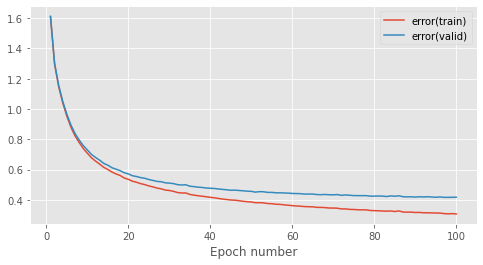

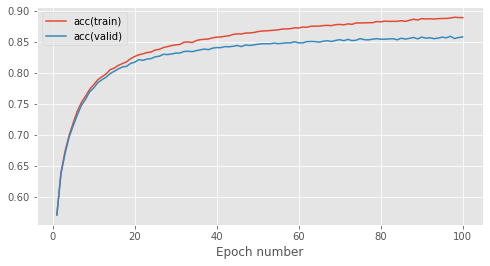

In [17]:
# This part contains coding work for section 4 Combined Model

# Three hidden layers
# Dropout: incl_prob = 0.7
# L2 Penalty: l2_para = 10**(-4)

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty, L2Penalty

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
incl_prob = 0.9
l2_para = 10**(-4)

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_para), biases_penalty = L2Penalty(l2_para)), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_para), biases_penalty = L2Penalty(l2_para)), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_para), biases_penalty = L2Penalty(l2_para)), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_para), biases_penalty = L2Penalty(l2_para))
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=1e-4)

# Remember to use notebook=False when you write a script to be run in a terminal
stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

stats_list_combined.append(stats)
keys_list_combined.append(keys)


### 0.9 l2=1e-3

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.6s to complete
    error(train)=1.65e+00, acc(train)=5.66e-01, error(valid)=1.64e+00, acc(valid)=5.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.6s to complete
    error(train)=1.32e+00, acc(train)=6.33e-01, error(valid)=1.32e+00, acc(valid)=6.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.6s to complete
    error(train)=1.16e+00, acc(train)=6.73e-01, error(valid)=1.16e+00, acc(valid)=6.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.7s to complete
    error(train)=1.04e+00, acc(train)=6.98e-01, error(valid)=1.05e+00, acc(valid)=6.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.7s to complete
    error(train)=9.57e-01, acc(train)=7.20e-01, error(valid)=9.66e-01, acc(valid)=7.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.8s to complete
    error(train)=8.86e-01, acc(train)=7.39e-01, error(valid)=8.95e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.9s to complete
    error(train)=8.33e-01, acc(train)=7.50e-01, error(valid)=8.44e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.5s to complete
    error(train)=7.90e-01, acc(train)=7.62e-01, error(valid)=8.01e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.5s to complete
    error(train)=7.55e-01, acc(train)=7.70e-01, error(valid)=7.68e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.7s to complete
    error(train)=7.26e-01, acc(train)=7.77e-01, error(valid)=7.40e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.6s to complete
    error(train)=7.02e-01, acc(train)=7.84e-01, error(valid)=7.17e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.5s to complete
    error(train)=6.80e-01, acc(train)=7.89e-01, error(valid)=6.97e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.5s to complete
    error(train)=6.64e-01, acc(train)=7.94e-01, error(valid)=6.81e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.3s to complete
    error(train)=6.45e-01, acc(train)=7.98e-01, error(valid)=6.64e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.7s to complete
    error(train)=6.31e-01, acc(train)=8.02e-01, error(valid)=6.49e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 7.0s to complete
    error(train)=6.16e-01, acc(train)=8.05e-01, error(valid)=6.37e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 8.2s to complete
    error(train)=6.08e-01, acc(train)=8.09e-01, error(valid)=6.30e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 9.2s to complete
    error(train)=5.96e-01, acc(train)=8.12e-01, error(valid)=6.18e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 9.4s to complete
    error(train)=5.83e-01, acc(train)=8.15e-01, error(valid)=6.07e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 9.4s to complete
    error(train)=5.79e-01, acc(train)=8.15e-01, error(valid)=6.05e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 9.3s to complete
    error(train)=5.66e-01, acc(train)=8.20e-01, error(valid)=5.91e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 9.2s to complete
    error(train)=5.61e-01, acc(train)=8.21e-01, error(valid)=5.88e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 10.1s to complete
    error(train)=5.52e-01, acc(train)=8.24e-01, error(valid)=5.79e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 9.1s to complete
    error(train)=5.49e-01, acc(train)=8.23e-01, error(valid)=5.77e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 9.0s to complete
    error(train)=5.40e-01, acc(train)=8.26e-01, error(valid)=5.69e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 9.0s to complete
    error(train)=5.37e-01, acc(train)=8.28e-01, error(valid)=5.65e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 9.0s to complete
    error(train)=5.27e-01, acc(train)=8.31e-01, error(valid)=5.57e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 9.0s to complete
    error(train)=5.19e-01, acc(train)=8.31e-01, error(valid)=5.50e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 9.0s to complete
    error(train)=5.18e-01, acc(train)=8.32e-01, error(valid)=5.48e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 9.0s to complete
    error(train)=5.12e-01, acc(train)=8.33e-01, error(valid)=5.43e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 9.0s to complete
    error(train)=5.10e-01, acc(train)=8.35e-01, error(valid)=5.42e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 9.2s to complete
    error(train)=5.04e-01, acc(train)=8.36e-01, error(valid)=5.36e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 9.3s to complete
    error(train)=5.01e-01, acc(train)=8.37e-01, error(valid)=5.34e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 9.3s to complete
    error(train)=4.97e-01, acc(train)=8.37e-01, error(valid)=5.29e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 10.5s to complete
    error(train)=4.96e-01, acc(train)=8.38e-01, error(valid)=5.30e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 9.0s to complete
    error(train)=4.94e-01, acc(train)=8.40e-01, error(valid)=5.29e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 8.9s to complete
    error(train)=4.89e-01, acc(train)=8.39e-01, error(valid)=5.25e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 8.9s to complete
    error(train)=4.88e-01, acc(train)=8.40e-01, error(valid)=5.24e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 9.1s to complete
    error(train)=4.80e-01, acc(train)=8.43e-01, error(valid)=5.15e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 9.1s to complete
    error(train)=4.78e-01, acc(train)=8.43e-01, error(valid)=5.12e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 9.1s to complete
    error(train)=4.83e-01, acc(train)=8.41e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 9.1s to complete
    error(train)=4.72e-01, acc(train)=8.44e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 9.2s to complete
    error(train)=4.73e-01, acc(train)=8.45e-01, error(valid)=5.09e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 9.1s to complete
    error(train)=4.68e-01, acc(train)=8.46e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 9.1s to complete
    error(train)=4.65e-01, acc(train)=8.47e-01, error(valid)=5.02e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 9.2s to complete
    error(train)=4.69e-01, acc(train)=8.45e-01, error(valid)=5.06e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 10.1s to complete
    error(train)=4.63e-01, acc(train)=8.48e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 9.1s to complete
    error(train)=4.62e-01, acc(train)=8.49e-01, error(valid)=4.99e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 8.9s to complete
    error(train)=4.58e-01, acc(train)=8.50e-01, error(valid)=4.95e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 9.0s to complete
    error(train)=4.60e-01, acc(train)=8.48e-01, error(valid)=4.98e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 8.9s to complete
    error(train)=4.55e-01, acc(train)=8.49e-01, error(valid)=4.93e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 8.9s to complete
    error(train)=4.53e-01, acc(train)=8.50e-01, error(valid)=4.91e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 8.9s to complete
    error(train)=4.51e-01, acc(train)=8.51e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 9.0s to complete
    error(train)=4.53e-01, acc(train)=8.50e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 8.9s to complete
    error(train)=4.52e-01, acc(train)=8.51e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 8.9s to complete
    error(train)=4.48e-01, acc(train)=8.52e-01, error(valid)=4.86e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 8.9s to complete
    error(train)=4.44e-01, acc(train)=8.53e-01, error(valid)=4.83e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 8.9s to complete
    error(train)=4.45e-01, acc(train)=8.53e-01, error(valid)=4.84e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 10.1s to complete
    error(train)=4.45e-01, acc(train)=8.53e-01, error(valid)=4.83e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 9.0s to complete
    error(train)=4.42e-01, acc(train)=8.53e-01, error(valid)=4.80e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 9.0s to complete
    error(train)=4.43e-01, acc(train)=8.53e-01, error(valid)=4.82e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 9.1s to complete
    error(train)=4.41e-01, acc(train)=8.54e-01, error(valid)=4.81e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 9.0s to complete
    error(train)=4.36e-01, acc(train)=8.56e-01, error(valid)=4.76e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 9.1s to complete
    error(train)=4.37e-01, acc(train)=8.55e-01, error(valid)=4.76e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 9.1s to complete
    error(train)=4.39e-01, acc(train)=8.53e-01, error(valid)=4.80e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 9.3s to complete
    error(train)=4.34e-01, acc(train)=8.55e-01, error(valid)=4.74e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 9.2s to complete
    error(train)=4.33e-01, acc(train)=8.56e-01, error(valid)=4.74e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 9.2s to complete
    error(train)=4.34e-01, acc(train)=8.57e-01, error(valid)=4.74e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 9.2s to complete
    error(train)=4.31e-01, acc(train)=8.57e-01, error(valid)=4.71e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 9.2s to complete
    error(train)=4.30e-01, acc(train)=8.58e-01, error(valid)=4.70e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 10.2s to complete
    error(train)=4.30e-01, acc(train)=8.57e-01, error(valid)=4.71e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 9.0s to complete
    error(train)=4.26e-01, acc(train)=8.59e-01, error(valid)=4.67e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 9.0s to complete
    error(train)=4.26e-01, acc(train)=8.59e-01, error(valid)=4.67e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 9.0s to complete
    error(train)=4.24e-01, acc(train)=8.60e-01, error(valid)=4.64e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 9.0s to complete
    error(train)=4.24e-01, acc(train)=8.58e-01, error(valid)=4.65e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 8.9s to complete
    error(train)=4.27e-01, acc(train)=8.59e-01, error(valid)=4.67e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 8.9s to complete
    error(train)=4.22e-01, acc(train)=8.59e-01, error(valid)=4.64e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 8.9s to complete
    error(train)=4.21e-01, acc(train)=8.60e-01, error(valid)=4.63e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 9.8s to complete
    error(train)=4.21e-01, acc(train)=8.61e-01, error(valid)=4.63e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 9.9s to complete
    error(train)=4.21e-01, acc(train)=8.60e-01, error(valid)=4.64e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 9.8s to complete
    error(train)=4.19e-01, acc(train)=8.61e-01, error(valid)=4.61e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 9.6s to complete
    error(train)=4.20e-01, acc(train)=8.61e-01, error(valid)=4.63e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 10.8s to complete
    error(train)=4.19e-01, acc(train)=8.60e-01, error(valid)=4.61e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 10.0s to complete
    error(train)=4.18e-01, acc(train)=8.61e-01, error(valid)=4.61e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 10.2s to complete
    error(train)=4.15e-01, acc(train)=8.61e-01, error(valid)=4.57e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 9.6s to complete
    error(train)=4.15e-01, acc(train)=8.63e-01, error(valid)=4.58e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 9.5s to complete
    error(train)=4.16e-01, acc(train)=8.61e-01, error(valid)=4.58e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 11.3s to complete
    error(train)=4.12e-01, acc(train)=8.63e-01, error(valid)=4.55e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 10.0s to complete
    error(train)=4.16e-01, acc(train)=8.62e-01, error(valid)=4.58e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 9.4s to complete
    error(train)=4.17e-01, acc(train)=8.62e-01, error(valid)=4.59e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 9.8s to complete
    error(train)=4.12e-01, acc(train)=8.63e-01, error(valid)=4.54e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 9.6s to complete
    error(train)=4.09e-01, acc(train)=8.64e-01, error(valid)=4.51e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 8.8s to complete
    error(train)=4.16e-01, acc(train)=8.61e-01, error(valid)=4.58e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 10.0s to complete
    error(train)=4.09e-01, acc(train)=8.64e-01, error(valid)=4.51e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 8.9s to complete
    error(train)=4.08e-01, acc(train)=8.64e-01, error(valid)=4.52e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 8.8s to complete
    error(train)=4.10e-01, acc(train)=8.63e-01, error(valid)=4.54e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 9.1s to complete
    error(train)=4.07e-01, acc(train)=8.64e-01, error(valid)=4.51e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 9.0s to complete
    error(train)=4.08e-01, acc(train)=8.64e-01, error(valid)=4.51e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 9.0s to complete
    error(train)=4.10e-01, acc(train)=8.63e-01, error(valid)=4.55e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 9.0s to complete
    error(train)=4.05e-01, acc(train)=8.65e-01, error(valid)=4.50e-01, acc(valid)=8.50e-01


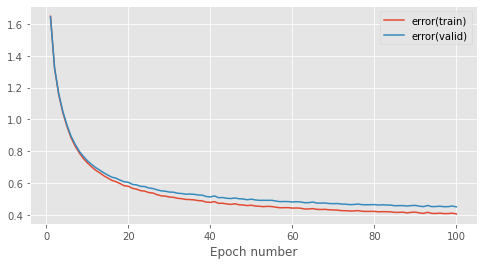

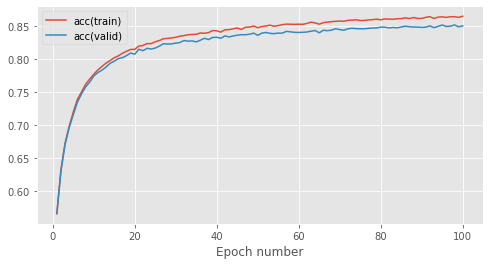

In [18]:
# This part contains coding work for section 4 Combined Model

# Three hidden layers
# Dropout: incl_prob = 0.7
# L2 Penalty: l2_para = 10**(-3)

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty, L2Penalty

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
incl_prob = 0.9
l2_para = 10**(-3)

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_para), biases_penalty = L2Penalty(l2_para)), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_para), biases_penalty = L2Penalty(l2_para)), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_para), biases_penalty = L2Penalty(l2_para)), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_para), biases_penalty = L2Penalty(l2_para))
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=1e-4)

# Remember to use notebook=False when you write a script to be run in a terminal
stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

stats_list_combined.append(stats)
keys_list_combined.append(keys)


In [19]:
# print reslut for Table 3, Combined
print('0.95, l1 = 1e-3,acc',stats_list_combined[0][1:, keys_list_combined[0]['acc(valid)']][-1])
print('0.95, l1 = 1e-3,generalization gap',stats_list_combined[0][1:, keys_list_combined[0]['error(valid)']][-1] - stats_list_combined[0][1:, keys_list_combined[0]['error(train)']][-1])

print('0.95, l1 = 1e-4,acc',stats_list_combined[1][1:, keys_list_combined[1]['acc(valid)']][-1])
print('0.95, l1 = 1e-4,generalization gap',stats_list_combined[1][1:, keys_list_combined[1]['error(valid)']][-1] - stats_list_combined[1][1:, keys_list_combined[1]['error(train)']][-1])

print('0.95, l2 = 1e-4,acc',stats_list_combined[2][1:, keys_list_combined[2]['acc(valid)']][-1])
print('0.95, l2 = 1e-4,generalization gap',stats_list_combined[2][1:, keys_list_combined[2]['error(valid)']][-1] - stats_list_combined[2][1:, keys_list_combined[2]['error(train)']][-1])

print('0.95, l2 = 1e-3,acc',stats_list_combined[3][1:, keys_list_combined[3]['acc(valid)']][-1])
print('0.95, l2 = 1e-3,generalization gap',stats_list_combined[3][1:, keys_list_combined[3]['error(valid)']][-1] - stats_list_combined[3][1:, keys_list_combined[3]['error(train)']][-1])

print('0.9, l1 = 1e-3,acc',stats_list_combined[4][1:, keys_list_combined[4]['acc(valid)']][-1])
print('0.9, l1 = 1e-3,generalization gap',stats_list_combined[4][1:, keys_list_combined[4]['error(valid)']][-1] - stats_list_combined[4][1:, keys_list_combined[4]['error(train)']][-1])

print('0.9, l1 = 1e-4,acc',stats_list_combined[5][1:, keys_list_combined[5]['acc(valid)']][-1])
print('0.9, l1 = 1e-4,generalization gap',stats_list_combined[5][1:, keys_list_combined[5]['error(valid)']][-1] - stats_list_combined[5][1:, keys_list_combined[5]['error(train)']][-1])

print('0.9, l2 = 1e-4,acc',stats_list_combined[6][1:, keys_list_combined[6]['acc(valid)']][-1])
print('0.9, l2 = 1e-4,generalization gap',stats_list_combined[6][1:, keys_list_combined[6]['error(valid)']][-1] - stats_list_combined[6][1:, keys_list_combined[6]['error(train)']][-1])

print('0.9, l2 = 1e-3,acc',stats_list_combined[7][1:, keys_list_combined[7]['acc(valid)']][-1])
print('0.9, l2 = 1e-3,generalization gap',stats_list_combined[7][1:, keys_list_combined[7]['error(valid)']][-1] - stats_list_combined[7][1:, keys_list_combined[7]['error(train)']][-1])

0.95, l1 = 1e-3,acc 0.7298101265822787
0.95, l1 = 1e-3,generalization gap 0.006045457141221844
0.95, l1 = 1e-4,acc 0.8554430379746837
0.95, l1 = 1e-4,generalization gap 0.048944219832560365
0.95, l2 = 1e-4,acc 0.8600632911392404
0.95, l2 = 1e-4,generalization gap 0.14408261647741644
0.95, l2 = 1e-3,acc 0.8548101265822783
0.95, l2 = 1e-3,generalization gap 0.06031095807945969
0.9, l1 = 1e-3,acc 0.7194936708860754
0.9, l1 = 1e-3,generalization gap 0.0075708138105647915
0.9, l1 = 1e-4,acc 0.8481012658227844
0.9, l1 = 1e-4,generalization gap 0.039236162525998375
0.9, l2 = 1e-4,acc 0.858227848101266
0.9, l2 = 1e-4,generalization gap 0.11016153157134351
0.9, l2 = 1e-3,acc 0.8504430379746836
0.9, l2 = 1e-3,generalization gap 0.04458887242724591


## Experiment on test set

### In this part of work, we do experiements with best picked model on test set

In [4]:
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7f38580e2fa0>)


#### dropout

In [3]:
# dropout incl_prob = 0.95
# retrain model and report test performance

# Three hidden layers

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
incl_prob = 0.95

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule with lr = 1e-4
learning_rule = AdamLearningRule(learning_rate=1e-4)

#Remember to use notebook=False when you write a script to be run in a terminal
stats_test, keys_test, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, test_data, num_epochs, stats_interval, notebook=True)

NameError: name 'test_data' is not defined

In [46]:
print('accuracy performance on test set is: ',stats_test[1:,keys_test['acc(valid)']][-1])

accuracy performance on test set is:  0.845379746835443


#### l1

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.6s to complete
    error(train)=1.36e+00, acc(train)=6.22e-01, error(valid)=1.39e+00, acc(valid)=6.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.5s to complete
    error(train)=1.12e+00, acc(train)=6.83e-01, error(valid)=1.15e+00, acc(valid)=6.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.6s to complete
    error(train)=9.98e-01, acc(train)=7.11e-01, error(valid)=1.04e+00, acc(valid)=6.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.6s to complete
    error(train)=9.12e-01, acc(train)=7.34e-01, error(valid)=9.59e-01, acc(valid)=7.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.6s to complete
    error(train)=8.59e-01, acc(train)=7.46e-01, error(valid)=9.06e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.6s to complete
    error(train)=8.08e-01, acc(train)=7.61e-01, error(valid)=8.58e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.6s to complete
    error(train)=7.69e-01, acc(train)=7.72e-01, error(valid)=8.24e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.6s to complete
    error(train)=7.38e-01, acc(train)=7.78e-01, error(valid)=7.96e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 5.5s to complete
    error(train)=7.13e-01, acc(train)=7.86e-01, error(valid)=7.70e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.6s to complete
    error(train)=6.87e-01, acc(train)=7.92e-01, error(valid)=7.46e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.6s to complete
    error(train)=6.71e-01, acc(train)=7.96e-01, error(valid)=7.30e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.6s to complete
    error(train)=6.50e-01, acc(train)=8.01e-01, error(valid)=7.12e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.5s to complete
    error(train)=6.35e-01, acc(train)=8.05e-01, error(valid)=6.98e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.5s to complete
    error(train)=6.22e-01, acc(train)=8.09e-01, error(valid)=6.84e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.5s to complete
    error(train)=6.12e-01, acc(train)=8.10e-01, error(valid)=6.78e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.7s to complete
    error(train)=5.98e-01, acc(train)=8.14e-01, error(valid)=6.65e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.7s to complete
    error(train)=5.84e-01, acc(train)=8.18e-01, error(valid)=6.50e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.6s to complete
    error(train)=5.78e-01, acc(train)=8.19e-01, error(valid)=6.48e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.6s to complete
    error(train)=5.68e-01, acc(train)=8.22e-01, error(valid)=6.39e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.6s to complete
    error(train)=5.58e-01, acc(train)=8.26e-01, error(valid)=6.29e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.6s to complete
    error(train)=5.57e-01, acc(train)=8.25e-01, error(valid)=6.31e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.5s to complete
    error(train)=5.48e-01, acc(train)=8.27e-01, error(valid)=6.20e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.7s to complete
    error(train)=5.41e-01, acc(train)=8.28e-01, error(valid)=6.16e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.6s to complete
    error(train)=5.30e-01, acc(train)=8.31e-01, error(valid)=6.06e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.6s to complete
    error(train)=5.24e-01, acc(train)=8.33e-01, error(valid)=6.00e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.6s to complete
    error(train)=5.20e-01, acc(train)=8.34e-01, error(valid)=5.98e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.6s to complete
    error(train)=5.15e-01, acc(train)=8.35e-01, error(valid)=5.95e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.6s to complete
    error(train)=5.10e-01, acc(train)=8.37e-01, error(valid)=5.89e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.6s to complete
    error(train)=5.04e-01, acc(train)=8.37e-01, error(valid)=5.85e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.6s to complete
    error(train)=5.01e-01, acc(train)=8.40e-01, error(valid)=5.83e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.5s to complete
    error(train)=4.99e-01, acc(train)=8.39e-01, error(valid)=5.81e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.6s to complete
    error(train)=4.93e-01, acc(train)=8.41e-01, error(valid)=5.78e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.6s to complete
    error(train)=4.85e-01, acc(train)=8.44e-01, error(valid)=5.68e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.5s to complete
    error(train)=4.86e-01, acc(train)=8.43e-01, error(valid)=5.71e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.5s to complete
    error(train)=4.85e-01, acc(train)=8.44e-01, error(valid)=5.71e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 5.3s to complete
    error(train)=4.77e-01, acc(train)=8.47e-01, error(valid)=5.63e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.5s to complete
    error(train)=4.82e-01, acc(train)=8.42e-01, error(valid)=5.68e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.5s to complete
    error(train)=4.81e-01, acc(train)=8.44e-01, error(valid)=5.69e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.5s to complete
    error(train)=4.71e-01, acc(train)=8.47e-01, error(valid)=5.55e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.6s to complete
    error(train)=4.71e-01, acc(train)=8.47e-01, error(valid)=5.61e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.6s to complete
    error(train)=4.64e-01, acc(train)=8.50e-01, error(valid)=5.52e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.6s to complete
    error(train)=4.62e-01, acc(train)=8.50e-01, error(valid)=5.51e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.5s to complete
    error(train)=4.63e-01, acc(train)=8.49e-01, error(valid)=5.55e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.6s to complete
    error(train)=4.58e-01, acc(train)=8.51e-01, error(valid)=5.51e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.6s to complete
    error(train)=4.54e-01, acc(train)=8.52e-01, error(valid)=5.47e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.6s to complete
    error(train)=4.54e-01, acc(train)=8.52e-01, error(valid)=5.47e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.5s to complete
    error(train)=4.51e-01, acc(train)=8.54e-01, error(valid)=5.42e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.6s to complete
    error(train)=4.49e-01, acc(train)=8.53e-01, error(valid)=5.42e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.6s to complete
    error(train)=4.48e-01, acc(train)=8.53e-01, error(valid)=5.41e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.6s to complete
    error(train)=4.44e-01, acc(train)=8.55e-01, error(valid)=5.36e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.6s to complete
    error(train)=4.43e-01, acc(train)=8.55e-01, error(valid)=5.37e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.6s to complete
    error(train)=4.40e-01, acc(train)=8.56e-01, error(valid)=5.35e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.6s to complete
    error(train)=4.42e-01, acc(train)=8.55e-01, error(valid)=5.39e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.6s to complete
    error(train)=4.37e-01, acc(train)=8.57e-01, error(valid)=5.33e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.6s to complete
    error(train)=4.34e-01, acc(train)=8.57e-01, error(valid)=5.30e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.6s to complete
    error(train)=4.33e-01, acc(train)=8.58e-01, error(valid)=5.31e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.9s to complete
    error(train)=4.30e-01, acc(train)=8.60e-01, error(valid)=5.24e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.6s to complete
    error(train)=4.35e-01, acc(train)=8.58e-01, error(valid)=5.29e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.6s to complete
    error(train)=4.29e-01, acc(train)=8.59e-01, error(valid)=5.27e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.6s to complete
    error(train)=4.25e-01, acc(train)=8.61e-01, error(valid)=5.24e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.6s to complete
    error(train)=4.27e-01, acc(train)=8.61e-01, error(valid)=5.24e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.6s to complete
    error(train)=4.23e-01, acc(train)=8.62e-01, error(valid)=5.21e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 5.0s to complete
    error(train)=4.24e-01, acc(train)=8.60e-01, error(valid)=5.22e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.7s to complete
    error(train)=4.21e-01, acc(train)=8.61e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.6s to complete
    error(train)=4.24e-01, acc(train)=8.60e-01, error(valid)=5.20e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.6s to complete
    error(train)=4.26e-01, acc(train)=8.59e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.6s to complete
    error(train)=4.17e-01, acc(train)=8.63e-01, error(valid)=5.16e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.6s to complete
    error(train)=4.18e-01, acc(train)=8.62e-01, error(valid)=5.18e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.6s to complete
    error(train)=4.14e-01, acc(train)=8.64e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.6s to complete
    error(train)=4.14e-01, acc(train)=8.63e-01, error(valid)=5.14e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.6s to complete
    error(train)=4.14e-01, acc(train)=8.63e-01, error(valid)=5.13e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.6s to complete
    error(train)=4.13e-01, acc(train)=8.63e-01, error(valid)=5.12e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.6s to complete
    error(train)=4.14e-01, acc(train)=8.63e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.6s to complete
    error(train)=4.09e-01, acc(train)=8.65e-01, error(valid)=5.09e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.6s to complete
    error(train)=4.10e-01, acc(train)=8.63e-01, error(valid)=5.11e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.6s to complete
    error(train)=4.06e-01, acc(train)=8.66e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.9s to complete
    error(train)=4.07e-01, acc(train)=8.66e-01, error(valid)=5.07e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.6s to complete
    error(train)=4.03e-01, acc(train)=8.66e-01, error(valid)=5.06e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.6s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=5.10e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.6s to complete
    error(train)=4.02e-01, acc(train)=8.67e-01, error(valid)=5.05e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.6s to complete
    error(train)=4.02e-01, acc(train)=8.66e-01, error(valid)=5.07e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.6s to complete
    error(train)=4.00e-01, acc(train)=8.67e-01, error(valid)=5.03e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.6s to complete
    error(train)=3.99e-01, acc(train)=8.67e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.6s to complete
    error(train)=4.03e-01, acc(train)=8.65e-01, error(valid)=5.07e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.6s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=5.06e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.6s to complete
    error(train)=4.01e-01, acc(train)=8.67e-01, error(valid)=5.04e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.7s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=5.01e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.6s to complete
    error(train)=3.96e-01, acc(train)=8.68e-01, error(valid)=5.03e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.6s to complete
    error(train)=3.93e-01, acc(train)=8.69e-01, error(valid)=4.98e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 5.5s to complete
    error(train)=3.92e-01, acc(train)=8.69e-01, error(valid)=4.99e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.6s to complete
    error(train)=3.96e-01, acc(train)=8.68e-01, error(valid)=5.04e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.7s to complete
    error(train)=3.97e-01, acc(train)=8.67e-01, error(valid)=5.07e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.6s to complete
    error(train)=3.93e-01, acc(train)=8.69e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.6s to complete
    error(train)=3.92e-01, acc(train)=8.70e-01, error(valid)=4.99e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.6s to complete
    error(train)=3.90e-01, acc(train)=8.69e-01, error(valid)=4.97e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.6s to complete
    error(train)=3.89e-01, acc(train)=8.71e-01, error(valid)=4.95e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.6s to complete
    error(train)=3.87e-01, acc(train)=8.71e-01, error(valid)=4.96e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.5s to complete
    error(train)=3.85e-01, acc(train)=8.71e-01, error(valid)=4.93e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.6s to complete
    error(train)=3.86e-01, acc(train)=8.71e-01, error(valid)=4.94e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.6s to complete
    error(train)=3.85e-01, acc(train)=8.73e-01, error(valid)=4.93e-01, acc(valid)=8.37e-01


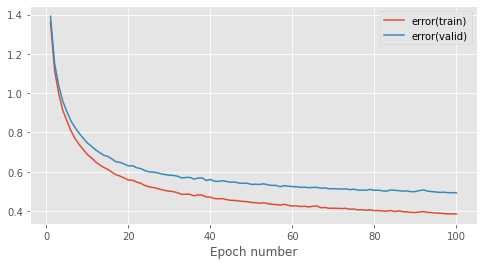

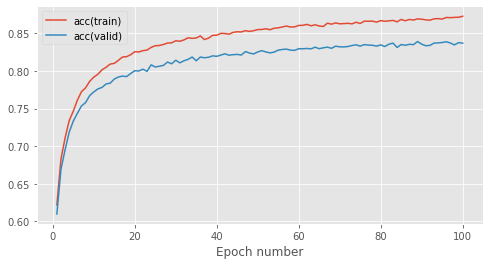

In [47]:
# l1 = 10**(-4)
# retrain model and report test performance
# Three hidden layers

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty, L2Penalty

#setup hyperparameters
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
l1_para = 10**(-4)

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty = L1Penalty(l1_para), biases_penalty = L1Penalty(l1_para)), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L1Penalty(l1_para), biases_penalty = L1Penalty(l1_para)), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L1Penalty(l1_para), biases_penalty = L1Penalty(l1_para)), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty = L1Penalty(l1_para), biases_penalty = L1Penalty(l1_para))
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=1e-4)

# Remember to use notebook=False when you write a script to be run in a terminal
stats_test, keys_test, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, test_data, num_epochs, stats_interval, notebook=True)

In [48]:
print('performance on test set is ', stats_test[1:,keys_test['acc(valid)']][-1])

performance on test set is  0.8368987341772149


#### l2

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.0s to complete
    error(train)=1.36e+00, acc(train)=6.23e-01, error(valid)=1.38e+00, acc(valid)=6.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.0s to complete
    error(train)=1.15e+00, acc(train)=6.75e-01, error(valid)=1.17e+00, acc(valid)=6.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.0s to complete
    error(train)=1.01e+00, acc(train)=7.11e-01, error(valid)=1.04e+00, acc(valid)=7.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.0s to complete
    error(train)=9.24e-01, acc(train)=7.34e-01, error(valid)=9.58e-01, acc(valid)=7.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.0s to complete
    error(train)=8.56e-01, acc(train)=7.50e-01, error(valid)=8.96e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.0s to complete
    error(train)=8.02e-01, acc(train)=7.63e-01, error(valid)=8.46e-01, acc(valid)=7.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.1s to complete
    error(train)=7.59e-01, acc(train)=7.74e-01, error(valid)=8.05e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.0s to complete
    error(train)=7.30e-01, acc(train)=7.81e-01, error(valid)=7.82e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.1s to complete
    error(train)=7.08e-01, acc(train)=7.85e-01, error(valid)=7.59e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.1s to complete
    error(train)=6.74e-01, acc(train)=7.97e-01, error(valid)=7.30e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.1s to complete
    error(train)=6.56e-01, acc(train)=8.02e-01, error(valid)=7.11e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.0s to complete
    error(train)=6.42e-01, acc(train)=8.05e-01, error(valid)=6.99e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.0s to complete
    error(train)=6.23e-01, acc(train)=8.10e-01, error(valid)=6.85e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.3s to complete
    error(train)=6.09e-01, acc(train)=8.14e-01, error(valid)=6.69e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 6.3s to complete
    error(train)=5.93e-01, acc(train)=8.18e-01, error(valid)=6.55e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 8.8s to complete
    error(train)=5.82e-01, acc(train)=8.21e-01, error(valid)=6.48e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 10.4s to complete
    error(train)=5.77e-01, acc(train)=8.20e-01, error(valid)=6.42e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 11.2s to complete
    error(train)=5.62e-01, acc(train)=8.25e-01, error(valid)=6.33e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 11.5s to complete
    error(train)=5.50e-01, acc(train)=8.30e-01, error(valid)=6.21e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 11.5s to complete
    error(train)=5.44e-01, acc(train)=8.30e-01, error(valid)=6.14e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 11.5s to complete
    error(train)=5.32e-01, acc(train)=8.34e-01, error(valid)=6.05e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 11.5s to complete
    error(train)=5.29e-01, acc(train)=8.33e-01, error(valid)=6.03e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 11.5s to complete
    error(train)=5.18e-01, acc(train)=8.38e-01, error(valid)=5.92e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 11.5s to complete
    error(train)=5.14e-01, acc(train)=8.39e-01, error(valid)=5.90e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 11.4s to complete
    error(train)=5.07e-01, acc(train)=8.40e-01, error(valid)=5.87e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 12.9s to complete
    error(train)=5.01e-01, acc(train)=8.41e-01, error(valid)=5.83e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 11.5s to complete
    error(train)=4.97e-01, acc(train)=8.41e-01, error(valid)=5.78e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 11.5s to complete
    error(train)=4.90e-01, acc(train)=8.43e-01, error(valid)=5.70e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 11.4s to complete
    error(train)=4.86e-01, acc(train)=8.45e-01, error(valid)=5.68e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 11.4s to complete
    error(train)=4.79e-01, acc(train)=8.48e-01, error(valid)=5.62e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 11.4s to complete
    error(train)=4.76e-01, acc(train)=8.48e-01, error(valid)=5.59e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 11.4s to complete
    error(train)=4.72e-01, acc(train)=8.48e-01, error(valid)=5.60e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 11.4s to complete
    error(train)=4.72e-01, acc(train)=8.48e-01, error(valid)=5.58e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 11.3s to complete
    error(train)=4.64e-01, acc(train)=8.50e-01, error(valid)=5.52e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 11.4s to complete
    error(train)=4.60e-01, acc(train)=8.52e-01, error(valid)=5.48e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 13.1s to complete
    error(train)=4.57e-01, acc(train)=8.53e-01, error(valid)=5.48e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 11.4s to complete
    error(train)=4.58e-01, acc(train)=8.52e-01, error(valid)=5.47e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 11.4s to complete
    error(train)=4.47e-01, acc(train)=8.56e-01, error(valid)=5.38e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 11.4s to complete
    error(train)=4.46e-01, acc(train)=8.57e-01, error(valid)=5.36e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 11.4s to complete
    error(train)=4.44e-01, acc(train)=8.55e-01, error(valid)=5.37e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 11.4s to complete
    error(train)=4.43e-01, acc(train)=8.56e-01, error(valid)=5.35e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 11.4s to complete
    error(train)=4.43e-01, acc(train)=8.56e-01, error(valid)=5.36e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 11.4s to complete
    error(train)=4.36e-01, acc(train)=8.58e-01, error(valid)=5.32e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 11.4s to complete
    error(train)=4.38e-01, acc(train)=8.58e-01, error(valid)=5.36e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 11.4s to complete
    error(train)=4.32e-01, acc(train)=8.60e-01, error(valid)=5.26e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 13.3s to complete
    error(train)=4.30e-01, acc(train)=8.59e-01, error(valid)=5.28e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 11.3s to complete
    error(train)=4.29e-01, acc(train)=8.59e-01, error(valid)=5.26e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 11.3s to complete
    error(train)=4.22e-01, acc(train)=8.62e-01, error(valid)=5.21e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 11.3s to complete
    error(train)=4.22e-01, acc(train)=8.63e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 11.4s to complete
    error(train)=4.22e-01, acc(train)=8.62e-01, error(valid)=5.22e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 11.6s to complete
    error(train)=4.15e-01, acc(train)=8.65e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 11.3s to complete
    error(train)=4.14e-01, acc(train)=8.64e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 11.2s to complete
    error(train)=4.15e-01, acc(train)=8.64e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 11.2s to complete
    error(train)=4.13e-01, acc(train)=8.65e-01, error(valid)=5.19e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 12.2s to complete
    error(train)=4.13e-01, acc(train)=8.63e-01, error(valid)=5.14e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 11.5s to complete
    error(train)=4.05e-01, acc(train)=8.67e-01, error(valid)=5.09e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 11.2s to complete
    error(train)=4.10e-01, acc(train)=8.64e-01, error(valid)=5.17e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 11.2s to complete
    error(train)=4.06e-01, acc(train)=8.67e-01, error(valid)=5.12e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 11.2s to complete
    error(train)=4.02e-01, acc(train)=8.68e-01, error(valid)=5.06e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 11.2s to complete
    error(train)=3.99e-01, acc(train)=8.70e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 11.2s to complete
    error(train)=4.00e-01, acc(train)=8.69e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 11.2s to complete
    error(train)=3.99e-01, acc(train)=8.68e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 11.1s to complete
    error(train)=3.96e-01, acc(train)=8.71e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 11.2s to complete
    error(train)=3.99e-01, acc(train)=8.67e-01, error(valid)=5.07e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 12.7s to complete
    error(train)=3.93e-01, acc(train)=8.70e-01, error(valid)=5.00e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 11.2s to complete
    error(train)=3.93e-01, acc(train)=8.72e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 11.1s to complete
    error(train)=3.93e-01, acc(train)=8.70e-01, error(valid)=4.99e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 11.2s to complete
    error(train)=3.90e-01, acc(train)=8.72e-01, error(valid)=4.98e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 11.1s to complete
    error(train)=3.85e-01, acc(train)=8.73e-01, error(valid)=4.98e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 11.4s to complete
    error(train)=3.89e-01, acc(train)=8.72e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 11.3s to complete
    error(train)=3.84e-01, acc(train)=8.73e-01, error(valid)=4.96e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 11.3s to complete
    error(train)=3.85e-01, acc(train)=8.73e-01, error(valid)=4.95e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 11.4s to complete
    error(train)=3.86e-01, acc(train)=8.71e-01, error(valid)=4.99e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 11.3s to complete
    error(train)=3.87e-01, acc(train)=8.73e-01, error(valid)=5.02e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 13.0s to complete
    error(train)=3.80e-01, acc(train)=8.75e-01, error(valid)=4.93e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 11.1s to complete
    error(train)=3.79e-01, acc(train)=8.75e-01, error(valid)=4.93e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 11.2s to complete
    error(train)=3.83e-01, acc(train)=8.72e-01, error(valid)=4.95e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 11.2s to complete
    error(train)=3.77e-01, acc(train)=8.76e-01, error(valid)=4.92e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 11.1s to complete
    error(train)=3.75e-01, acc(train)=8.77e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 11.1s to complete
    error(train)=3.79e-01, acc(train)=8.75e-01, error(valid)=4.96e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 11.1s to complete
    error(train)=3.73e-01, acc(train)=8.77e-01, error(valid)=4.87e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 11.1s to complete
    error(train)=3.75e-01, acc(train)=8.76e-01, error(valid)=4.94e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 11.3s to complete
    error(train)=3.75e-01, acc(train)=8.75e-01, error(valid)=4.88e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 11.3s to complete
    error(train)=3.75e-01, acc(train)=8.75e-01, error(valid)=4.93e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 13.4s to complete
    error(train)=3.71e-01, acc(train)=8.78e-01, error(valid)=4.88e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 11.3s to complete
    error(train)=3.71e-01, acc(train)=8.76e-01, error(valid)=4.90e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 11.2s to complete
    error(train)=3.70e-01, acc(train)=8.77e-01, error(valid)=4.88e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 11.3s to complete
    error(train)=3.72e-01, acc(train)=8.77e-01, error(valid)=4.92e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 12.2s to complete
    error(train)=3.68e-01, acc(train)=8.78e-01, error(valid)=4.86e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 13.0s to complete
    error(train)=3.69e-01, acc(train)=8.78e-01, error(valid)=4.88e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 12.2s to complete
    error(train)=3.66e-01, acc(train)=8.79e-01, error(valid)=4.89e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 11.3s to complete
    error(train)=3.69e-01, acc(train)=8.77e-01, error(valid)=4.89e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 11.2s to complete
    error(train)=3.65e-01, acc(train)=8.78e-01, error(valid)=4.85e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 11.8s to complete
    error(train)=3.62e-01, acc(train)=8.81e-01, error(valid)=4.84e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 13.1s to complete
    error(train)=3.67e-01, acc(train)=8.78e-01, error(valid)=4.90e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 12.2s to complete
    error(train)=3.64e-01, acc(train)=8.79e-01, error(valid)=4.87e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 12.1s to complete
    error(train)=3.63e-01, acc(train)=8.80e-01, error(valid)=4.85e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 12.1s to complete
    error(train)=3.61e-01, acc(train)=8.80e-01, error(valid)=4.83e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 12.2s to complete
    error(train)=3.63e-01, acc(train)=8.80e-01, error(valid)=4.83e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 12.0s to complete
    error(train)=3.55e-01, acc(train)=8.83e-01, error(valid)=4.80e-01, acc(valid)=8.44e-01


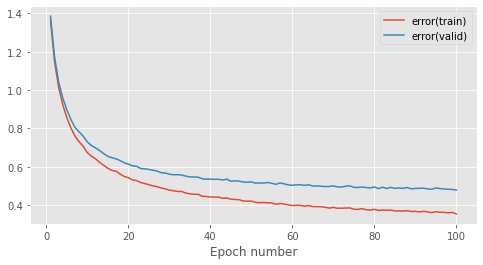

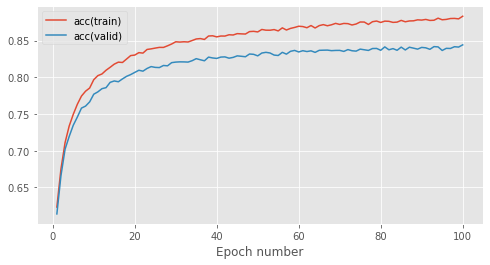

In [49]:
# l2 = 10**(-3)
# retrain models and report test performance
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty, L2Penalty

#setup hyperparameters
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128

l2_para = 10**(-3)
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_para),biases_penalty = L2Penalty(l2_para)), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_para),biases_penalty = L2Penalty(l2_para)), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_para),biases_penalty = L2Penalty(l2_para)), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_para),biases_penalty = L2Penalty(l2_para))
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=1e-4)

# Remember to use notebook=False when you write a script to be run in a terminal
stats_test, keys_test, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, test_data, num_epochs, stats_interval, notebook=True)




In [50]:
print('performance on test set is ',stats_test[1:,keys_test['acc(valid)']][-1])

performance on test set is  0.8442405063291141


#### Combined Model

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 4.1s to complete
    error(train)=1.46e+00, acc(train)=6.03e-01, error(valid)=1.48e+00, acc(valid)=5.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.4s to complete
    error(train)=1.19e+00, acc(train)=6.67e-01, error(valid)=1.22e+00, acc(valid)=6.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.8s to complete
    error(train)=1.04e+00, acc(train)=7.02e-01, error(valid)=1.07e+00, acc(valid)=6.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.5s to complete
    error(train)=9.35e-01, acc(train)=7.26e-01, error(valid)=9.73e-01, acc(valid)=7.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.5s to complete
    error(train)=8.60e-01, acc(train)=7.43e-01, error(valid)=9.00e-01, acc(valid)=7.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.5s to complete
    error(train)=8.01e-01, acc(train)=7.59e-01, error(valid)=8.47e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.5s to complete
    error(train)=7.51e-01, acc(train)=7.72e-01, error(valid)=7.99e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.5s to complete
    error(train)=7.18e-01, acc(train)=7.80e-01, error(valid)=7.71e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.6s to complete
    error(train)=6.78e-01, acc(train)=7.90e-01, error(valid)=7.33e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.6s to complete
    error(train)=6.53e-01, acc(train)=7.97e-01, error(valid)=7.08e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.6s to complete
    error(train)=6.29e-01, acc(train)=8.03e-01, error(valid)=6.89e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.5s to complete
    error(train)=6.08e-01, acc(train)=8.08e-01, error(valid)=6.70e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.6s to complete
    error(train)=5.89e-01, acc(train)=8.13e-01, error(valid)=6.53e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 5.8s to complete
    error(train)=5.75e-01, acc(train)=8.16e-01, error(valid)=6.42e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 6.3s to complete
    error(train)=5.59e-01, acc(train)=8.22e-01, error(valid)=6.28e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 7.8s to complete
    error(train)=5.46e-01, acc(train)=8.25e-01, error(valid)=6.18e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 9.0s to complete
    error(train)=5.34e-01, acc(train)=8.28e-01, error(valid)=6.06e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 9.4s to complete
    error(train)=5.23e-01, acc(train)=8.30e-01, error(valid)=5.99e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 9.6s to complete
    error(train)=5.13e-01, acc(train)=8.33e-01, error(valid)=5.91e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 9.6s to complete
    error(train)=5.01e-01, acc(train)=8.36e-01, error(valid)=5.83e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 9.5s to complete
    error(train)=4.99e-01, acc(train)=8.37e-01, error(valid)=5.82e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 9.6s to complete
    error(train)=4.84e-01, acc(train)=8.41e-01, error(valid)=5.70e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 9.5s to complete
    error(train)=4.76e-01, acc(train)=8.44e-01, error(valid)=5.65e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 9.8s to complete
    error(train)=4.71e-01, acc(train)=8.44e-01, error(valid)=5.61e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 9.7s to complete
    error(train)=4.63e-01, acc(train)=8.47e-01, error(valid)=5.54e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 10.9s to complete
    error(train)=4.58e-01, acc(train)=8.48e-01, error(valid)=5.51e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 9.5s to complete
    error(train)=4.51e-01, acc(train)=8.51e-01, error(valid)=5.46e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 9.5s to complete
    error(train)=4.43e-01, acc(train)=8.52e-01, error(valid)=5.41e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 9.5s to complete
    error(train)=4.39e-01, acc(train)=8.53e-01, error(valid)=5.37e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 9.9s to complete
    error(train)=4.33e-01, acc(train)=8.55e-01, error(valid)=5.32e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 10.3s to complete
    error(train)=4.29e-01, acc(train)=8.55e-01, error(valid)=5.32e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 10.1s to complete
    error(train)=4.24e-01, acc(train)=8.57e-01, error(valid)=5.28e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 10.1s to complete
    error(train)=4.18e-01, acc(train)=8.59e-01, error(valid)=5.23e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 10.1s to complete
    error(train)=4.12e-01, acc(train)=8.61e-01, error(valid)=5.18e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 10.4s to complete
    error(train)=4.09e-01, acc(train)=8.62e-01, error(valid)=5.16e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 10.2s to complete
    error(train)=4.05e-01, acc(train)=8.63e-01, error(valid)=5.15e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 11.3s to complete
    error(train)=4.03e-01, acc(train)=8.63e-01, error(valid)=5.15e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 10.2s to complete
    error(train)=3.97e-01, acc(train)=8.65e-01, error(valid)=5.10e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 10.3s to complete
    error(train)=3.92e-01, acc(train)=8.66e-01, error(valid)=5.04e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 10.1s to complete
    error(train)=3.90e-01, acc(train)=8.67e-01, error(valid)=5.05e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 9.2s to complete
    error(train)=3.87e-01, acc(train)=8.68e-01, error(valid)=5.02e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 9.3s to complete
    error(train)=3.83e-01, acc(train)=8.70e-01, error(valid)=5.01e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 9.3s to complete
    error(train)=3.79e-01, acc(train)=8.70e-01, error(valid)=5.01e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 9.6s to complete
    error(train)=3.76e-01, acc(train)=8.71e-01, error(valid)=4.96e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 10.3s to complete
    error(train)=3.73e-01, acc(train)=8.72e-01, error(valid)=4.95e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 10.2s to complete
    error(train)=3.70e-01, acc(train)=8.73e-01, error(valid)=4.92e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 10.1s to complete
    error(train)=3.65e-01, acc(train)=8.74e-01, error(valid)=4.90e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 11.2s to complete
    error(train)=3.65e-01, acc(train)=8.74e-01, error(valid)=4.90e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 10.1s to complete
    error(train)=3.59e-01, acc(train)=8.76e-01, error(valid)=4.86e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 10.2s to complete
    error(train)=3.56e-01, acc(train)=8.78e-01, error(valid)=4.85e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 10.2s to complete
    error(train)=3.54e-01, acc(train)=8.78e-01, error(valid)=4.83e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 10.2s to complete
    error(train)=3.54e-01, acc(train)=8.77e-01, error(valid)=4.84e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 10.1s to complete
    error(train)=3.51e-01, acc(train)=8.78e-01, error(valid)=4.84e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 10.0s to complete
    error(train)=3.49e-01, acc(train)=8.79e-01, error(valid)=4.82e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 9.7s to complete
    error(train)=3.47e-01, acc(train)=8.79e-01, error(valid)=4.82e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 9.9s to complete
    error(train)=3.43e-01, acc(train)=8.80e-01, error(valid)=4.79e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 9.9s to complete
    error(train)=3.40e-01, acc(train)=8.82e-01, error(valid)=4.74e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 10.2s to complete
    error(train)=3.40e-01, acc(train)=8.81e-01, error(valid)=4.78e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 11.2s to complete
    error(train)=3.37e-01, acc(train)=8.82e-01, error(valid)=4.76e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 10.0s to complete
    error(train)=3.32e-01, acc(train)=8.84e-01, error(valid)=4.74e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 10.0s to complete
    error(train)=3.31e-01, acc(train)=8.84e-01, error(valid)=4.73e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 10.0s to complete
    error(train)=3.29e-01, acc(train)=8.85e-01, error(valid)=4.72e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 10.1s to complete
    error(train)=3.27e-01, acc(train)=8.85e-01, error(valid)=4.72e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 10.1s to complete
    error(train)=3.26e-01, acc(train)=8.86e-01, error(valid)=4.70e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 10.1s to complete
    error(train)=3.24e-01, acc(train)=8.86e-01, error(valid)=4.71e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 10.0s to complete
    error(train)=3.23e-01, acc(train)=8.86e-01, error(valid)=4.71e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 9.1s to complete
    error(train)=3.20e-01, acc(train)=8.87e-01, error(valid)=4.70e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 9.1s to complete
    error(train)=3.18e-01, acc(train)=8.88e-01, error(valid)=4.69e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 9.1s to complete
    error(train)=3.16e-01, acc(train)=8.88e-01, error(valid)=4.65e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 10.4s to complete
    error(train)=3.13e-01, acc(train)=8.90e-01, error(valid)=4.64e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 9.4s to complete
    error(train)=3.11e-01, acc(train)=8.90e-01, error(valid)=4.64e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 9.2s to complete
    error(train)=3.11e-01, acc(train)=8.90e-01, error(valid)=4.67e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 9.1s to complete
    error(train)=3.09e-01, acc(train)=8.91e-01, error(valid)=4.64e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 9.1s to complete
    error(train)=3.08e-01, acc(train)=8.91e-01, error(valid)=4.65e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 9.2s to complete
    error(train)=3.08e-01, acc(train)=8.91e-01, error(valid)=4.65e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 9.3s to complete
    error(train)=3.04e-01, acc(train)=8.93e-01, error(valid)=4.62e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 9.3s to complete
    error(train)=3.04e-01, acc(train)=8.93e-01, error(valid)=4.64e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 9.3s to complete
    error(train)=3.02e-01, acc(train)=8.93e-01, error(valid)=4.64e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 9.3s to complete
    error(train)=3.00e-01, acc(train)=8.94e-01, error(valid)=4.60e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 9.3s to complete
    error(train)=3.01e-01, acc(train)=8.93e-01, error(valid)=4.65e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 9.3s to complete
    error(train)=3.03e-01, acc(train)=8.92e-01, error(valid)=4.70e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 10.0s to complete
    error(train)=2.95e-01, acc(train)=8.95e-01, error(valid)=4.59e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 9.3s to complete
    error(train)=2.94e-01, acc(train)=8.96e-01, error(valid)=4.58e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 9.3s to complete
    error(train)=2.93e-01, acc(train)=8.96e-01, error(valid)=4.59e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 9.5s to complete
    error(train)=2.92e-01, acc(train)=8.97e-01, error(valid)=4.61e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 9.1s to complete
    error(train)=2.90e-01, acc(train)=8.97e-01, error(valid)=4.58e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 9.1s to complete
    error(train)=2.87e-01, acc(train)=8.98e-01, error(valid)=4.56e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 9.1s to complete
    error(train)=2.87e-01, acc(train)=8.98e-01, error(valid)=4.58e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 9.1s to complete
    error(train)=2.87e-01, acc(train)=8.98e-01, error(valid)=4.57e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 9.3s to complete
    error(train)=2.85e-01, acc(train)=8.98e-01, error(valid)=4.59e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 9.1s to complete
    error(train)=2.83e-01, acc(train)=8.98e-01, error(valid)=4.55e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 9.1s to complete
    error(train)=2.84e-01, acc(train)=8.99e-01, error(valid)=4.60e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 10.5s to complete
    error(train)=2.82e-01, acc(train)=8.99e-01, error(valid)=4.57e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 9.4s to complete
    error(train)=2.81e-01, acc(train)=9.00e-01, error(valid)=4.55e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 9.4s to complete
    error(train)=2.77e-01, acc(train)=9.02e-01, error(valid)=4.53e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 9.3s to complete
    error(train)=2.76e-01, acc(train)=9.01e-01, error(valid)=4.53e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 9.2s to complete
    error(train)=2.78e-01, acc(train)=9.00e-01, error(valid)=4.58e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 9.1s to complete
    error(train)=2.75e-01, acc(train)=9.02e-01, error(valid)=4.54e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 9.1s to complete
    error(train)=2.73e-01, acc(train)=9.03e-01, error(valid)=4.54e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 9.1s to complete
    error(train)=2.74e-01, acc(train)=9.03e-01, error(valid)=4.53e-01, acc(valid)=8.47e-01


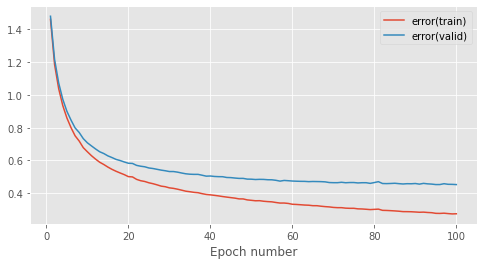

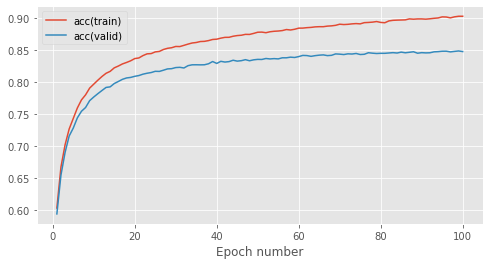

In [20]:
# Three hidden layers
# Dropout: incl_prob = 0.95
# L2 Penalty: l2_para = 10**(-4)

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty, L2Penalty

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
incl_prob = 0.95
l2_para = 10**(-4)

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_para),biases_penalty = L2Penalty(l2_para)), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_para),biases_penalty = L2Penalty(l2_para)), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_para),biases_penalty = L2Penalty(l2_para)), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_para),biases_penalty = L2Penalty(l2_para))
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=1e-4)

# Remember to use notebook=False when you write a script to be run in a terminal
stats_test, keys_test, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, test_data, num_epochs, stats_interval, notebook=True)

In [21]:
print('performance on test set is ',stats_test[1:,keys_test['acc(valid)']][-1])

performance on test set is  0.8474050632911393


## 2. Extra work

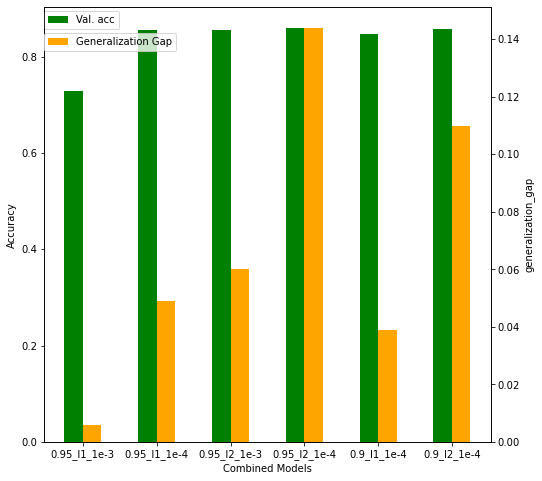

In [32]:
# Figure 4(c)
import numpy as np
import matplotlib.pyplot as plt

# Data contained in Table 3 Combined Experiments
xticks = ['0.95_l1_1e-3', '0.95_l1_1e-4', '0.95_l2_1e-3', '0.95_l2_1e-4', '0.9_l1_1e-4', '0.9_l2_1e-4']
valid_acc_ = [0.729,0.856,0.855,0.860,0.848,0.858]
generalization_gap = [0.006,0.049,0.060,0.144,0.039,0.110]

size = 6
x = np.arange(size)
total_width,n = 0.5,2
width = total_width/n
x = x - (total_width - width)/2

figure_4c = plt.figure(figsize = (8,8))
ax_fig_4c = figure_4c.add_subplot(111)


ax_fig_4c.bar(x, valid_acc_, width=width, color = 'green', label='Val. acc')
ax_fig_4c_twin = ax_fig_4c.twinx()
ax_fig_4c_twin.bar(x+width,generalization_gap,width=width,color = 'orange', label='Generalization Gap')

ax_fig_4c.set_xlabel('Combined Models')
ax_fig_4c.set_ylabel('Accuracy')
ax_fig_4c_twin.set_ylabel('generalization_gap')
ax_fig_4c.legend(loc = (0,0.95))
ax_fig_4c_twin.legend(loc = (0,0.9))

plt.xticks(np.arange(size),xticks)
plt.show()
figure_4c.savefig('Figure4_c.png')